<a href="https://colab.research.google.com/github/Nanasei878/Capital-bikeshare-data-analysis/blob/main/Bike_Sharing_hour_KOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import dateutil
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
sns.set()

In [ ]:
df = pd.read_csv('hour.csv')

In [ ]:
#checking the first few rows
df.head()

instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0  ...        0.0       3          13   16
1        2  2011-01-01       1   0  ...        0.0       8          32   40
2        3  2011-01-01       1   0  ...        0.0       5          27   32
3        4  2011-01-01       1   0  ...        0.0       3          10   13
4        5  2011-01-01       1   0  ...        0.0       0           1    1

[5 rows x 17 columns]

In [ ]:
df.shape

(17379, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#checking if the are missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.drop('instant', axis=1, inplace=True)

In [ ]:
df['dteday'] = df['dteday'].apply(dateutil.parser.parse)
#df['dteday'] = df['dteday'].astype(str)

In [ ]:
df['season'] = df['season'].astype(str)
df['mnth'] = df['mnth'].astype(str)
df['holiday'] = df['holiday'].astype(str)
df['workingday'] = df['workingday'].astype(str)
df['weathersit'] = df['weathersit'].astype(str)
df['weekday'] = df['weekday'].astype(str)
df['yr'] = df['yr'].astype(str)
df['hr'] = df['hr'].astype(str)

In [ ]:
df.describe().T

count        mean         std  ...       50%       75%       max
temp        17379.0    0.496987    0.192556  ...    0.5000    0.6600    1.0000
atemp       17379.0    0.475775    0.171850  ...    0.4848    0.6212    1.0000
hum         17379.0    0.627229    0.192930  ...    0.6300    0.7800    1.0000
windspeed   17379.0    0.190098    0.122340  ...    0.1940    0.2537    0.8507
casual      17379.0   35.676218   49.305030  ...   17.0000   48.0000  367.0000
registered  17379.0  153.786869  151.357286  ...  115.0000  220.0000  886.0000
cnt         17379.0  189.463088  181.387599  ...  142.0000  281.0000  977.0000

[7 rows x 8 columns]

In [ ]:
df.describe(include=object).T

count unique top   freq
season      17379      4   3   4496
yr          17379      2   1   8734
mnth        17379     12   5   1488
hr          17379     24  16    730
holiday     17379      2   0  16879
weekday     17379      7   6   2512
workingday  17379      2   1  11865
weathersit  17379      4   1  11413

In [ ]:
df.cnt.sum()

3292679

In [ ]:
df1 = df[df['yr']=='1']
df1['cnt'].mean()
#df1['cnt'].sum()

234.6663613464621

In [ ]:
df0 = df[df['yr']=='0']
df0['cnt'].mean()
#df0['cnt'].sum()

143.79444765760556

In [ ]:
def rateOfChange(y,x):
  roc = ((y/x)-1)*100
  return round(roc,1)

In [ ]:
rateOfChange(df1['cnt'].sum(),df0['cnt'].sum())

64.9

In [ ]:
numz = df.select_dtypes(np.number).columns
numz

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

# **HeatMaps**

In [ ]:
'''df['Year_Month'] = df['dteday'].map(lambda x: x.strftime('%Y-%m'))
df['Day']=df['dteday'].dt.day'''

In [ ]:
df_d = df.groupby(['dteday'],as_index=False)['cnt'].sum()
df_d.head()

dteday   cnt
0 2011-01-01   985
1 2011-01-02   801
2 2011-01-03  1349
3 2011-01-04  1562
4 2011-01-05  1600

In [ ]:
df_d['Year_Month'] = df_d['dteday'].map(lambda x: x.strftime('%Y-%m'))
df_d['Day']=df_d['dteday'].dt.day

In [ ]:
df_dpivot = df_d.pivot('Year_Month','Day','cnt')
df_dpivot.fillna(0,inplace=True)

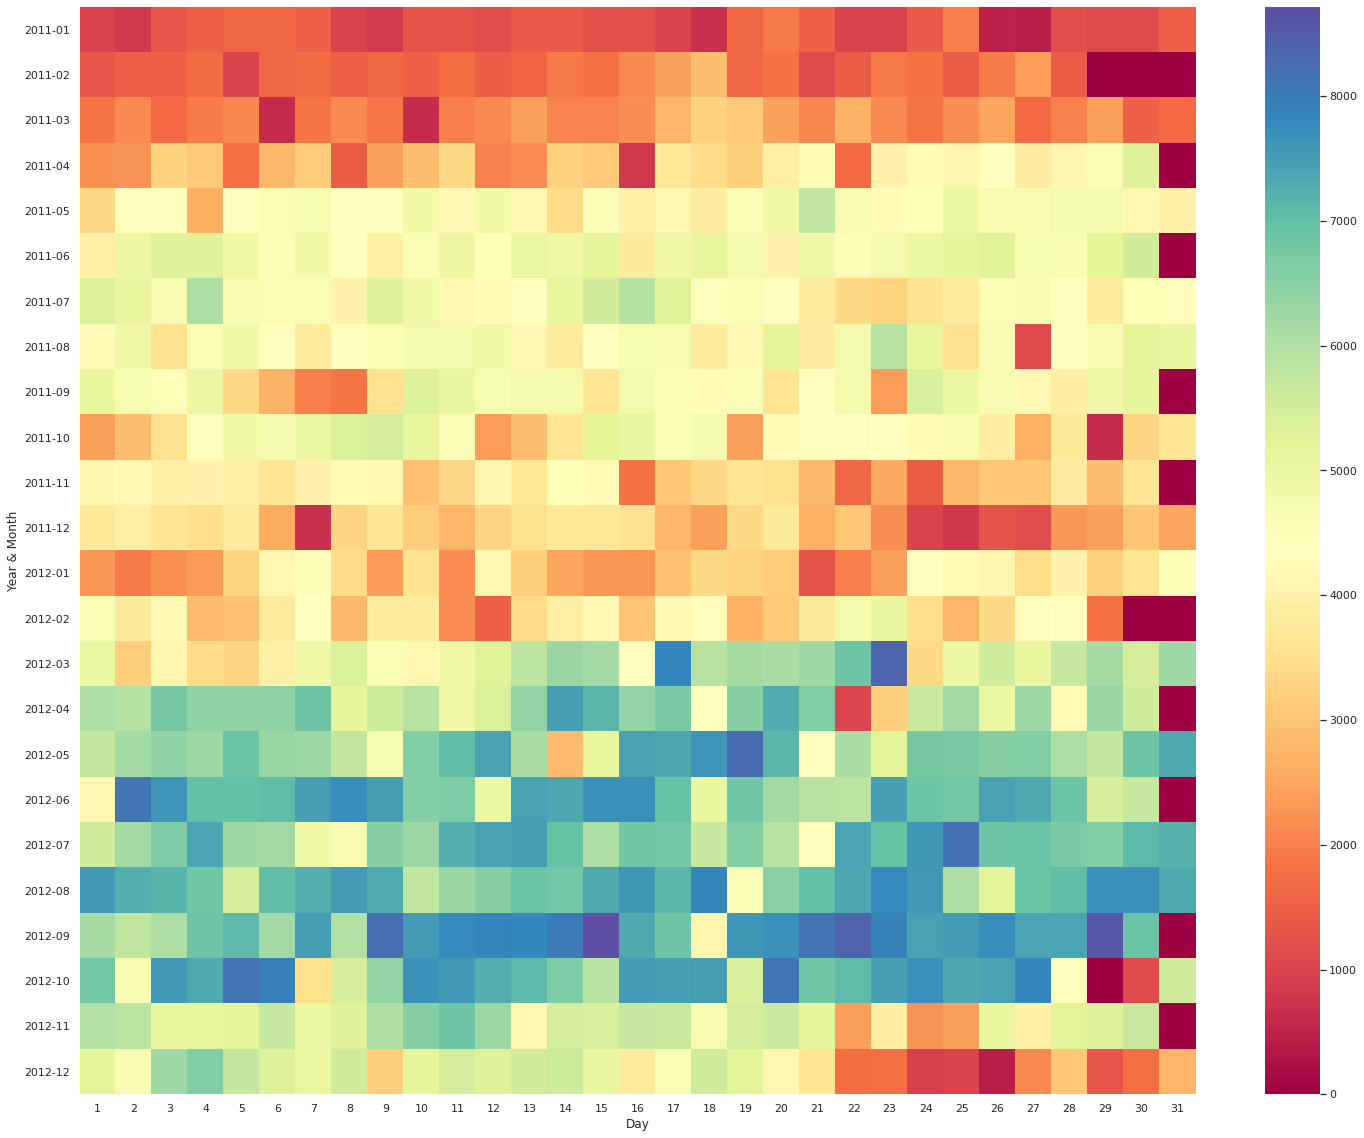

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(df_dpivot, cmap='Spectral')
plt.ylabel('Year & Month')
sns.set(font_scale=2)
plt.savefig('daycount')

In [ ]:
#df.drop(['Year_Month','Day'], axis=1,inplace=True)

In [ ]:
df['Date'] = df['dteday'].astype(str)
df['Hour'] = df['hr'].astype(int)

In [ ]:
df_pivot = df.pivot_table(index='Date',columns='Hour',values='cnt', aggfunc='sum', fill_value=0)
#df_pivot.fillna(0,inplace=True)


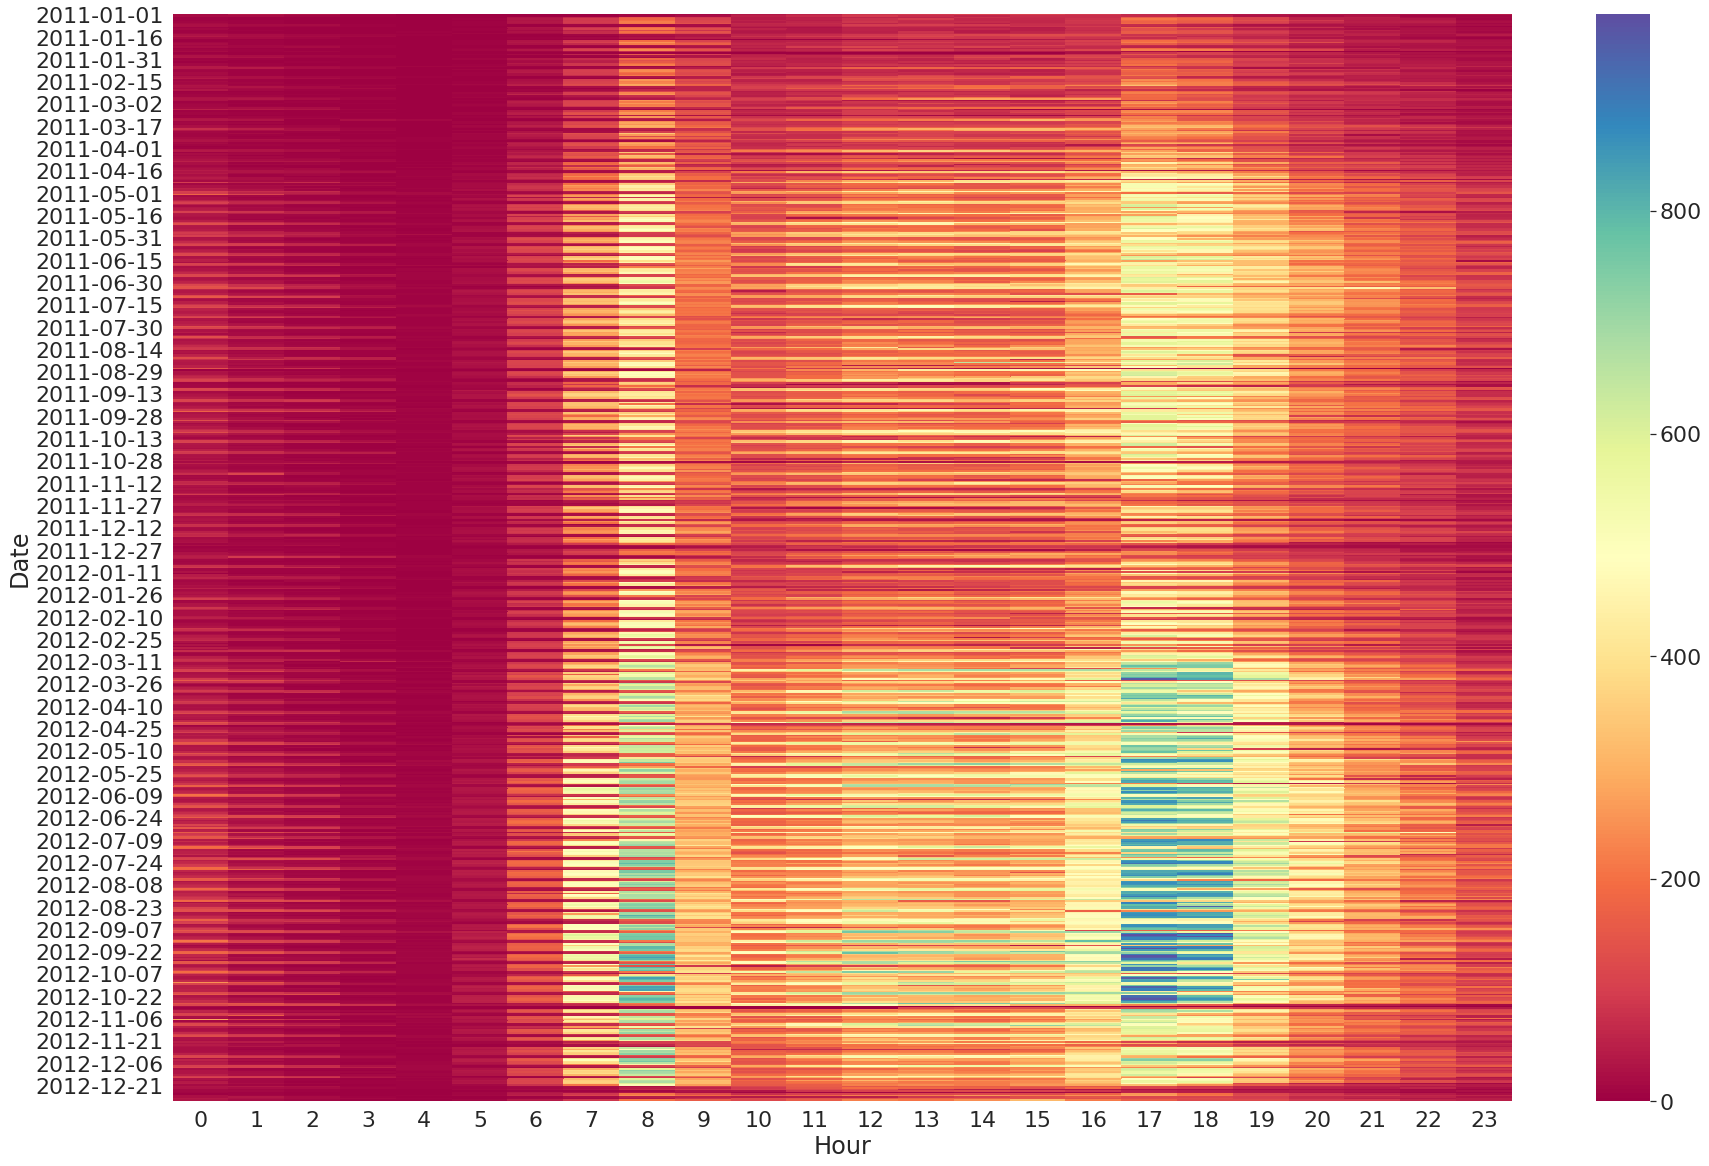

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df_pivot,cmap='Spectral')
sns.set(font_scale=2)

In [ ]:
'''df_h = df.groupby(['dteday'],as_index=False)['cnt'].sum()
df_h.head()'''
df_hpivot= df.pivot('Date','Hour','cnt')
df_hpivot.fillna(0,inplace=True)

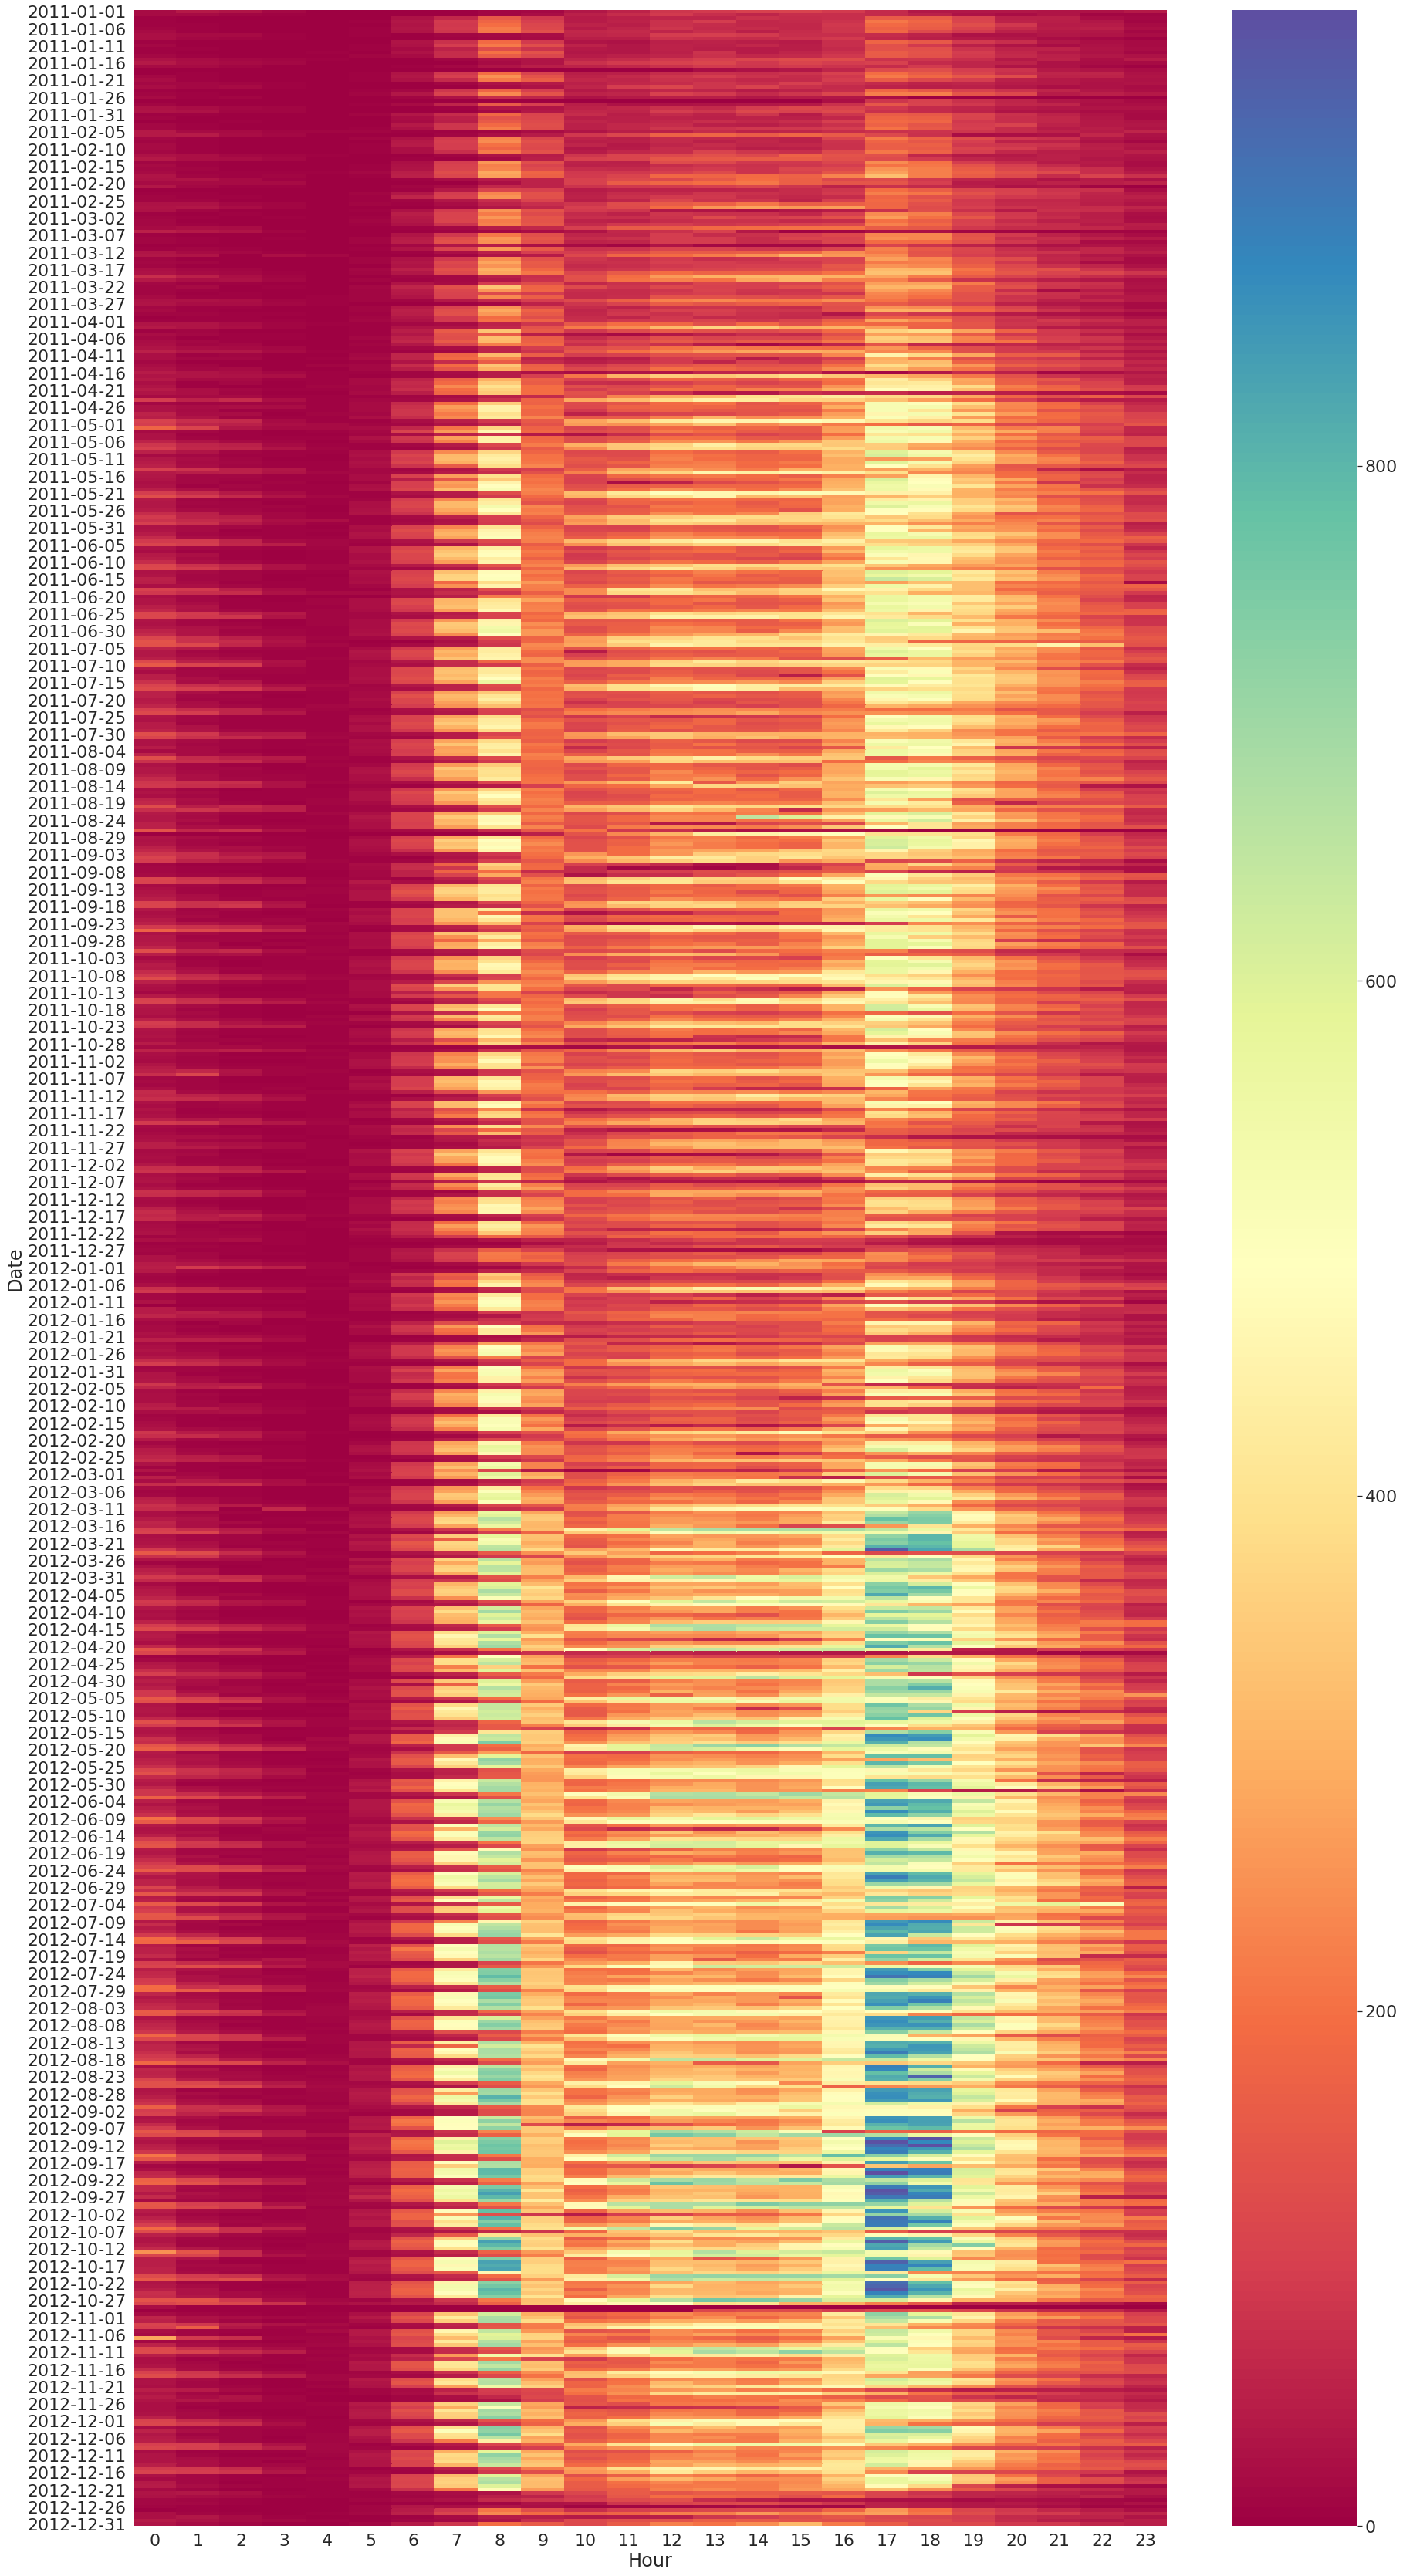

In [ ]:
plt.figure(figsize=(30,60))
sns.heatmap(df_hpivot,cmap='Spectral')
sns.set(font_scale=2)

In [ ]:
df.drop(['Date','Hour'], axis=1,inplace=True)

# **EDA**

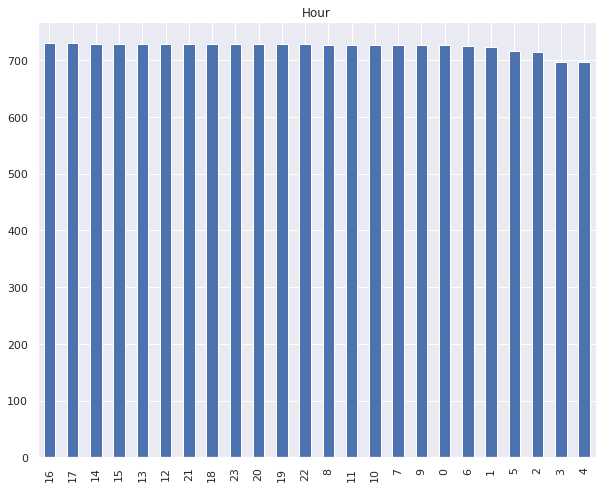

In [ ]:
'''plt.figure(figsize=(30,20))
sns.heatmap(df_pivot)
sns.set(font_scale=2)'''
df['hr'].value_counts().plot.bar(figsize=(10,8), title='Hour')
plt.savefig('tothour.jpg')

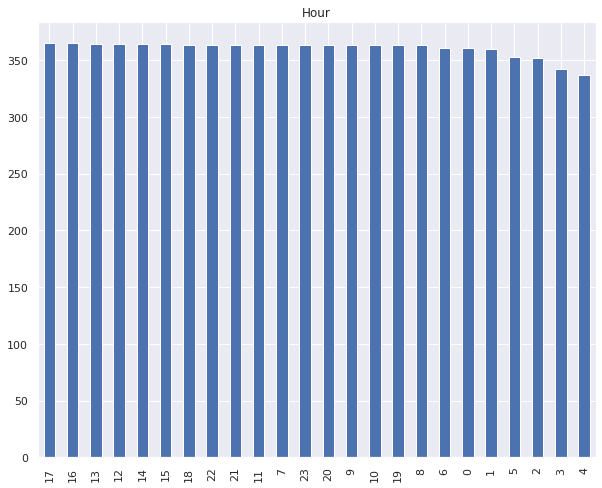

In [ ]:
df0['hr'].value_counts().plot.bar(figsize=(10,8), title='Hour')
plt.savefig('tothour0.jpg')

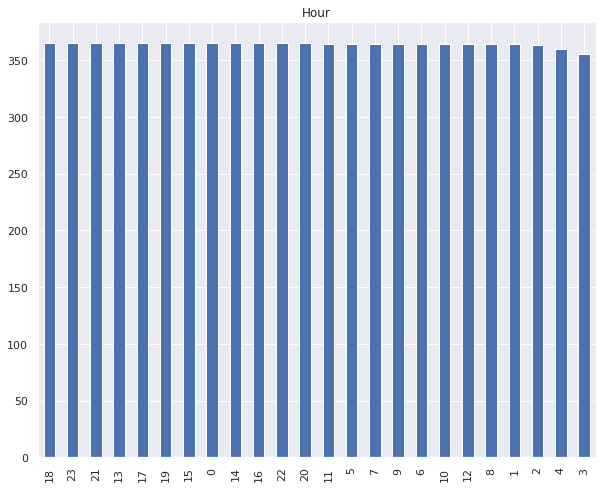

In [ ]:
df1['hr'].value_counts().plot.bar(figsize=(10,8), title='Hour')
plt.savefig('tothour1.jpg')

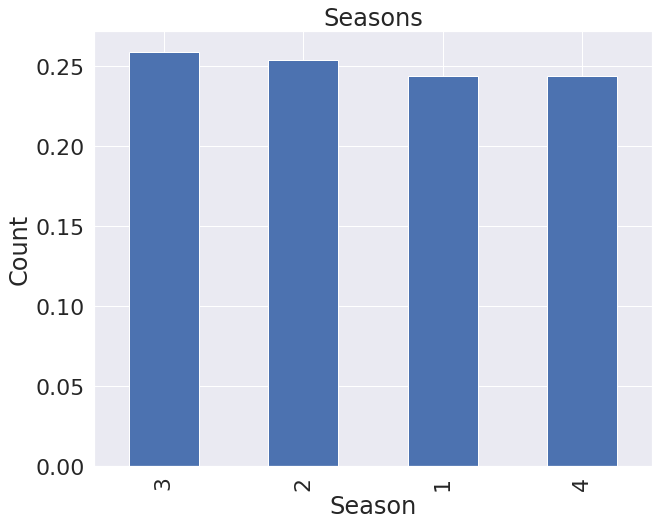

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64




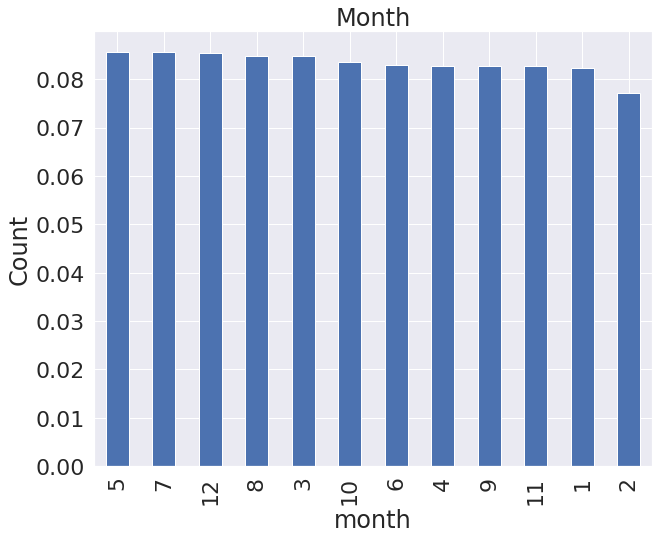

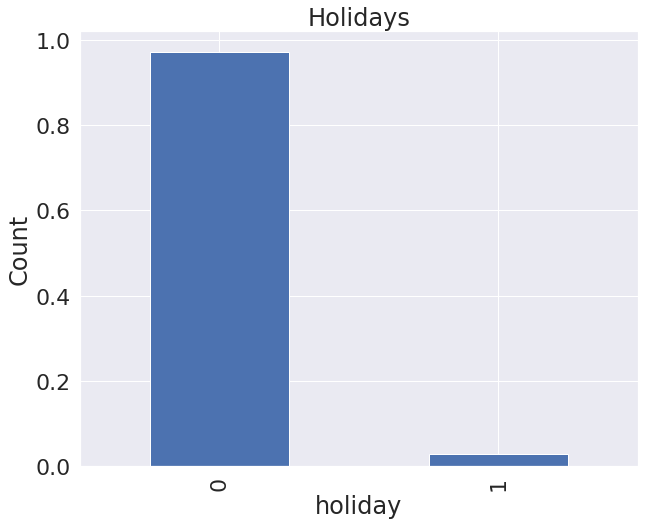

0    16879
1      500
Name: holiday, dtype: int64
0    0.97123
1    0.02877
Name: holiday, dtype: float64




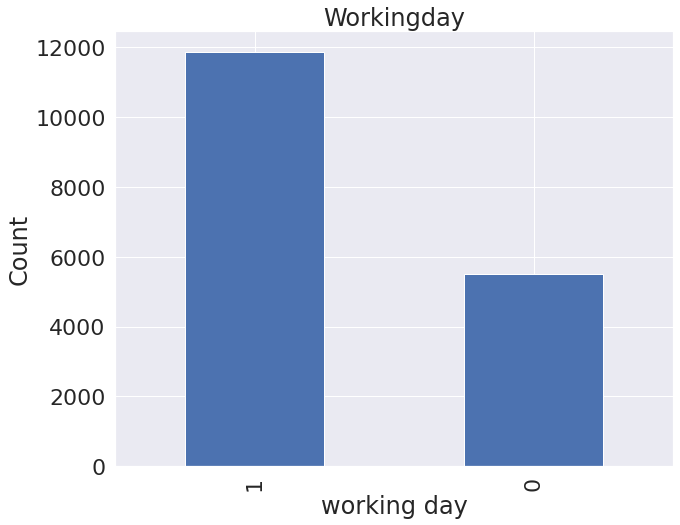

1    11865
0     5514
Name: workingday, dtype: int64




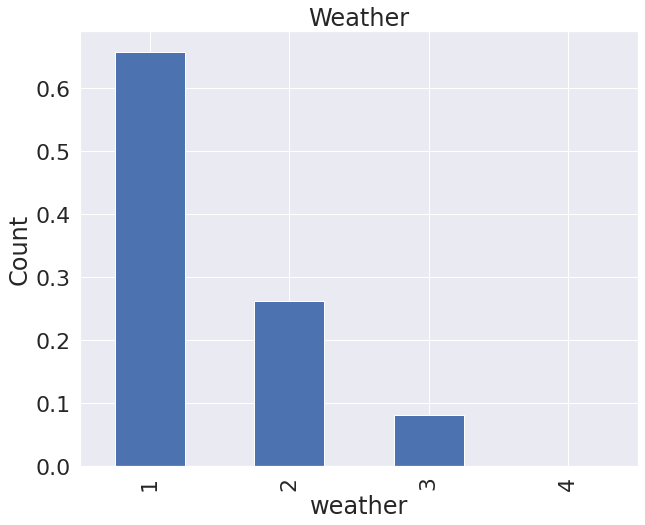

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64




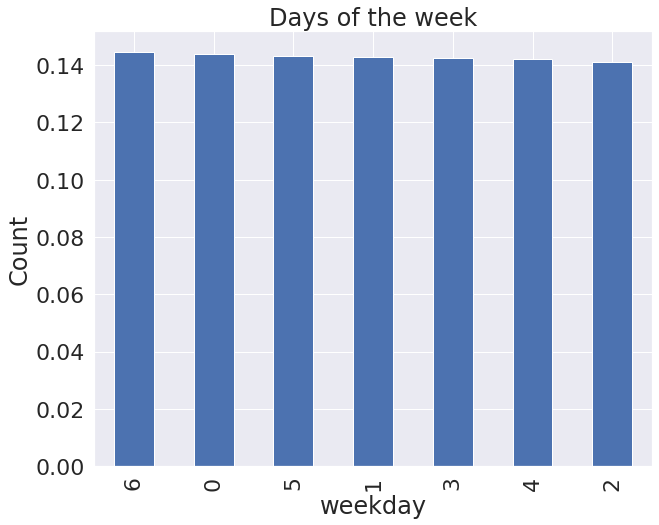

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64




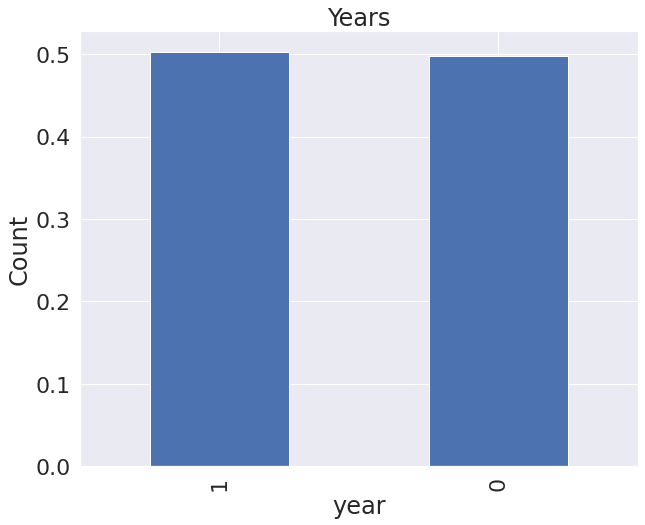

1    8734
0    8645
Name: yr, dtype: int64




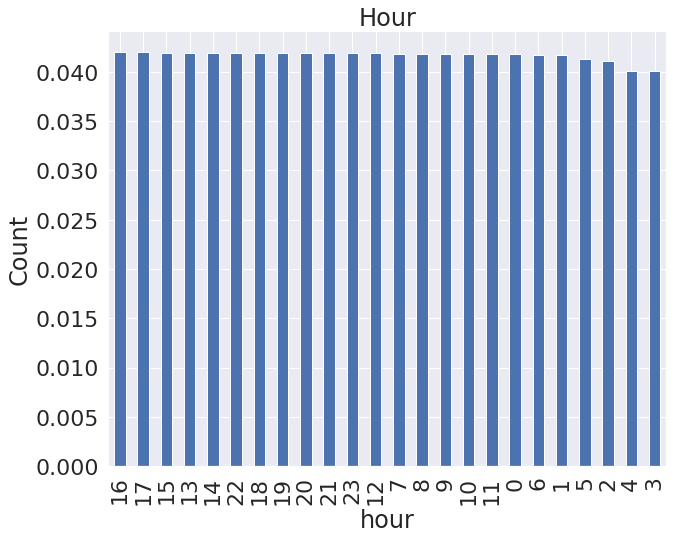

16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64




In [ ]:
cat = ['season','mnth','holiday','workingday','weathersit','weekday','yr','hr']

for x in cat:
  if x == 'season':
    df['season'].value_counts(normalize=True).plot.bar(figsize=(10,8), title='Seasons')
    file_name = '{}.jpg'
    plt.xlabel('Season')
    plt.ylabel('Count')
    plt.savefig(file_name.format(x))
    plt.show()
    print(df['season'].value_counts())
    #print(df['season'].value_counts(normalize=True))
    print('\n')
  elif x == 'yr':
    df['yr'].value_counts(normalize=True).plot.bar(figsize=(10,8), title='Years')
    file_name = '{}.jpg'
    plt.xlabel('year')
    plt.ylabel('Count')
    plt.savefig(file_name.format(x))
    plt.show()
    print(df['yr'].value_counts())
    #print(df['yr'].value_counts(normalize=True))
    print('\n')
  elif x == 'mnth':
    df['mnth'].value_counts(normalize=True).plot.bar(figsize=(10,8), title='Month')
    file_name = '{}.jpg'
    plt.xlabel('month')
    plt.ylabel('Count')
    plt.savefig(file_name.format(x))
    plt.show()
    #print(df['mnth'].value_counts())
    print('\n')
  elif x == 'holiday':
    df['holiday'].value_counts(normalize=True).plot.bar(figsize=(10,8), title='Holidays')
    file_name = '{}.jpg'
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.savefig(file_name.format(x))
    plt.show()
    print(df['holiday'].value_counts())
    print(df['holiday'].value_counts(normalize=True))
    print('\n')
  elif x == 'workingday':
    df['workingday'].value_counts().plot.bar(figsize=(10,8), title='Workingday')
    file_name = '{}.jpg'
    plt.xlabel('working day')
    plt.ylabel('Count')
    plt.savefig(file_name.format(x))
    plt.show()
    print(df['workingday'].value_counts())
    print('\n')
  elif x == 'weathersit':
    df['weathersit'].value_counts(normalize=True).plot.bar(figsize=(10,8), title='Weather')
    file_name = '{}.jpg'
    plt.xlabel('weather')
    plt.ylabel('Count')
    plt.savefig(file_name.format(x))
    plt.show()
    print(df['weathersit'].value_counts())
    #print(df['weathersit'].value_counts(normalize=True))
    print('\n')
  elif x == 'weekday':
    df['weekday'].value_counts(normalize=True).plot.bar(figsize=(10,8), title='Days of the week')
    file_name = '{}.jpg'
    plt.xlabel('weekday')
    plt.ylabel('Count')
    plt.savefig(file_name.format(x))
    plt.show()
    print(df['weekday'].value_counts())
    #print(df['weekday'].value_counts(normalize=True))
    print('\n')
  elif x == 'hr':
    df['hr'].value_counts(normalize=True).plot.bar(figsize=(10,8), title='Hour')
    file_name = '{}.jpg'
    plt.xlabel('hour')
    plt.ylabel('Count')
    plt.savefig(file_name.format(x))
    plt.show()
    print(df['hr'].value_counts())
    print('\n')

In [ ]:
'''for x in cat:
  titles= x.capitalize()+' observed'
  file_name = '{}.jpg'
  df[x].value_counts().plot.bar(figsize=(10,8), title=titles)
  plt.xlabel(x)
  plt.ylabel('Count')
  plt.savefig(file_name.format(x))
  plt.show()
  print(df[x].value_counts())
  print('\n')'''

"for x in cat:\n  titles= x.capitalize()+' observed'\n  file_name = '{}.jpg'\n  df[x].value_counts().plot.bar(figsize=(10,8), title=titles)\n  plt.xlabel(x)\n  plt.ylabel('Count')\n  plt.savefig(file_name.format(x))\n  plt.show()\n  print(df[x].value_counts())\n  print('\n')"

# **Univariate data analysis: Categorical Data**

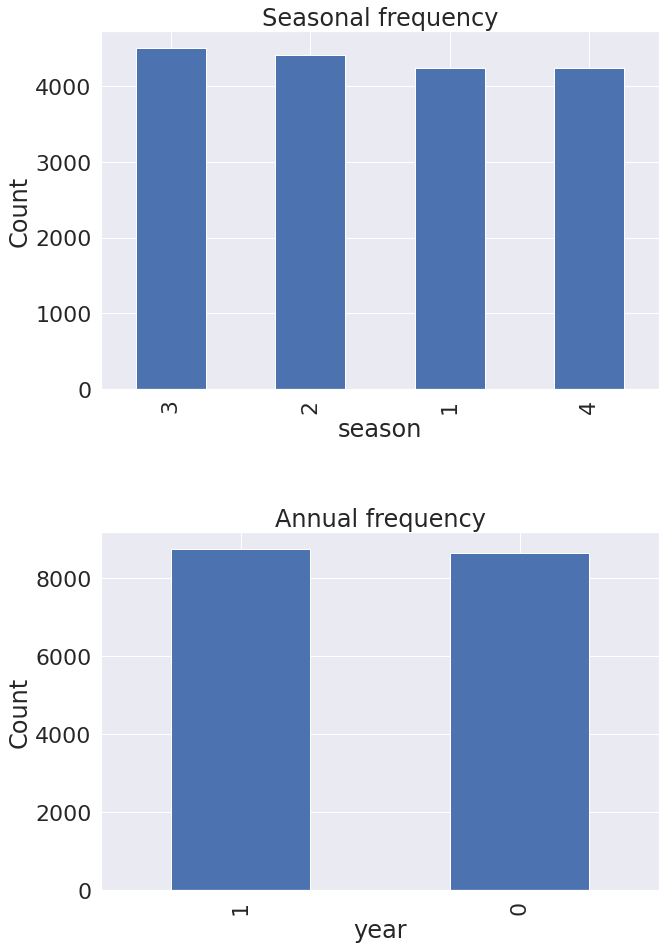

In [ ]:
plt.figure(1)
plt.subplots_adjust(top = 1.5, bottom=0.009, hspace=0.4, wspace=0.2)
plt.subplot(211)
df['season'].value_counts().plot.bar(figsize=(10,8), title='Seasonal frequency')
plt.xlabel('season')
plt.ylabel('Count')
plt.subplot(212)
df['yr'].value_counts().plot.bar(figsize=(10,8), title='Annual frequency')
plt.xlabel('year')
plt.ylabel('Count')
plt.savefig('season&yrs',bbox_inches='tight')
plt.show()


**Seasons:**
*   Data were taken across 4 seasons: 1:spring, 2:summer, 3:fall, 4:winter
*   Records taken in all season exceeded 175 with fall recording the most.

**Years:**
*  Data were recorded across 2 years: 0: 2011, 1:2012
*  In 2011 360 records were taken whereas 2012 has 361 






In [ ]:
df0['yr'].value_counts() 8734

0    8645
Name: yr, dtype: int64

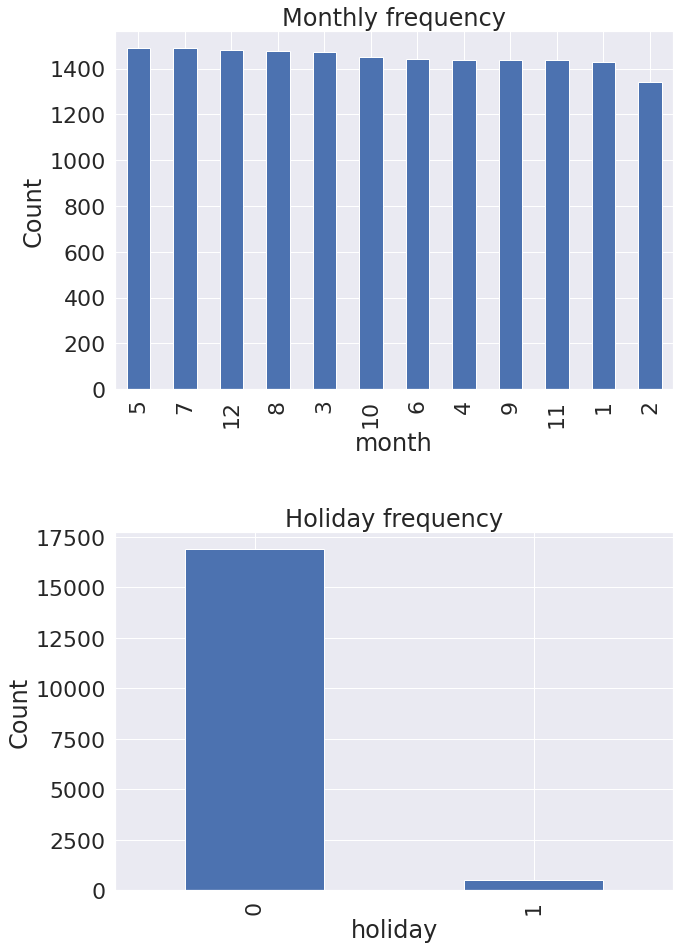

In [ ]:
plt.figure(1)
plt.subplots_adjust(top = 1.5, bottom=0.009, hspace=0.4, wspace=0.2)
plt.subplot(211)
df['mnth'].value_counts().plot.bar(figsize=(10,8), title='Monthly frequency')
plt.xlabel('month')
plt.ylabel('Count')
plt.subplot(212)
df['holiday'].value_counts().plot.bar(figsize=(10,8), title='Holiday frequency')
plt.xlabel('holiday')
plt.ylabel('Count')
plt.savefig('month&holidays',bbox_inches='tight')
plt.show()

**Month:**
*   Names of the months are labeled 1 to 12 repesenting January to December respectively
*   Even though the least number of records were taken in February, there is no significant difference in the number of records taken per month.

**Holidays:**
* Holidays are labeled 0 and non holidays.
* As expected bike rentals, non holidays(over 700) heavily outnumbers holidays.





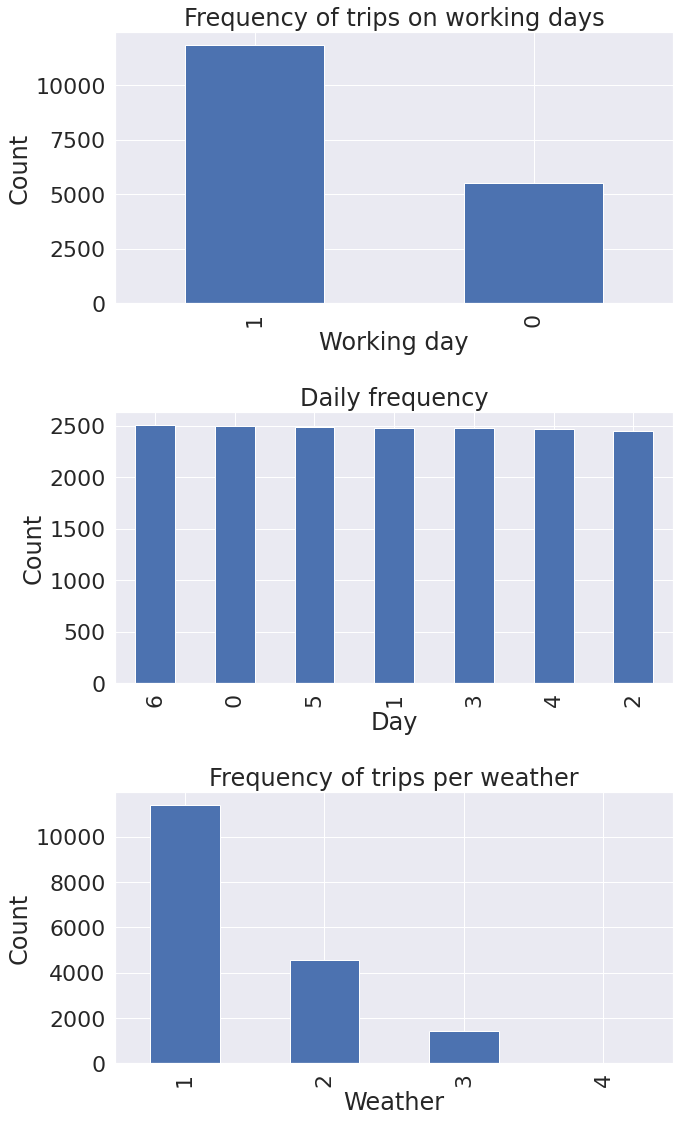

In [ ]:
plt.figure(1)
plt.subplots_adjust(top = 1.8, bottom=0.009, hspace=0.4, wspace=0.2)
plt.subplot(311)
df['workingday'].value_counts().plot.bar(figsize=(10,8), title='Frequency of trips on working days')
plt.xlabel('Working day')
plt.ylabel('Count')
plt.subplot(312)
df['weekday'].value_counts().plot.bar(figsize=(10,8), title='Daily frequency')
plt.xlabel('Day')
plt.ylabel('Count')
plt.subplot(313)
df['weathersit'].value_counts().plot.bar(figsize=(10,8), title='Frequency of trips per weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.savefig('wkdy&week&weather',bbox_inches='tight')
plt.show()

**Working Day:**
*   If day is neither weekend nor holiday is 1, otherwise is 0
*   With a ratio 500 records to less than 230, data taken on working days out numbers those taken on weekends. As expected since weekends are made up of 2 of the 7 days of the week.


**Days of the week:**
* Days of the week were labeled from 0 to 6, representing Sunday to Saturday respectively.
* There is no significant difference in the number of records taken across all the days.


**Weather:**
* Weather labels are as follows: 1:Clear-sunny days; 2: Misty&/ cloudy days; 3: Light snowy, light rainy days  , 4: Heavy rains with Ice Pallets, Thunderstorm , Mist, Snow &/ Fogy days.
*   The highest patronage of bike rentals are on clear and sunny days.
*  The least rentals were recorded in Light snow or light rainy days
*   No data was recorded on heavy rainy/snowy days as such conditions are extremely inconvenient for biking.









In [ ]:
print(df['weathersit'].value_counts())
print(df['weathersit'].value_counts(normalize=True))

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64
1    0.656712
2    0.261465
3    0.081650
4    0.000173
Name: weathersit, dtype: float64


In [ ]:
df['hr'] = df['hr'].astype(int)
df0['hr'] = df0['hr'].astype(int)
df1['hr'] = df1['hr'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


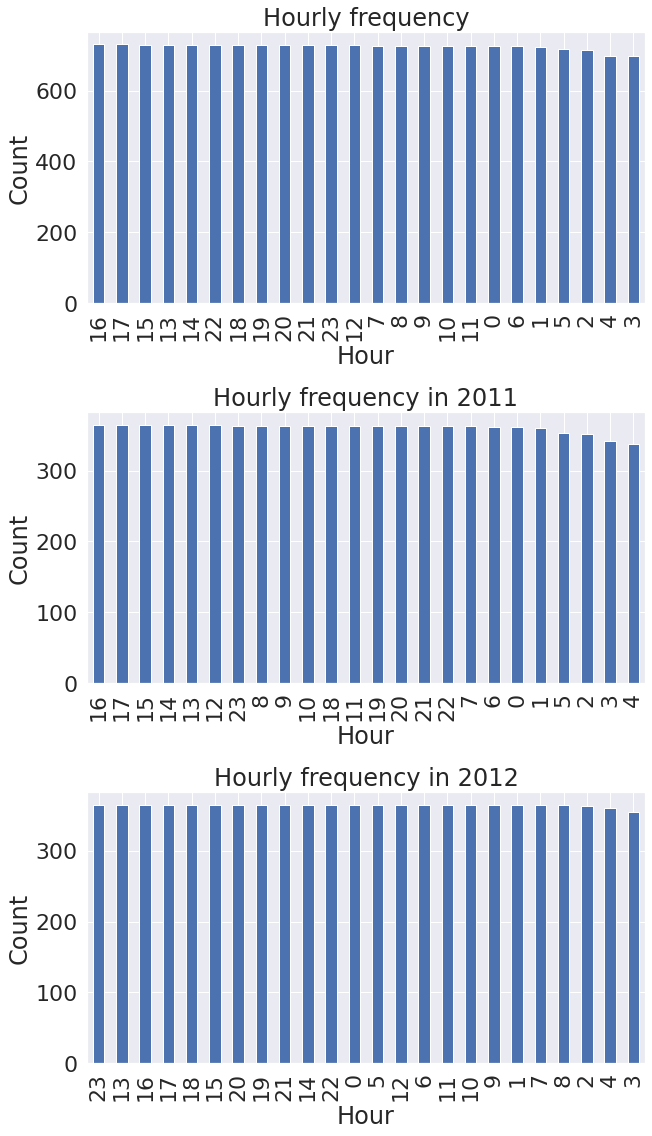

In [ ]:
plt.figure(1)
plt.subplots_adjust(top = 1.8, bottom=0.009, hspace=0.4, wspace=0.2)
plt.subplot(311)
df['hr'].value_counts().plot.bar(figsize=(10,8), title='Hourly frequency')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.subplot(312)
df0['hr'].value_counts().plot.bar(figsize=(10,8), title='Hourly frequency in 2011')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.subplot(313)
df1['hr'].value_counts().plot.bar(figsize=(10,8), title='Hourly frequency in 2012')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.savefig('hr',bbox_inches='tight')
plt.show()

**Hours:**
*   There is not much difference in the number of records taken on hourly basis as over 350 records were taken each hour over the 2year period.
*   In the combined data, the least number of records were taken at 3am in the morning followed by that taken at 4am. However, further analysis showed that 4am had the least taken records in 2011 and the status quo changed in 2012.



# **Univariate Data Analysis: Continuous Data Analysis**

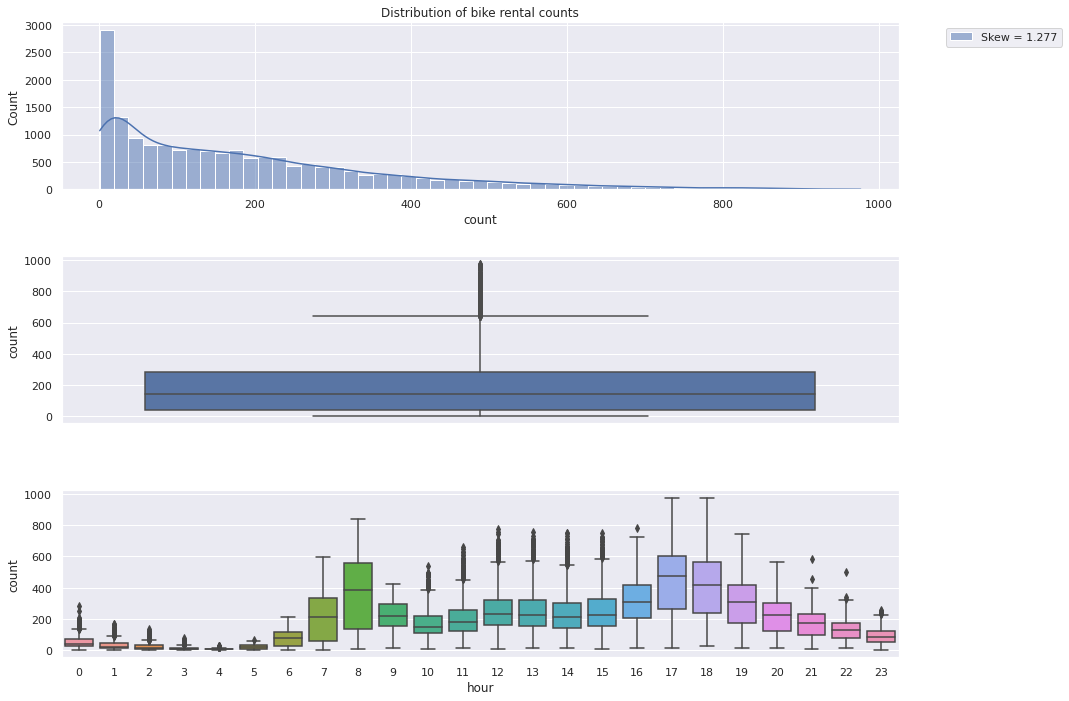

In [ ]:
plt.figure(figsize=(15,9))
skew = df['cnt'].skew()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
plt.subplot(311)
plt.title('Distribution of bike rental counts')
sns.histplot(df['cnt'], kde= True, label='Skew = %.3f' %(skew))
plt.xlabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(312)
sns.boxplot(y=df['cnt'])
plt.ylabel('count')
plt.subplot(313)
sns.boxplot(x=df['hr'],y=df['cnt'])
plt.ylabel('count')
plt.xlabel('hour')
plt.savefig('cnt',bbox_inches='tight')
#plt.show()

From the histogram, the highest number of bikes rented out lies between 0 and 400. Overall, there are a lot of outliers. When the hours at which the bikes were given out is considered the issue of extreme values is realised throughout except during the rush hours.

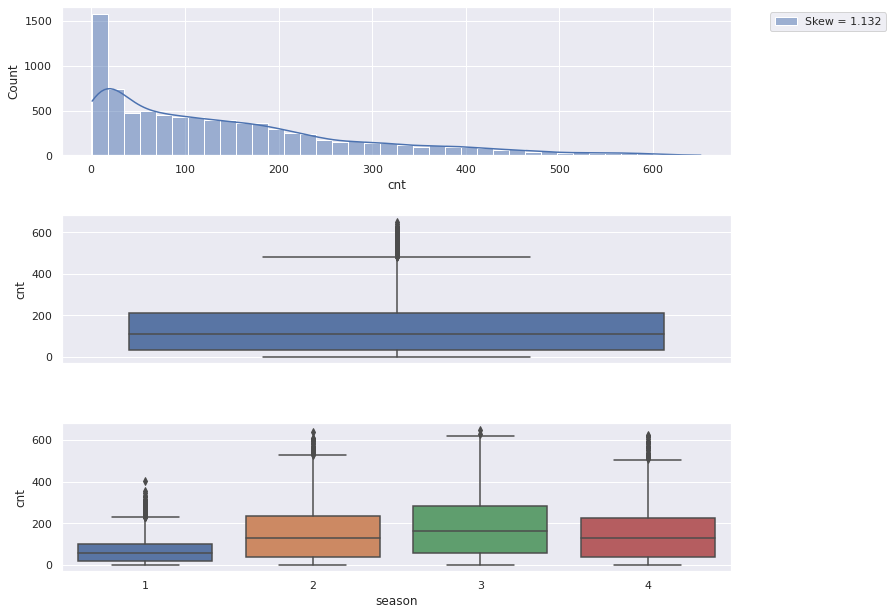

In [ ]:
plt.figure(figsize=(12,8))
skew = df0['cnt'].skew()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
plt.subplot(311)
sns.histplot(df0['cnt'], kde= True, label='Skew = %.3f' %(skew))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(312)
sns.boxplot(y=df0['cnt'])
plt.subplot(313)
sns.boxplot(x=df0['season'],y=df0['cnt'])
#plt.show()

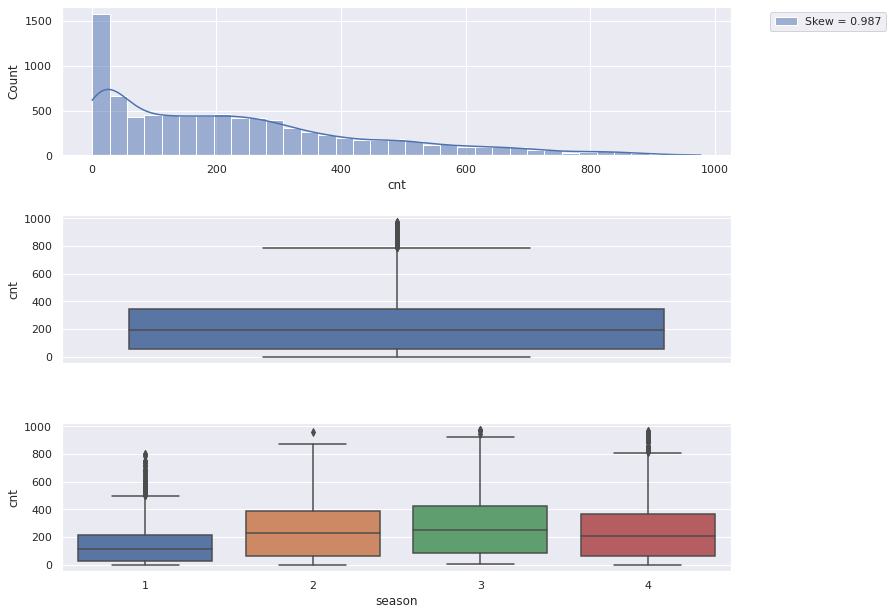

In [ ]:
plt.figure(figsize=(12,8))
skew = df1['cnt'].skew()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
plt.subplot(311)
sns.histplot(df1['cnt'], kde= True, label='Skew = %.3f' %(skew))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(312)
sns.boxplot(y=df1['cnt'])
plt.subplot(313)
sns.boxplot(x=df1['season'],y=df1['cnt'])
#plt.show()

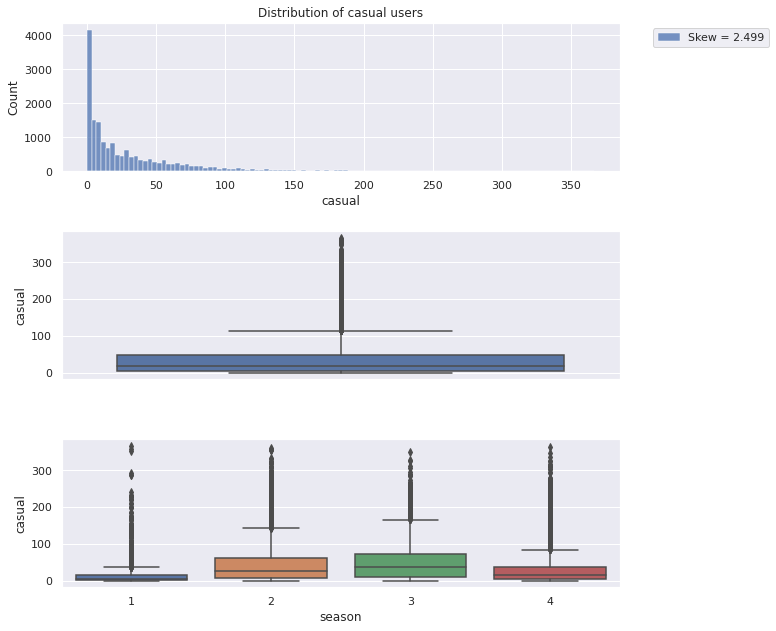

In [ ]:
plt.figure(figsize=(10,8))
skew = df['casual'].skew()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
plt.subplot(311)
plt.title('Distribution of casual users')
sns.histplot(df['casual'],label='Skew = %.3f' %(skew))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(312)
sns.boxplot(y=df['casual'])
plt.subplot(313)
sns.boxplot(x=df['season'], y=df['casual'])
plt.savefig('casual',bbox_inches='tight')

From the histogram, it can be inferred that distribution is shifted towards the right(right/positive skewed). Majority of casual rides recorded per hour are arouund 50 and below. 
The boxplot shows a lot of outliers. This can be attributed to disparities casual users at certain times or seasons or weather conditions. So aggregation based on seasons was carried out. It can be seen that there are yet a lot of outliers. However, there is a varying distributions across the seasons. Fall has the most spread out distribution while spring has the least.

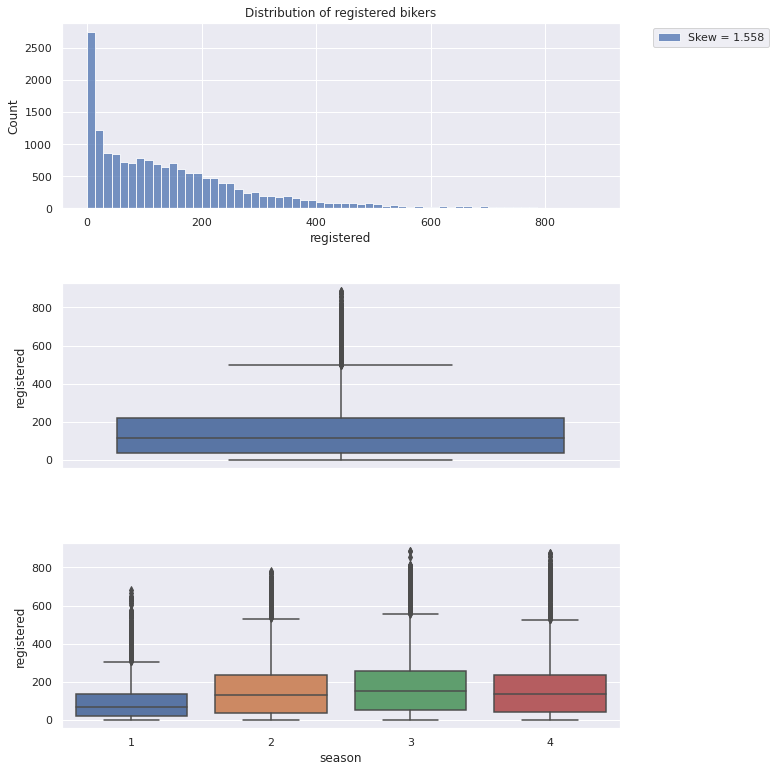

In [ ]:
plt.figure(figsize=(10,10))
skew = df['registered'].skew()
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.4, wspace=0.2)
plt.subplot(311)
plt.title('Distribution of registered bikers')
sns.histplot(df['registered'],label='Skew = %.3f' %(skew))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(312)
sns.boxplot(y=df['registered'])
plt.subplot(313)
sns.boxplot(x=df['season'],y=df['registered'])
plt.savefig('registered',bbox_inches='tight',pad_inches=0.1)

Most of the trips by registered bikers per hour are below 260. No outliers are found in the distribution. like the casual bikers, there is a large number of outliers. Same when data was aggregated with seasons.


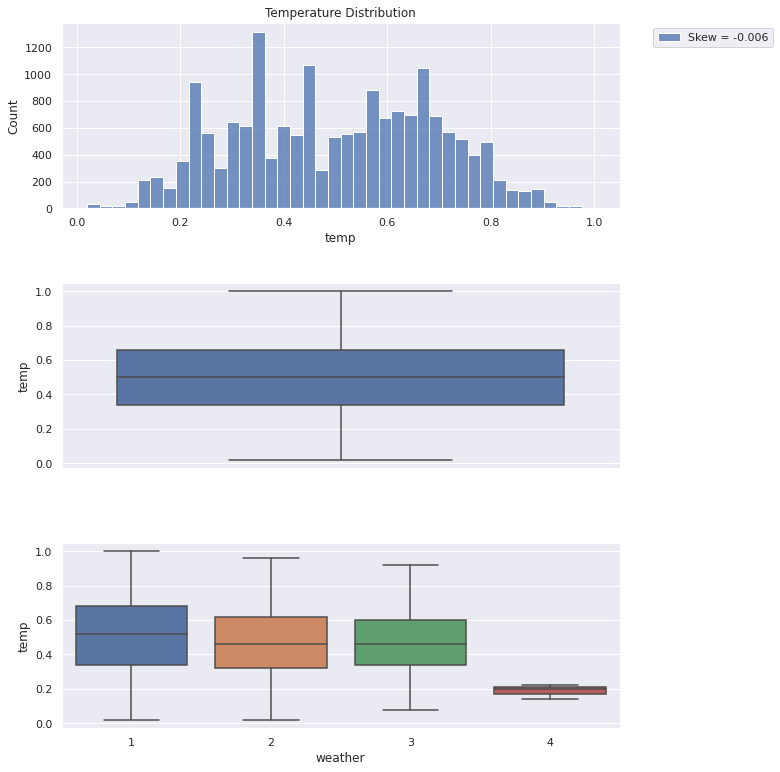

In [ ]:
plt.figure(figsize=(10,10))
skew = df['temp'].skew()
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.4, wspace=0.2)
plt.subplot(311)
plt.title('Temperature Distribution')
sns.histplot(df['temp'],kde=False,label='Skew = %.3f' %(skew))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(312)
sns.boxplot(y=df['temp'])
plt.subplot(313)
sns.boxplot(x=df['weathersit'],y=df['temp'])
plt.xlabel('weather')
plt.savefig('temp',bbox_inches='tight',pad_inches=0.1)

The normalized temperature distribution is fairly a normal/Gaussian distribution. However, there are multiple peaks this can be attributed to the a difference in distributions per weather. The first boxplot shows there were no outliers. The second boxplot depicts the temperature distributions per weather conditions. The varying distributions are conspicuous, as expected, extreme conditions (heavy snow, thunderstorm etc.) have the least range and variance.

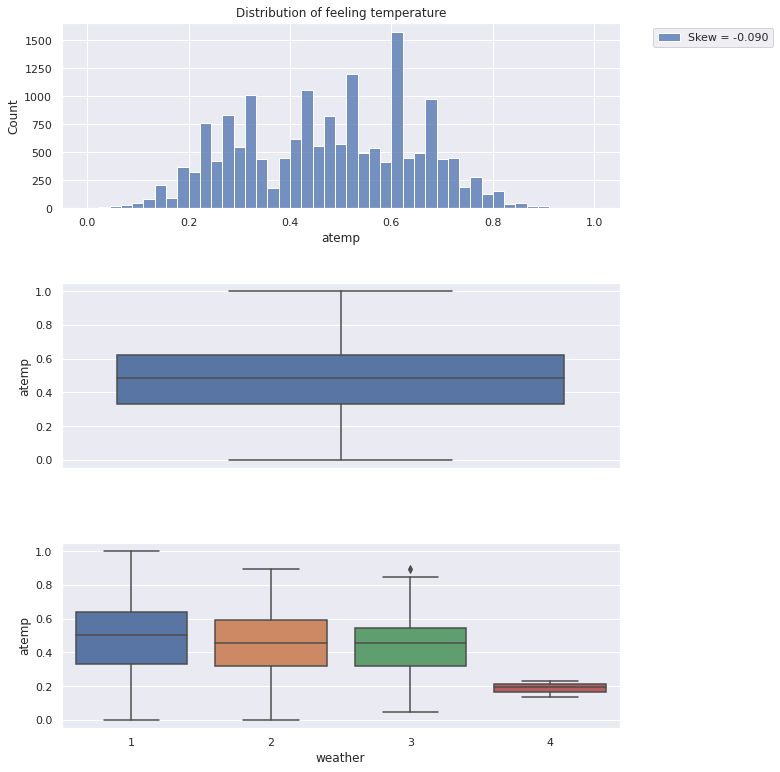

In [ ]:
plt.figure(figsize=(10,10))
skew = df['atemp'].skew()
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.4, wspace=0.2)
plt.subplot(311)
plt.title('Distribution of feeling temperature')
sns.histplot(df['atemp'],kde=False,label='Skew = %.3f' %(skew))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(312)
sns.boxplot(y=df['atemp'])
plt.subplot(313)
sns.boxplot(x=df['weathersit'],y=df['atemp'])
plt.xlabel('weather')
plt.savefig('atemp',bbox_inches='tight', pad_inches=0.1)

In [ ]:
The normalized feeling temperature has shows a distribution similar to the normalized temperature just that in the distributions per weather conditions, an outlier in the light snow/ light rain weather conditions.
This similarity gives a perception that these two features might be highly correlated.

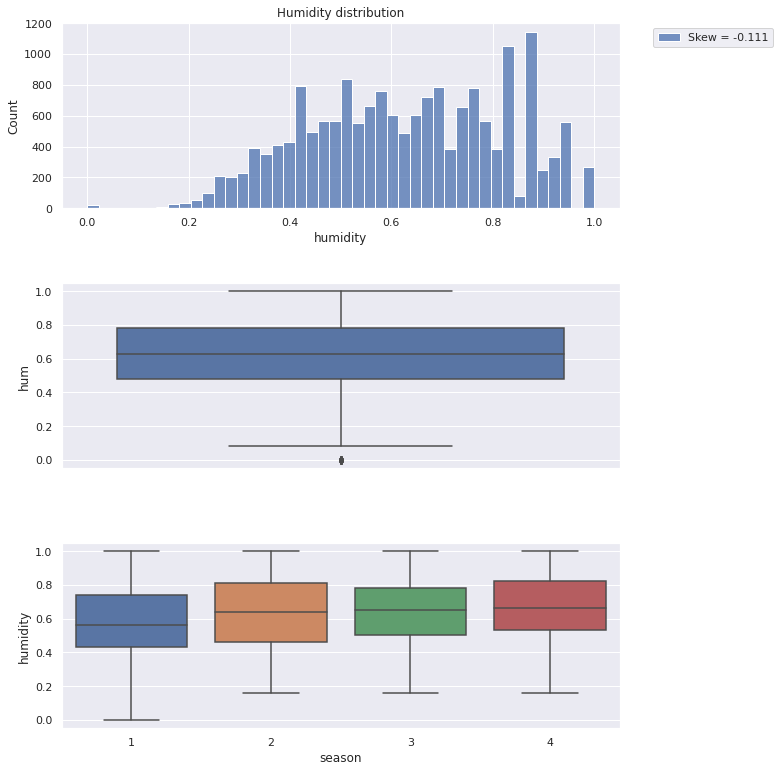

In [ ]:
plt.figure(figsize=(10,10))
skew = df['hum'].skew()
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.4, wspace=0.2)
plt.subplot(311)
plt.title('Humidity distribution')
sns.histplot(df['hum'],kde=False,label='Skew = %.3f' %(skew))
plt.xlabel('humidity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(312)
sns.boxplot(y=df['hum'])
plt.subplot(313)
sns.boxplot(x=df['season'],y=df['hum'])
plt.ylabel('humidity')
plt.savefig('humidity', bbox_inches='tight', pad_inches=0.1)

The normalised humidity distribution is skewed to the right. Majority of the humidity readings lie between approximately 0.4 and 0.8. The first boxplot indicated the presence of an outlier/extreme value but upon further aggregation with the seasons we can see that there is no outlier but the spring season rather has a wide variation and also recorded the least humidity reading.

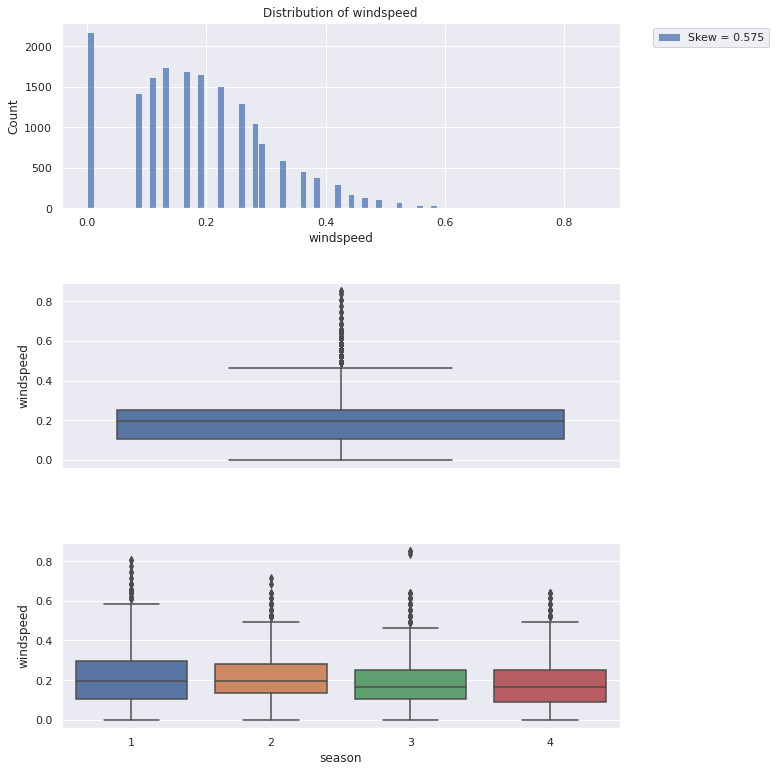

In [ ]:
plt.figure(figsize=(10,10))
skew = df['windspeed'].skew()
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.4, wspace=0.2)
plt.subplot(311)
plt.title('Distribution of windspeed')
sns.histplot(df['windspeed'],kde=False,label='Skew = %.3f' %(skew))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(312)
sns.boxplot(y=df['windspeed'])
plt.subplot(313)
sns.boxplot(x=df['season'],y=df['windspeed'])
plt.savefig('windspeed',bbox_inches='tight', pad_inches=0.1)

The bulk of recorded normalized windspeed stood between 0.1 and 0.3. This implies that there where not much challenges caused by the winds during these periods. However, there were a lot of extreme values record each season.

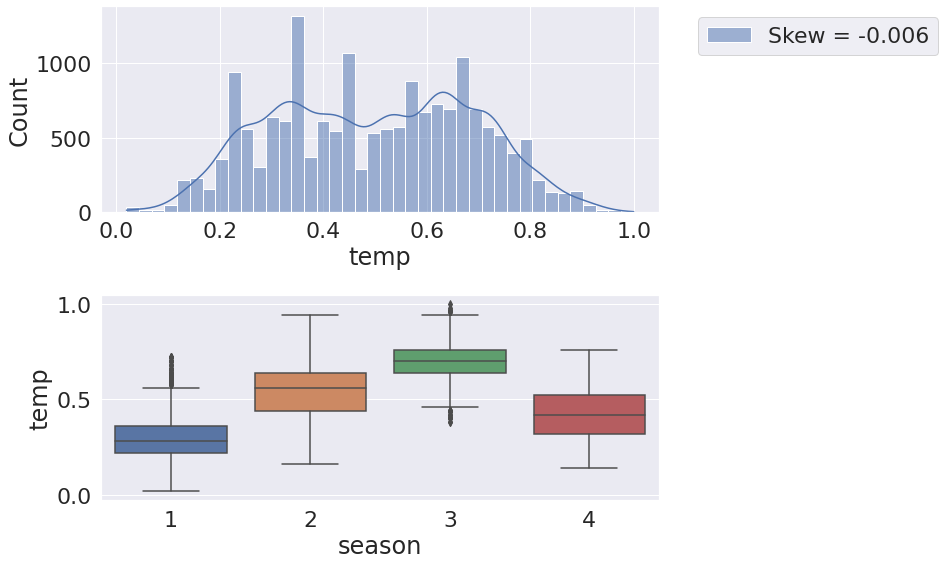

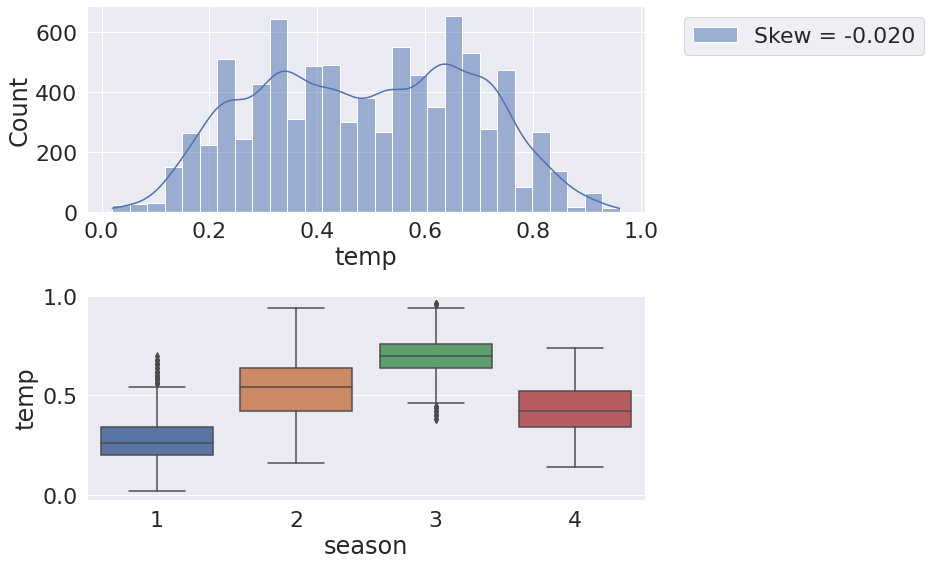

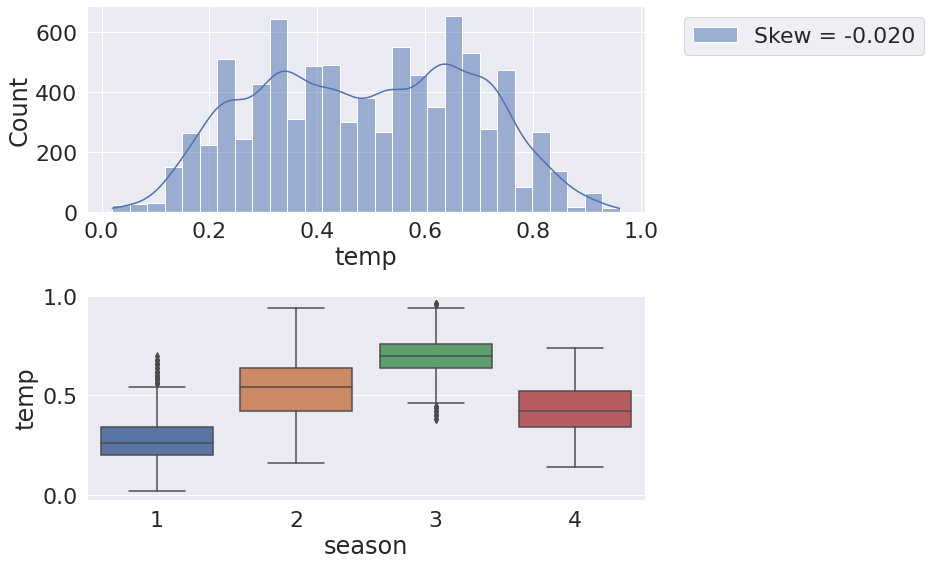

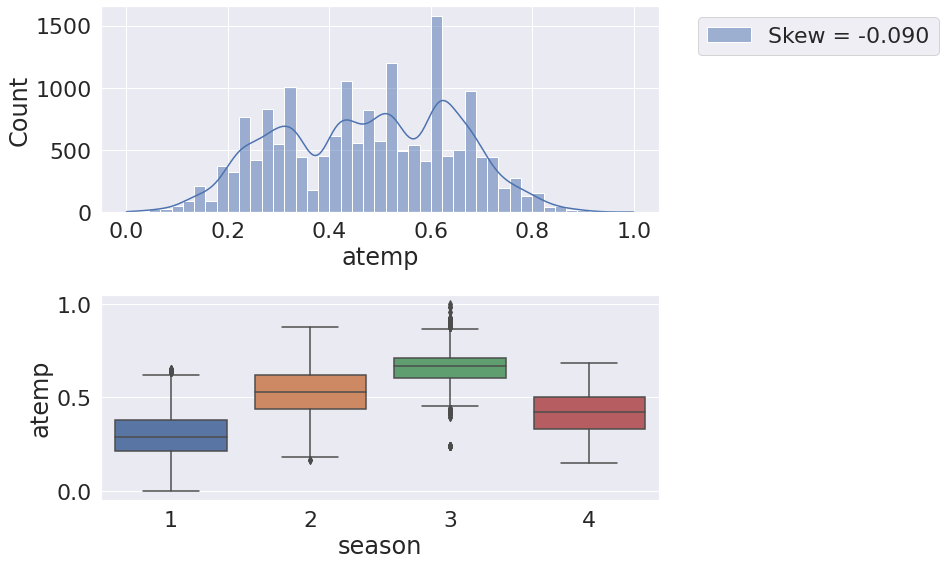

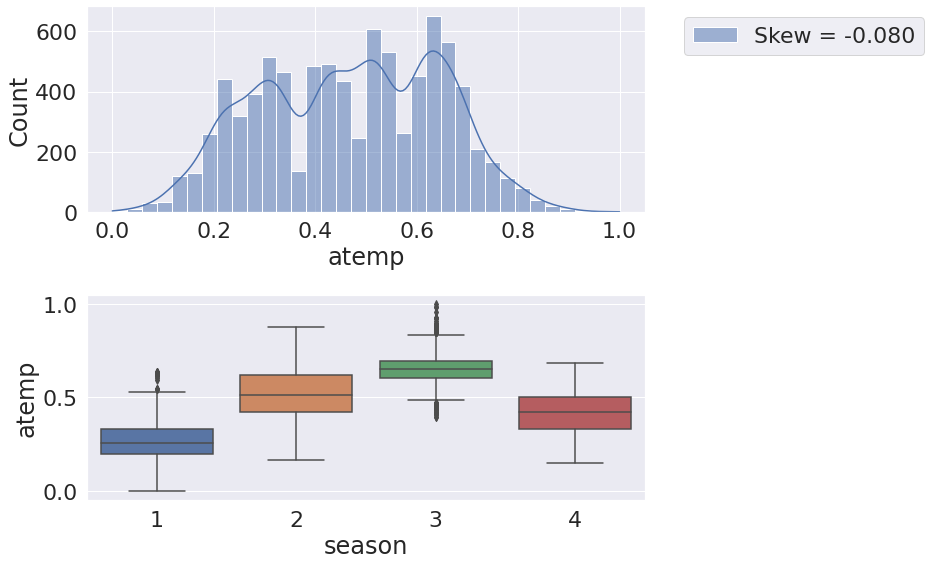

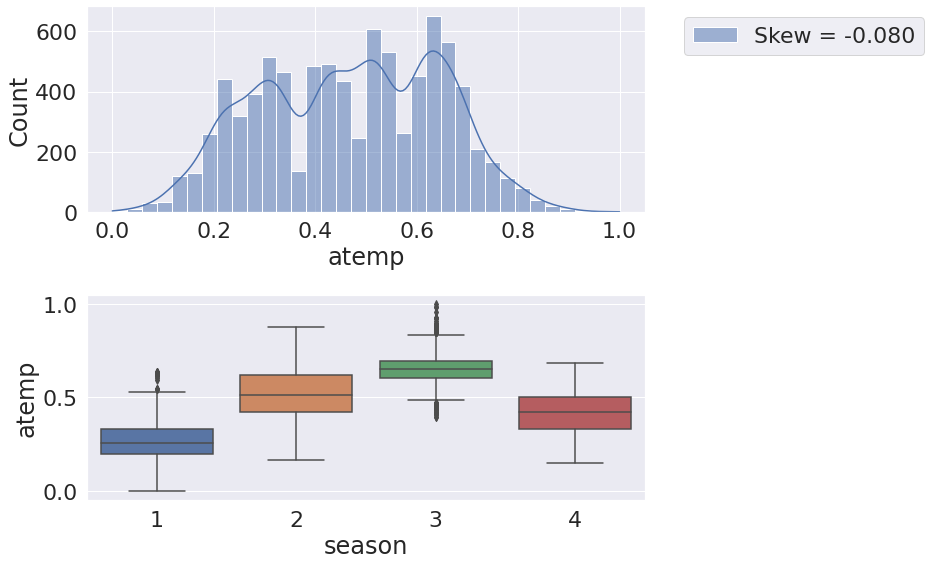

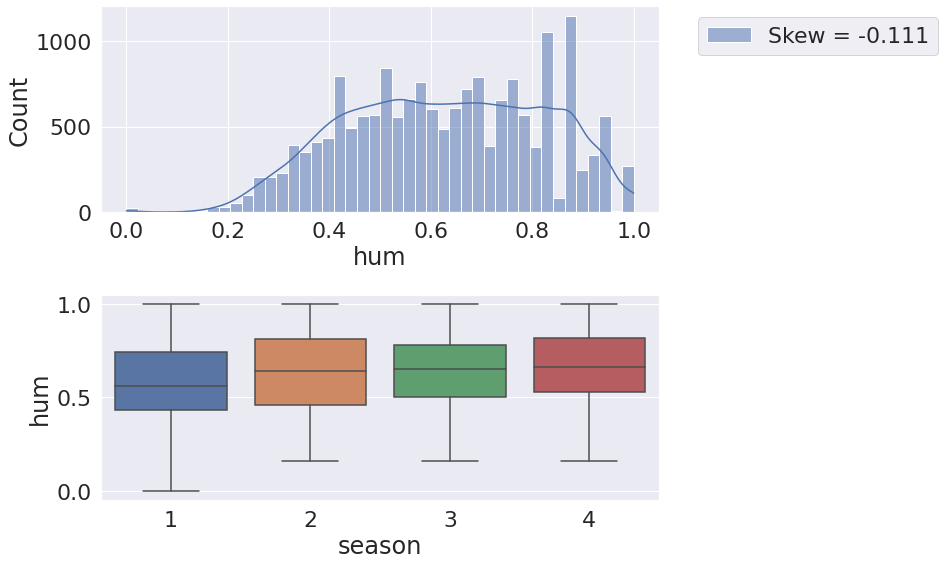

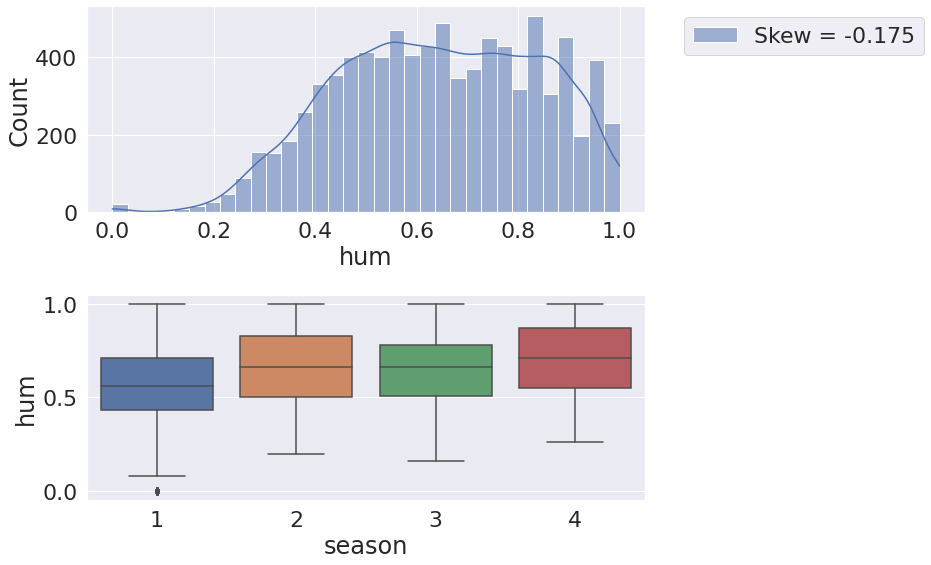

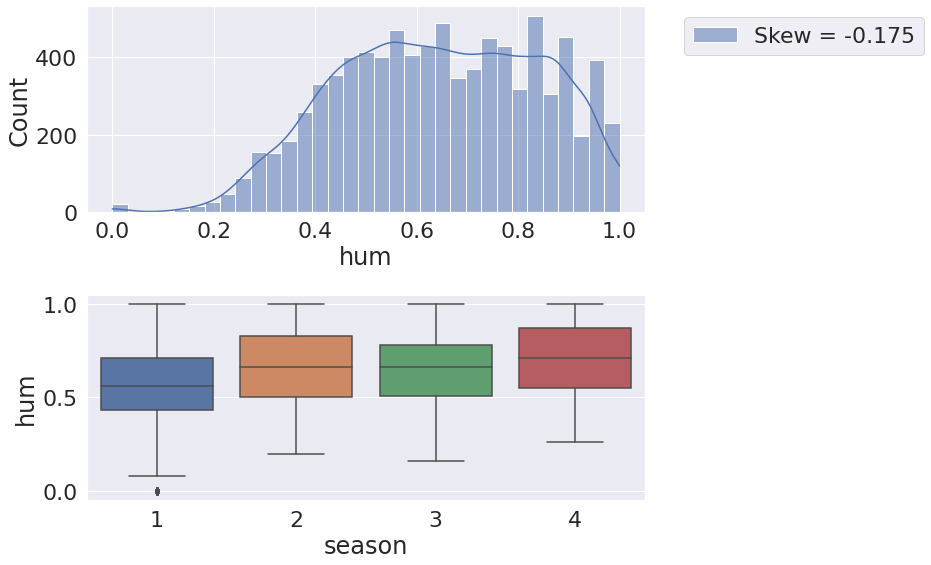

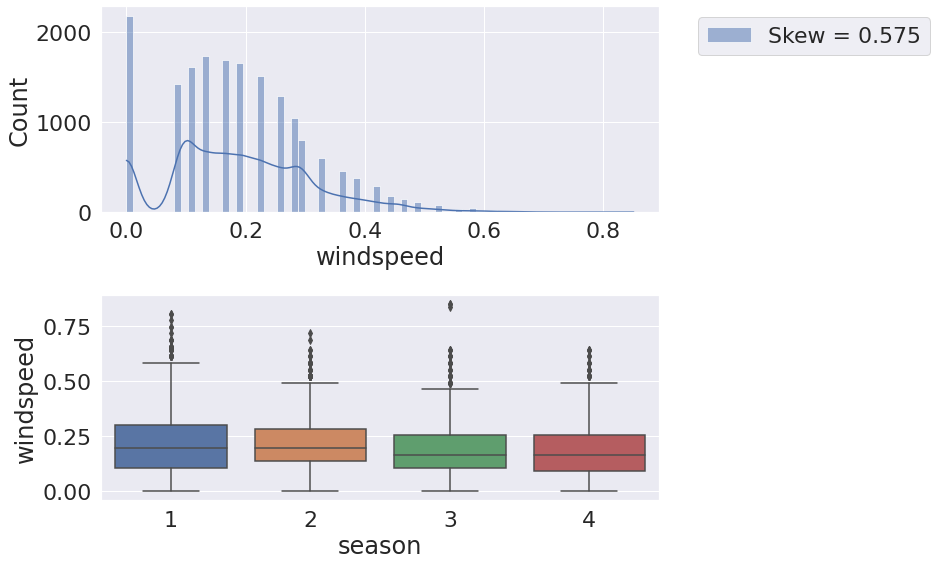

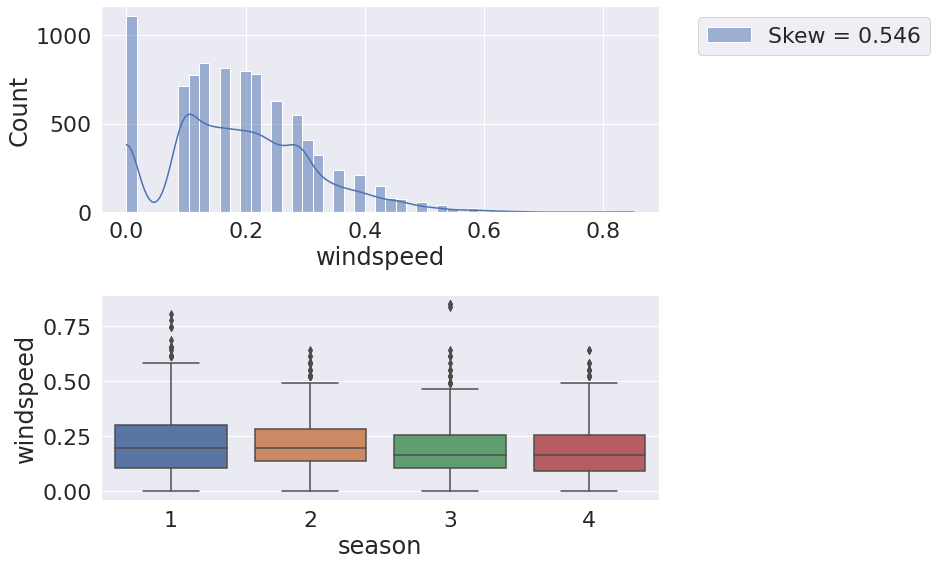

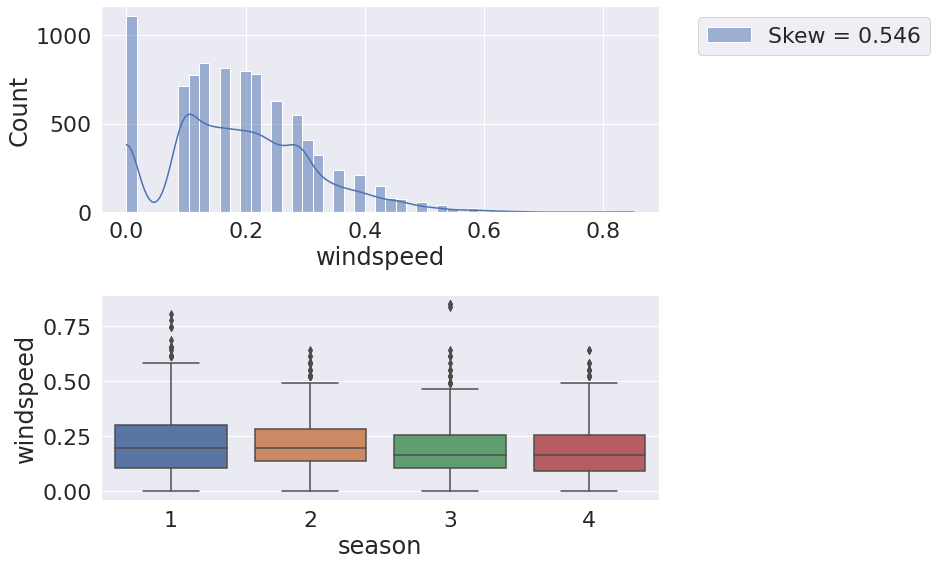

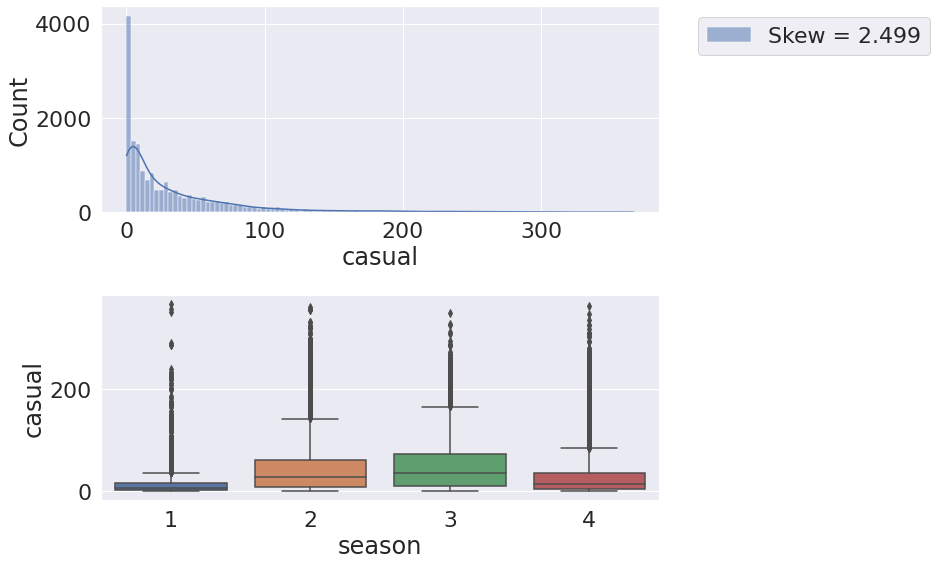

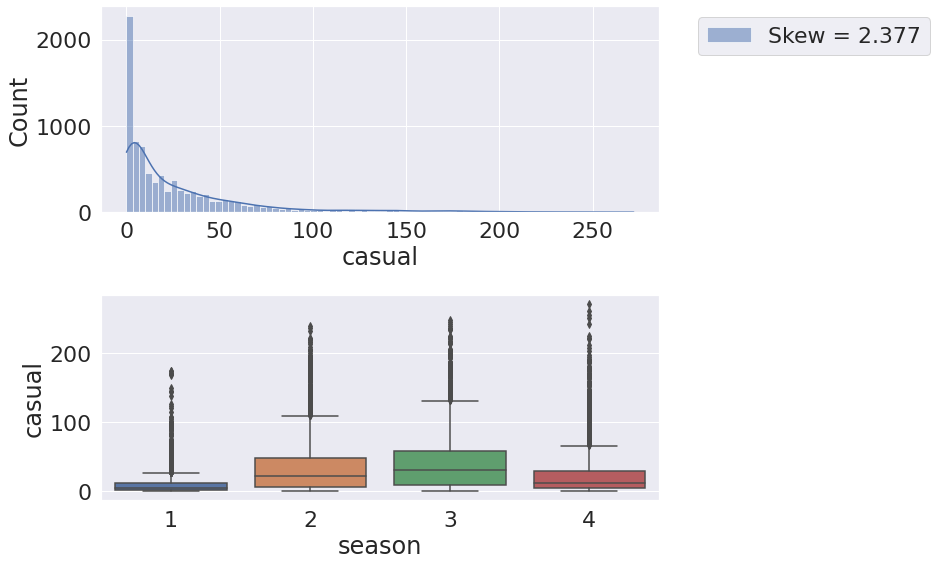

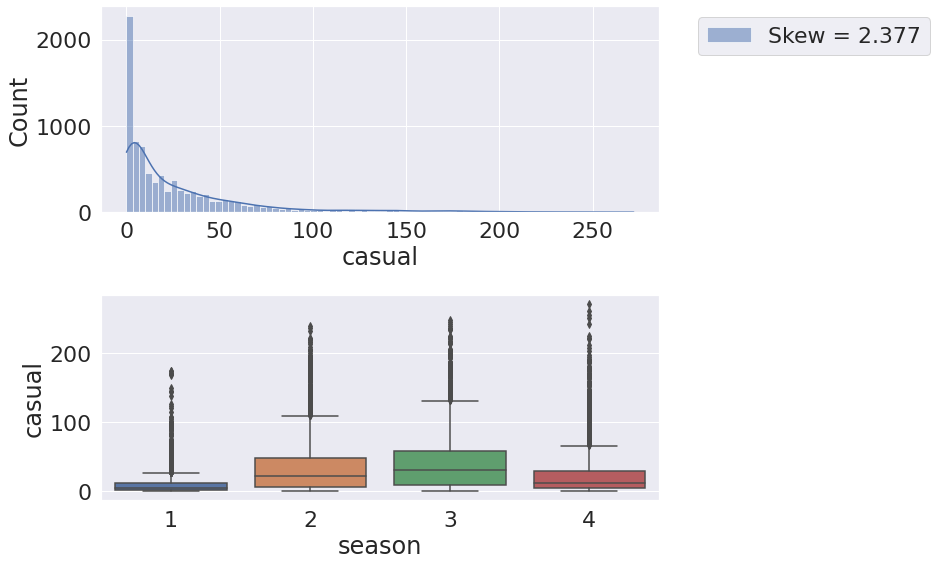

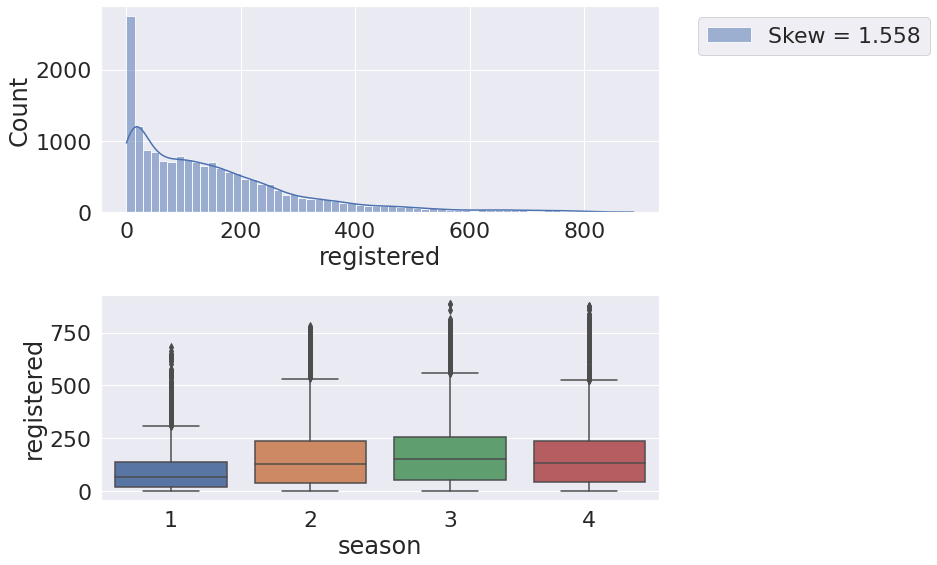

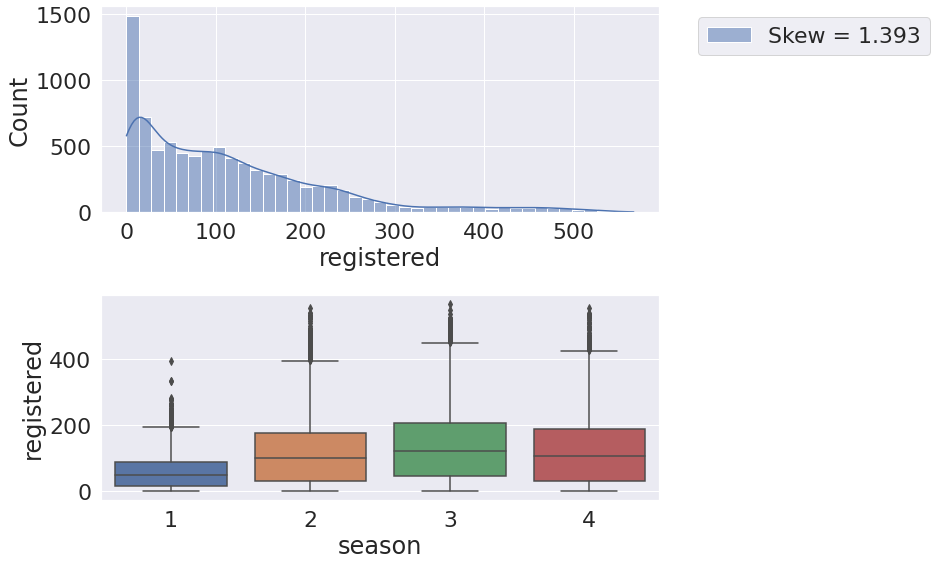

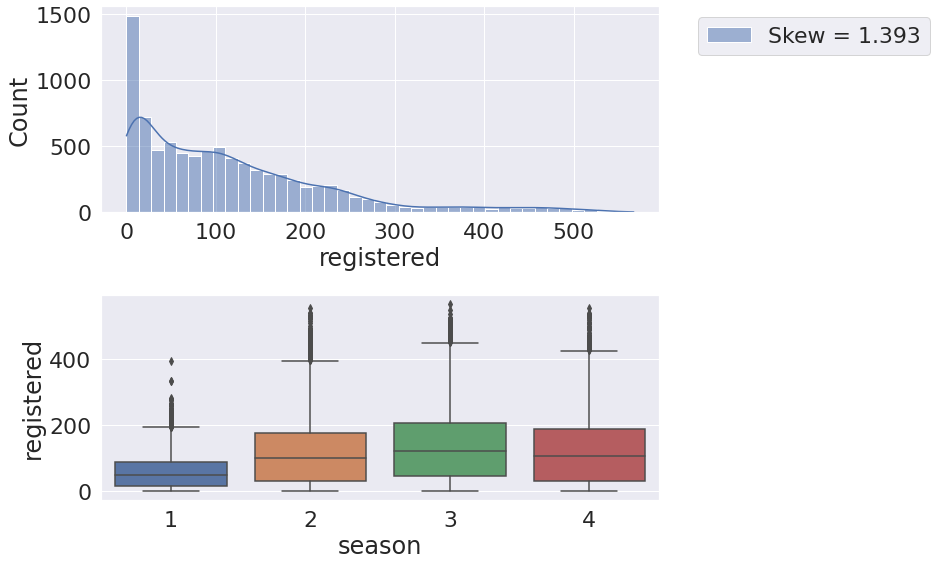

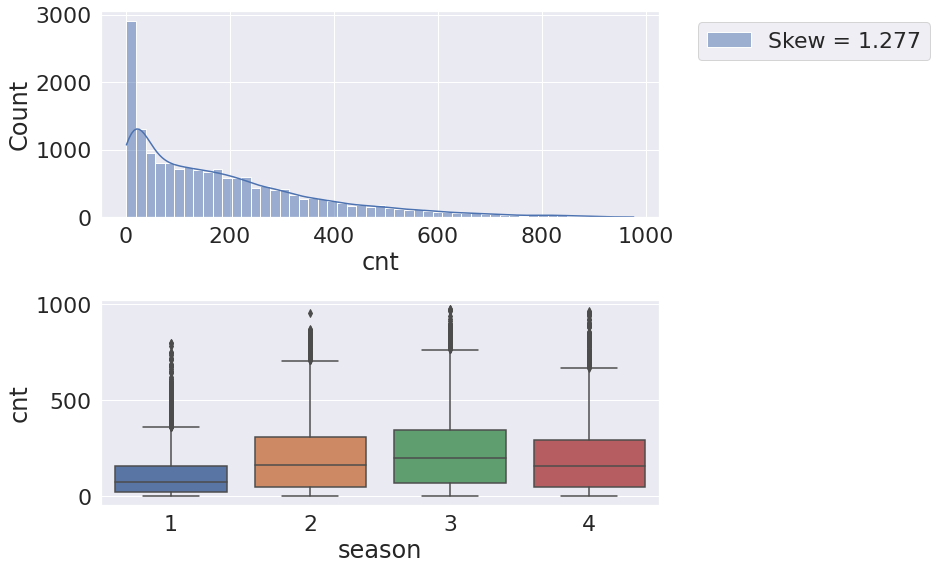

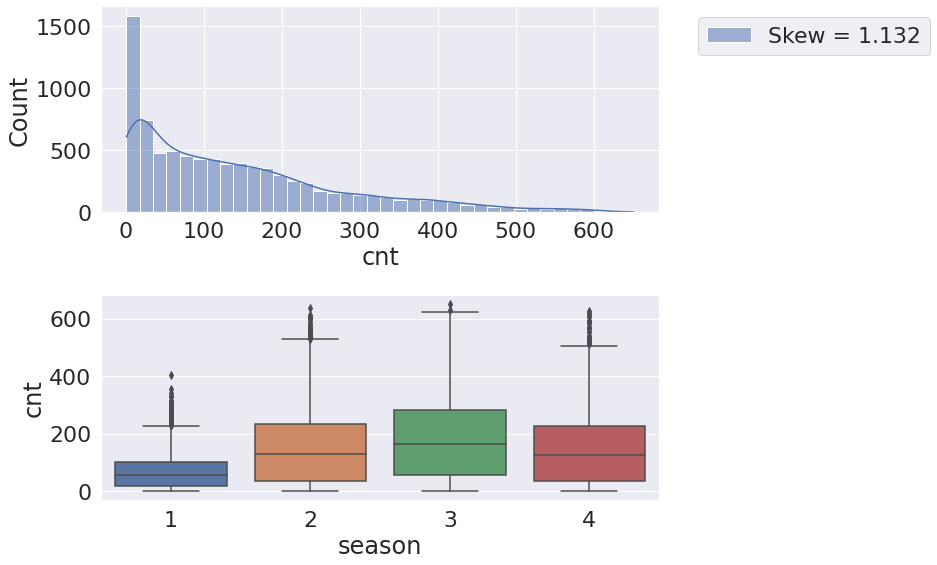

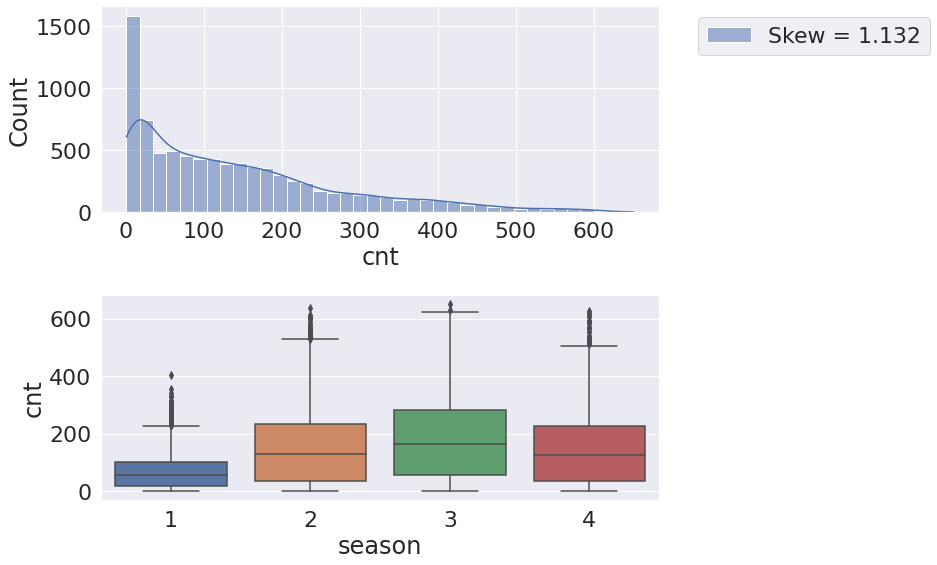

In [ ]:
numz

for x in numz:
	plt.figure(figsize=(10,7))
	skew = df[x].skew()
	plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
	plt.subplot(211)
	sns.histplot(df[x], kde= True, label='Skew = %.3f' %(skew))
	plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
	plt.subplot(212)
	sns.boxplot(x=df['season'],y=df[x])
	plt.show()
	
	plt.figure(figsize=(10,7))
	skew = df0[x].skew()
	plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
	plt.subplot(211)
	sns.histplot(df0[x], kde= True, label='Skew = %.3f' %(skew))
	plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
	plt.subplot(212)
	sns.boxplot(x=df0['season'],y=df[x])
	plt.show()
	
	plt.figure(figsize=(10,7))
	skew = df0[x].skew()
	plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
	plt.subplot(211)
	sns.histplot(df0[x], kde= True, label='Skew = %.3f' %(skew))
	plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
	plt.subplot(212)
	sns.boxplot(x=df0['season'],y=df[x])
	plt.show()

# **Bivarite Data Analysis: Categorical data**

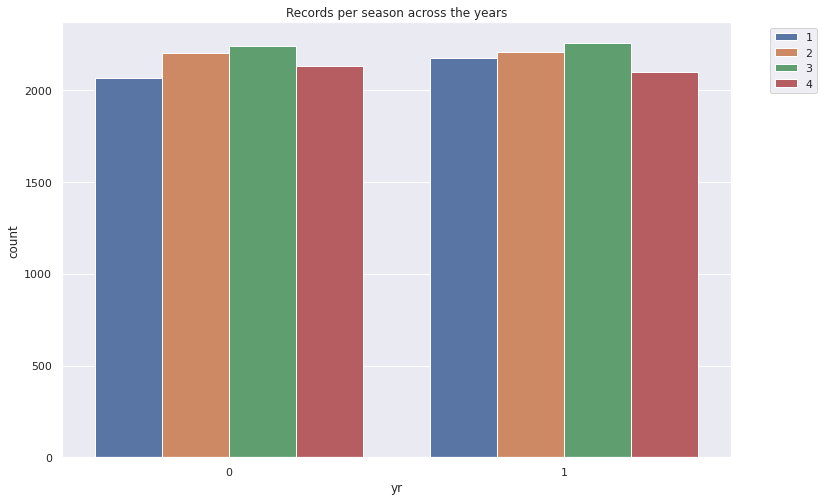

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='yr',hue='season', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Records per season across the years')
plt.savefig('seasonyr')

It can be seen here that more records were taken in winter 2011 than in winter 2012. The opposite happened with data taken in spring.

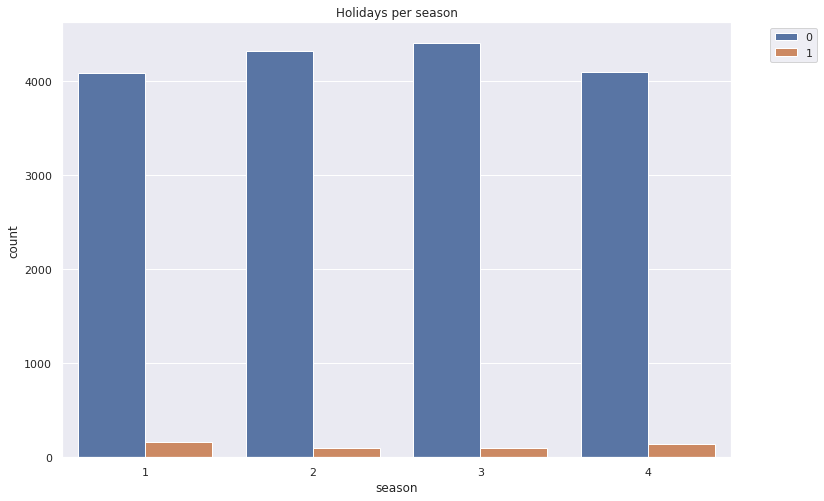

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Holidays per season')
sns.countplot(data=df, x='season', hue='holiday')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('holiseason', bbox_inches='tight')
plt.show()

We can see from here that even though holidays are very few, they have been spread across all seasons though not evenly spread.

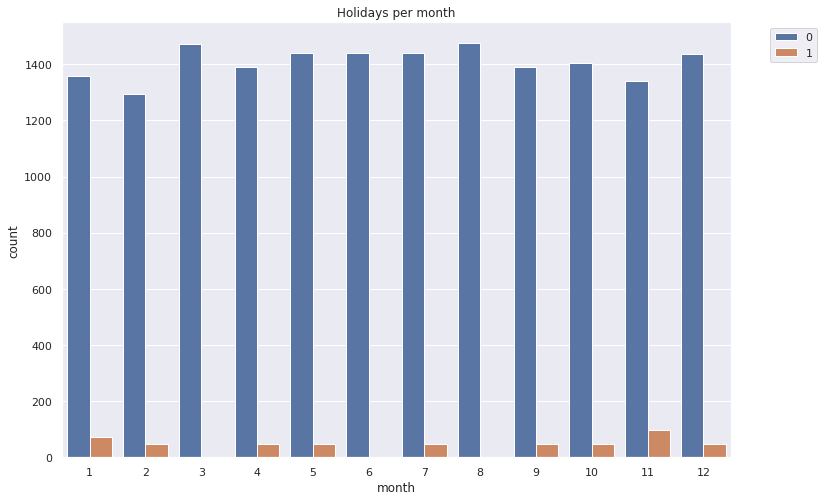

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Holidays per month')
sns.countplot(x='mnth',hue='holiday', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('month')
plt.savefig('holimonth', bbox_inches='tight')
plt.show()

March, June and August have no holidays. June and August can be anticipated to have high number of trips since in addition to this discovery, the weather is favourable at such times.

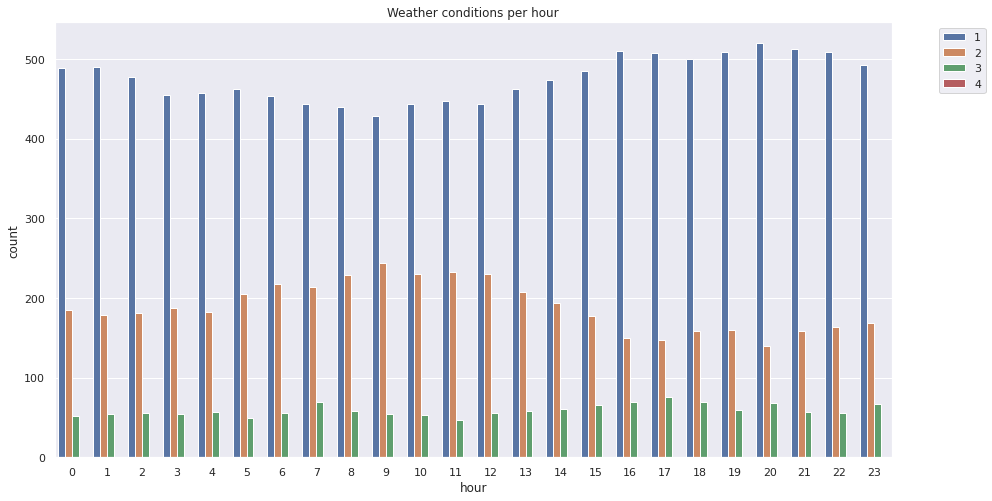

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Weather conditions per hour')
sns.countplot(data=df, x='hr', hue='weathersit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('hour')
plt.savefig('hourweather',bbox_inches='tight')

Most of the time is dominated by clear weather. In times where there is mist and few clouds, the situation gradually increases from the early hours to the afternoon and then gradually die down. In periods of light snow and light thunderstorms, they occur in a haphazard manner.

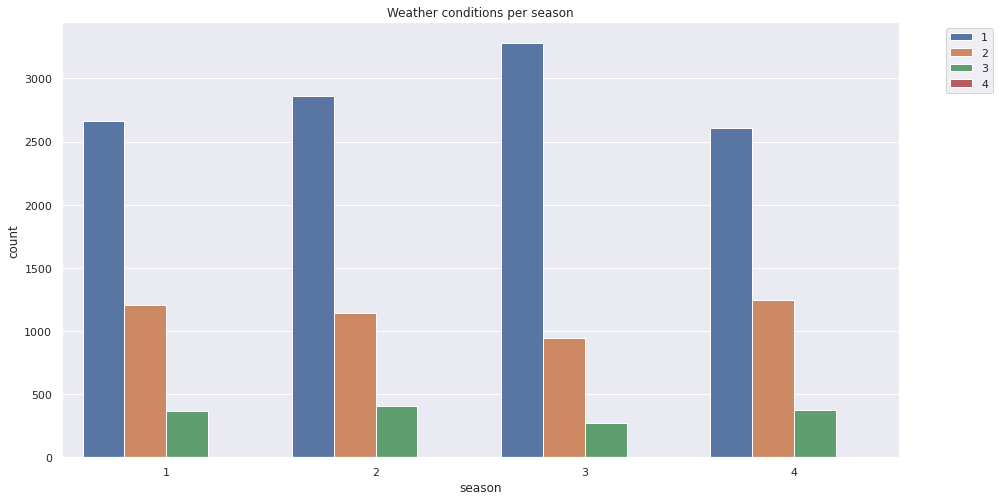

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Weather conditions per season')
sns.countplot(data=df, x='season', hue='weathersit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('weathour',bbox_inches='tight')

There is a fair share of favourable weather conditions across all seasons however, fall season has the least unfavourable weather periods. This can impact the number of trips positively

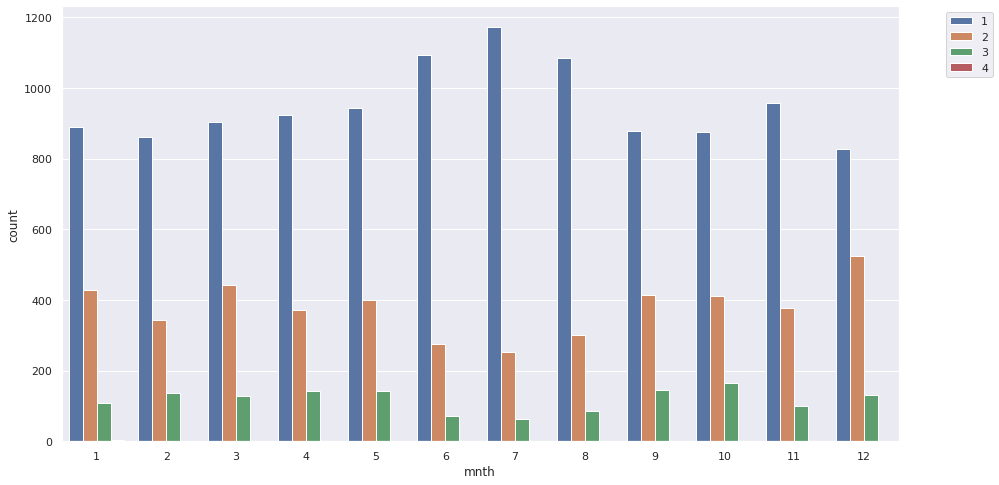

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='mnth', hue='weathersit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

June, July and August are periods with the most favourable weather conditions.

# **Bivariate Data Analysis: categorical & continuous**

No handles with labels found to put in legend.


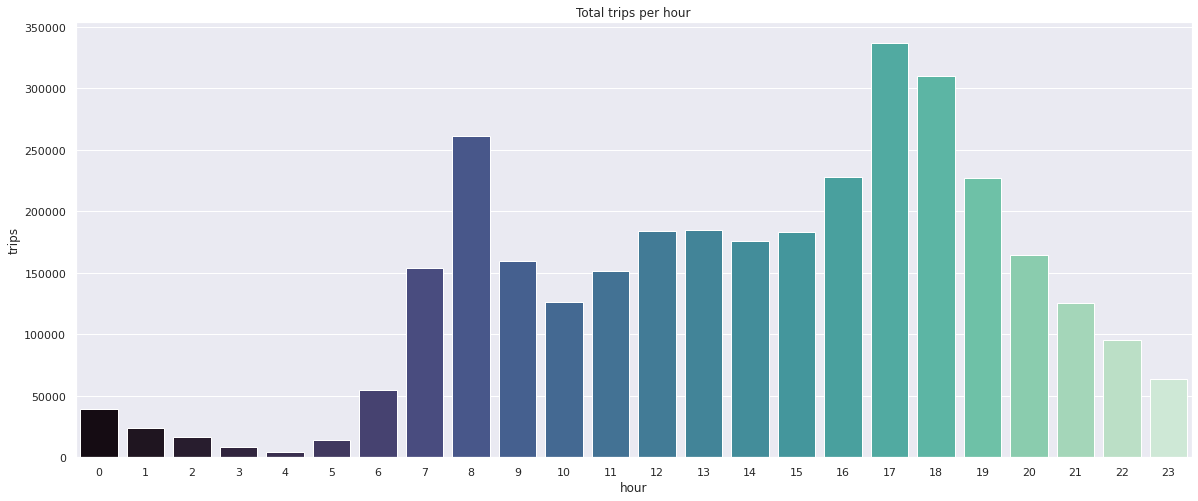

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Total trips per hour')
sns.barplot(x="hr", y="cnt", data=df, estimator=sum, ci=None,  palette='mako')
plt.legend().remove()
plt.xlabel('hour')
plt.ylabel('trips')
plt.savefig('tripsperhour', bbox_inches='tight')

This barplot displays the accumulated number of trips per each hour. Bulk of the trips took place between 7 and 20 hours. This confirms the hypothesis that patronage will increase from the morning rush our, maintain a momentum through to the late rush hour and died down as bikers return home.

No handles with labels found to put in legend.


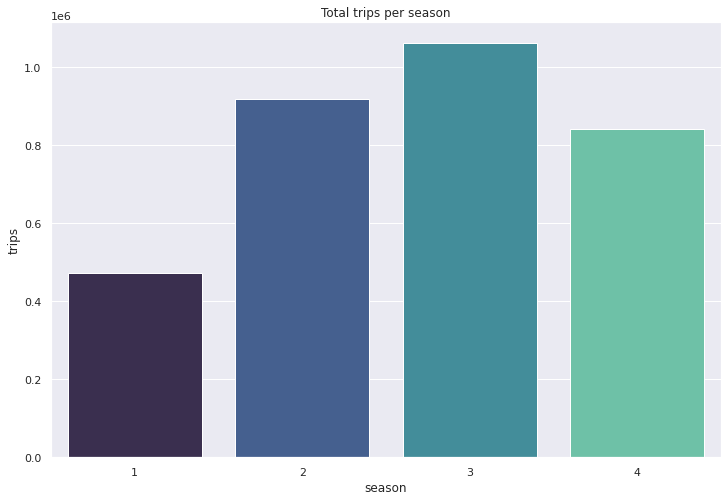

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Total trips per season')
sns.barplot(x="season", y="cnt", data=df, estimator=sum, ci=None ,palette='mako')
plt.legend().remove()
plt.xlabel('season')
plt.ylabel('trips')
plt.savefig('tripsperseason', bbox_inches='tight')

The y axis graduations have been divided by 1000000. Here, we see that the fall season has accumulated the highest number of trips, approximately 1.2 million followed by summer around 9 hundred trips. Surprisingly, winter has higher number of trips than fall. This can be due to the fact from the earlier discovery that the atmosphere was clear very good number of times during the winter season thus during such times, bikers made a lot of trips.

No handles with labels found to put in legend.


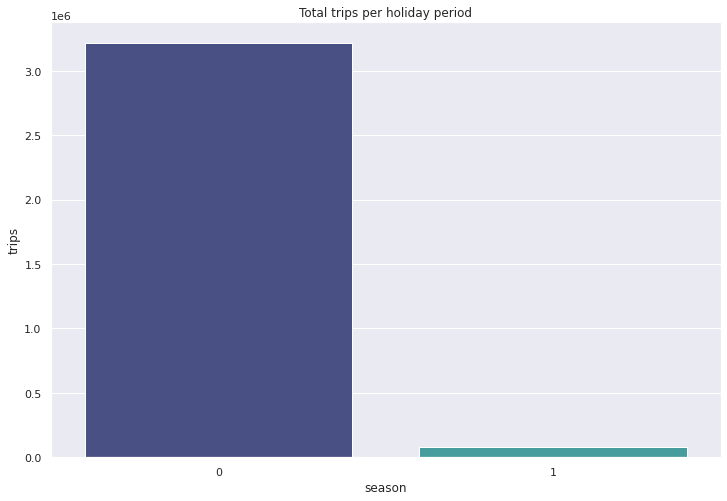

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Total trips per holiday period')
sns.barplot(x="holiday", y="cnt", data=df, estimator=sum, ci=None ,palette='mako')
plt.legend().remove()
plt.xlabel('season')
plt.ylabel('trips')
plt.savefig('tripsperhday', bbox_inches='tight')

Relatively, a hand full of trips were made on holidays. This can be attributed to the fact that people tend to indulge in other activities during such times or decide to spend time with indoors/outdoors with family and friends.

No handles with labels found to put in legend.


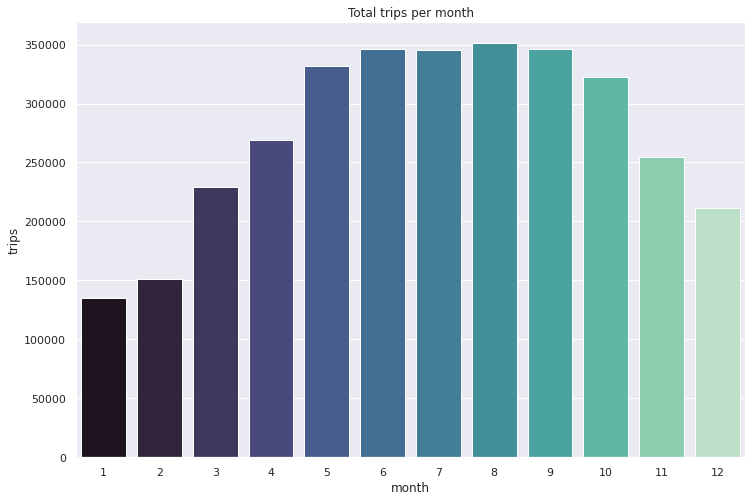

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Total trips per month')
sns.barplot(x="mnth", y="cnt", data=df, estimator=sum, ci=None ,palette='mako')
plt.legend().remove()
plt.xlabel('month')
plt.ylabel('trips')
plt.savefig('tripspermonth', bbox_inches='tight')

With 350000 trips, August recorded the highest number of trips. January recorded the least with about 140000. Most of the trips happened from April to September as they have more clear weather periods 

No handles with labels found to put in legend.


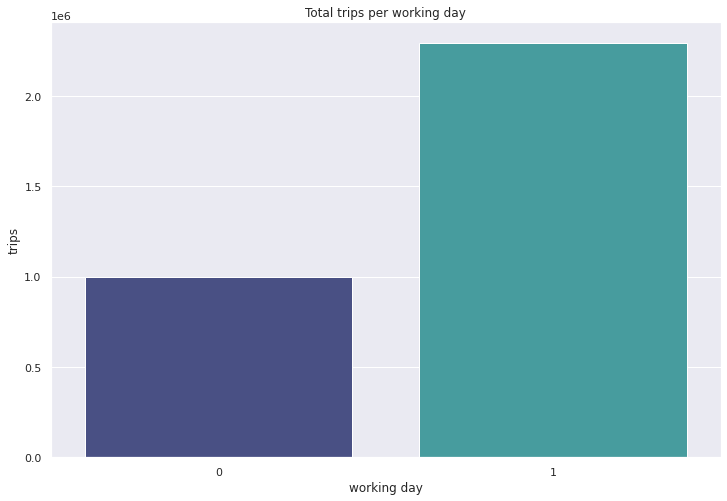

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Total trips per working day')
sns.barplot(x="workingday", y="cnt", data=df, estimator=sum, ci=None ,palette='mako')
plt.legend().remove()
plt.xlabel('working day')
plt.ylabel('trips')
plt.savefig('tripsperworkingday', bbox_inches='tight')

1 million trips were recorded on non working days as compared to around 2.8 million on working days. This can be due to the fact that bike trips help swerve heavy traffic jams during business hours whereas more people choose to rest or indulge in other activities on non working days. The sizeable number of trips on non working days can be attributed to shopping and excercising activities.

No handles with labels found to put in legend.


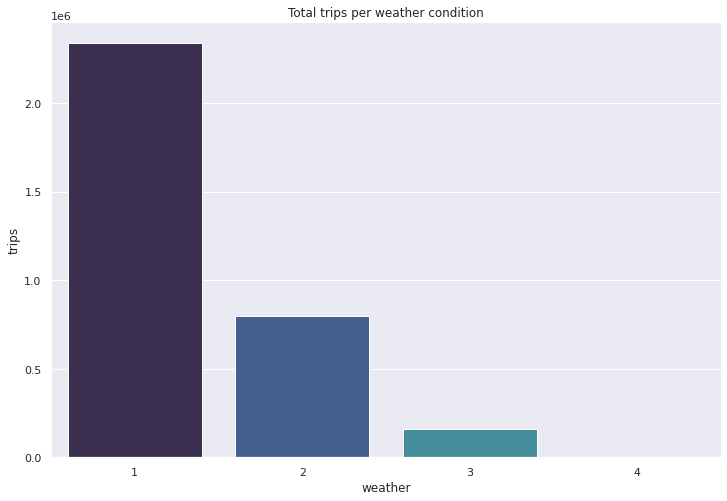

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Total trips per weather condition')
sns.barplot(x="weathersit", y="cnt", data=df, estimator=sum, ci=None ,palette='mako')
plt.legend().remove()
plt.xlabel('weather')
plt.ylabel('trips')
plt.savefig('tripsperweather', bbox_inches='tight')

As anticipated in the hypothesis, periods with clear atmosphere accumulated the most number of trips as such atmosphere is more conducive for biking as opposed to thunderstorms.

No handles with labels found to put in legend.


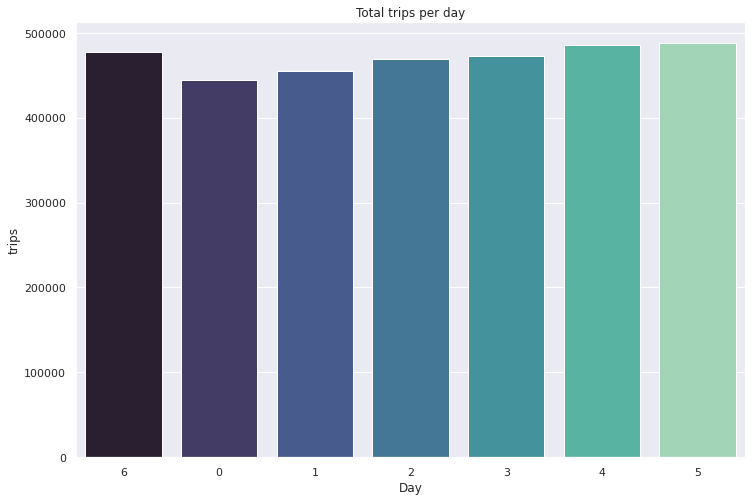

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Total trips per day')
sns.barplot(x="weekday", y="cnt", data=df, estimator=sum, ci=None ,palette='mako')
plt.legend().remove()
plt.xlabel('Day')
plt.ylabel('trips')
plt.savefig('tripsperweekday', bbox_inches='tight')

Not much difference in the count of trips on daily basis only that Sunday recorded the fewest. Probably because a lot of people rest on Sundays.

No handles with labels found to put in legend.


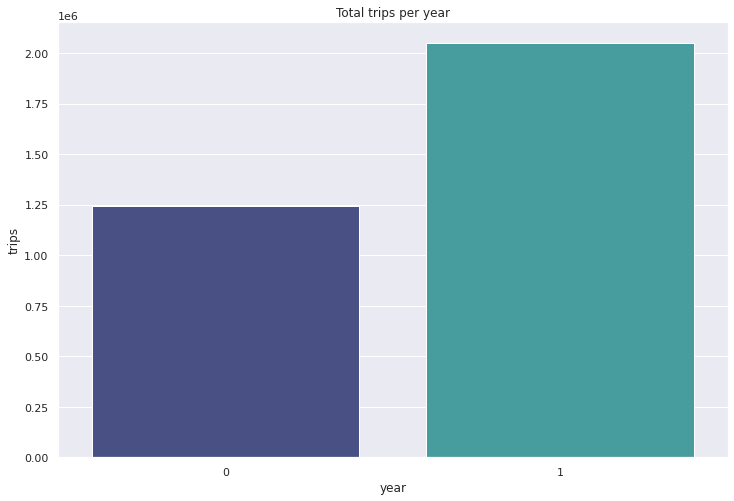

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Total trips per year')
sns.barplot(x="yr", y="cnt", data=df, estimator=sum, ci=None ,palette='mako')
plt.legend().remove()
plt.xlabel('year')
plt.ylabel('trips')
plt.savefig('tripsperyr', bbox_inches='tight')

As discussed earlier, there has been a massive rise in number of trips from 2011 to 2012.

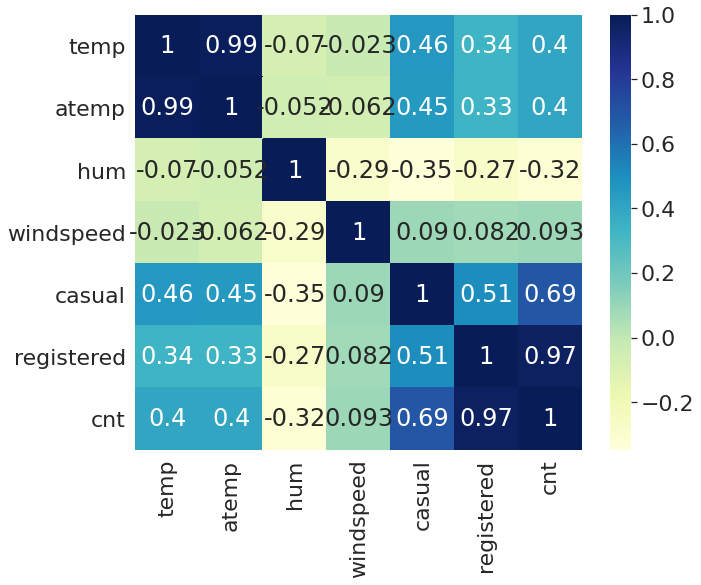

In [ ]:
cmatrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cmatrix, annot=True, cmap='YlGnBu')

<Figure size 720x576 with 0 Axes>

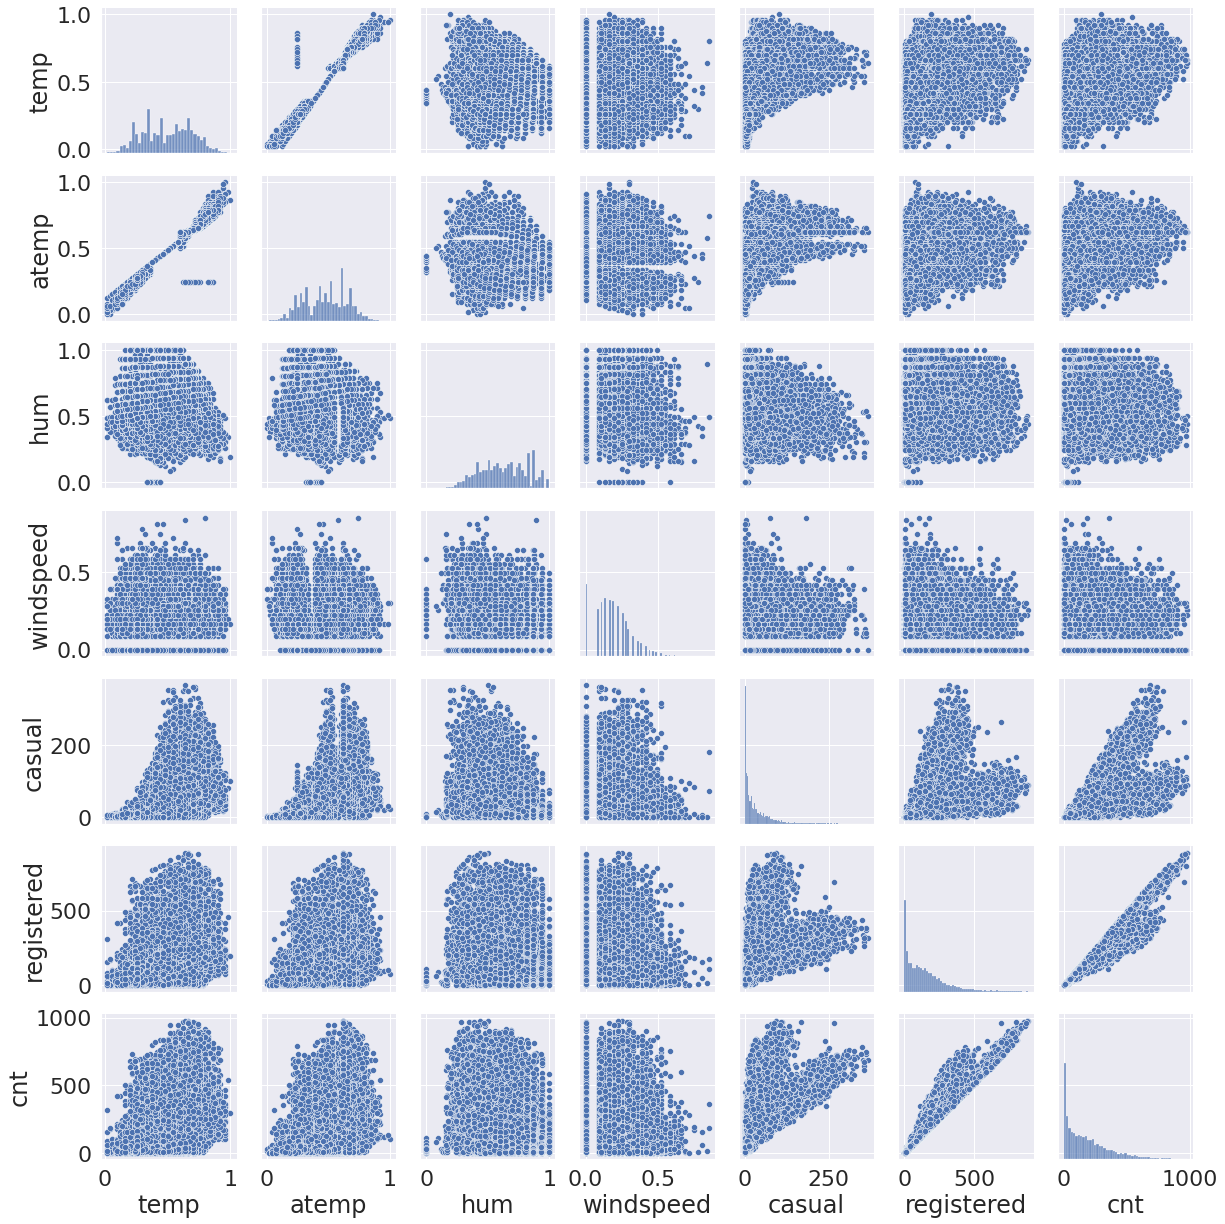

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(df)

**make a pivot table and display count of rides per day/hour in a heatmap**

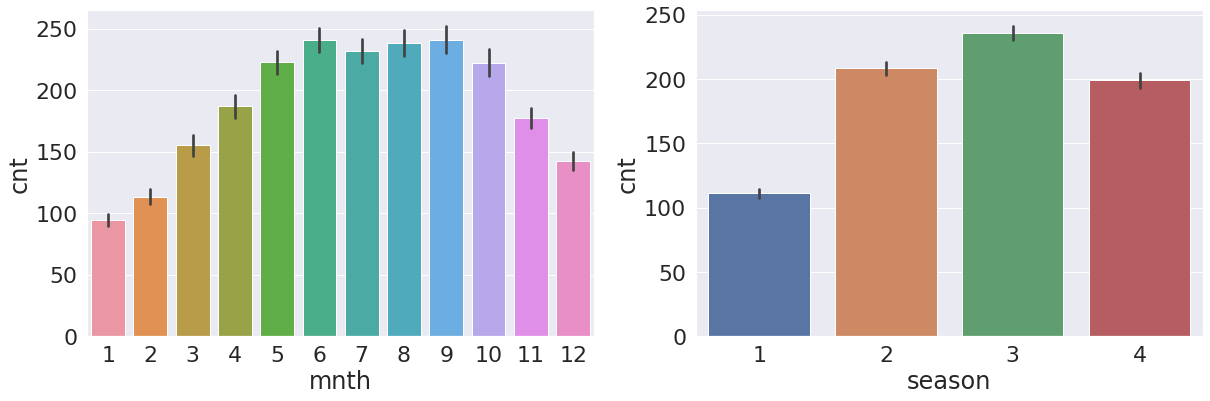

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(121)
#plt.figure(figsize = (10,6))
sns.barplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(122)
sns.barplot(x = 'season', y = 'cnt', data = df)

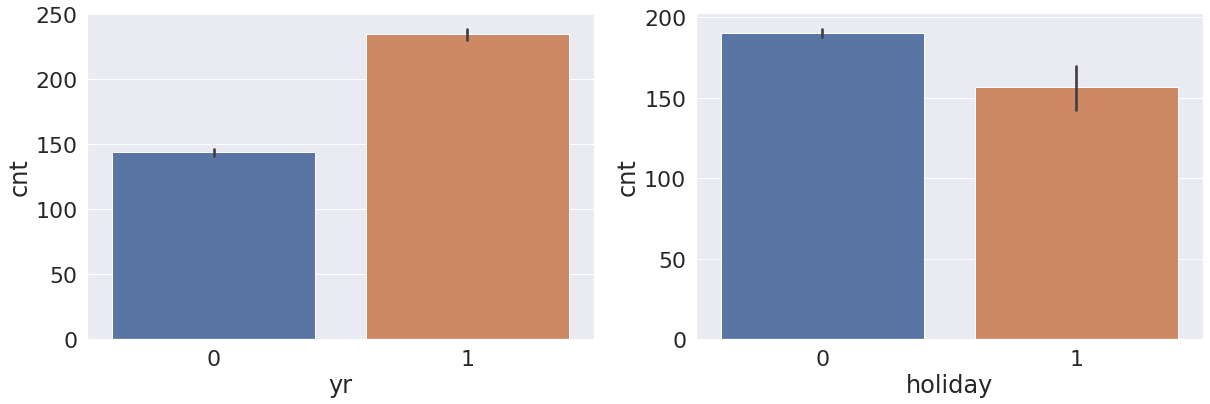

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(121)
#plt.figure(figsize = (10,6))
sns.barplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(122)
sns.barplot(x = 'holiday', y = 'cnt', data = df)

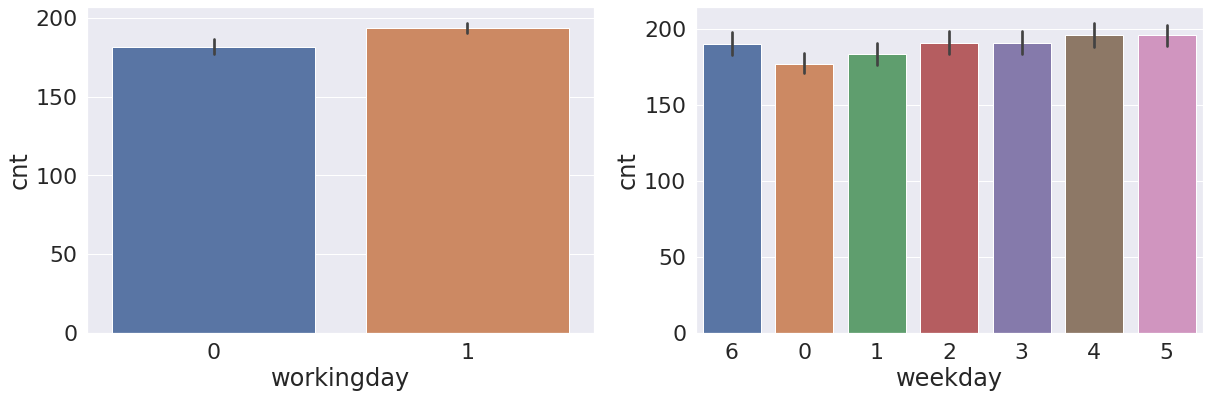

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(121)
#plt.figure(figsize = (10,6))
sns.barplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(122)
sns.barplot(x = 'weekday', y = 'cnt', data = df)

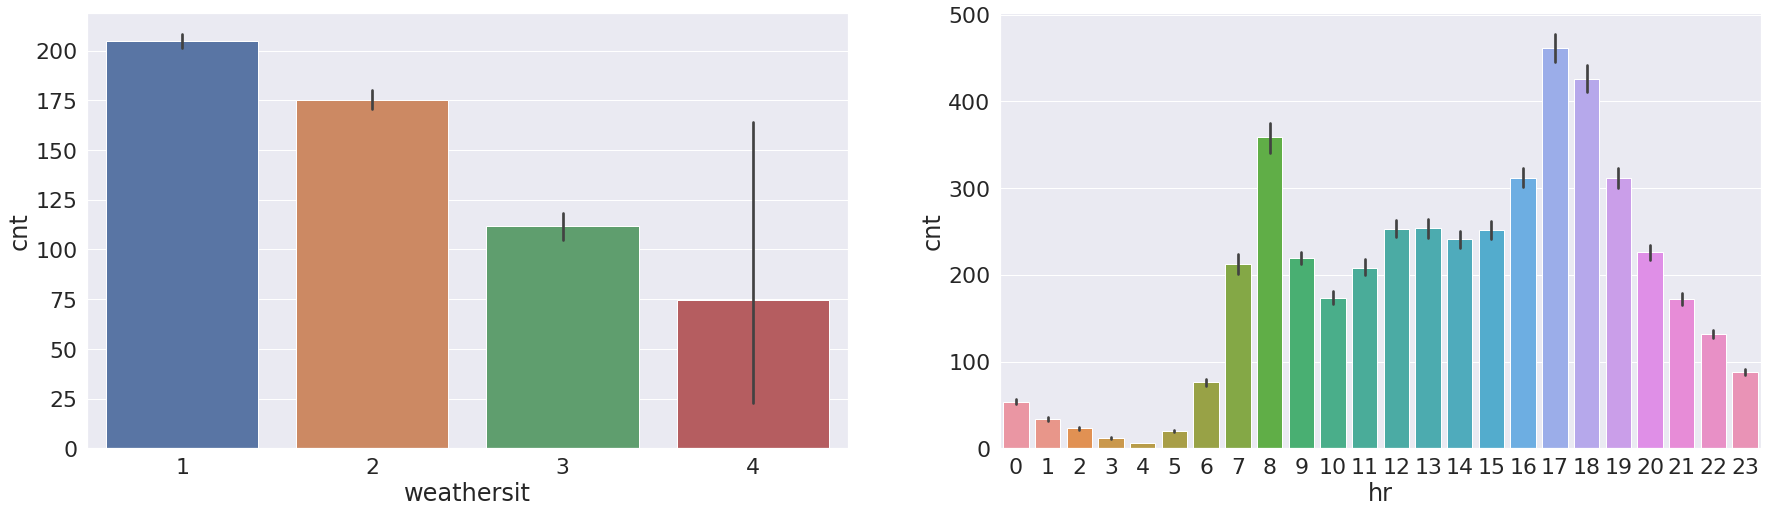

In [ ]:
plt.figure(figsize = (30,8))
plt.subplot(121)
#plt.figure(figsize = (10,6))
sns.barplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(122)
sns.barplot(x = 'hr', y = 'cnt', data = df)

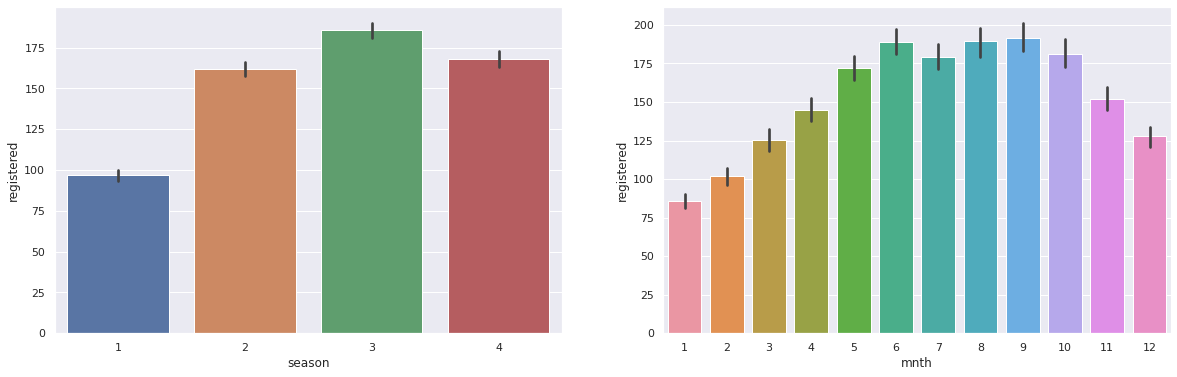

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(121)
#plt.figure(figsize = (10,6))
sns.barplot(x = 'season', y = 'registered', data = df)
plt.subplot(122)
sns.barplot(x = 'mnth', y = 'registered', data = df)

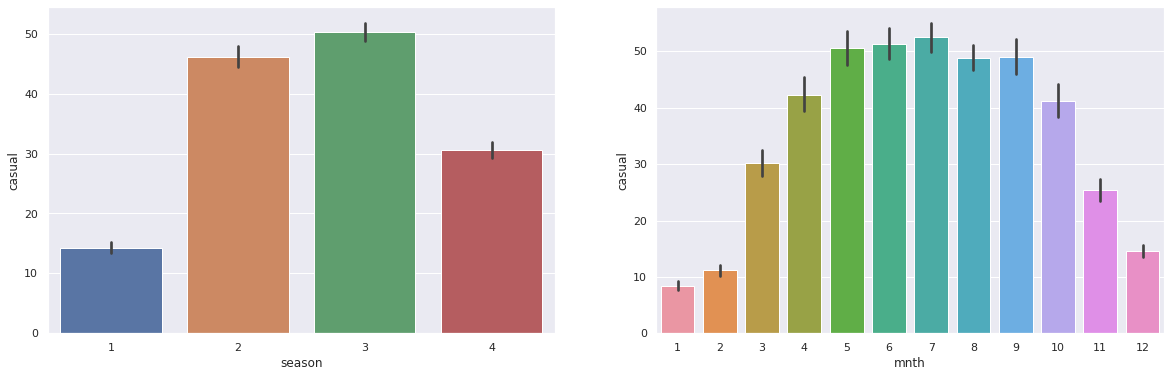

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(121)
#plt.figure(figsize = (10,6))
sns.barplot(x = 'season', y = 'casual', data = df)
plt.subplot(122)
sns.barplot(x = 'mnth', y = 'casual', data = df)

In [ ]:
len(df1)

8734

Text(0, 0.5, 'Rentals')

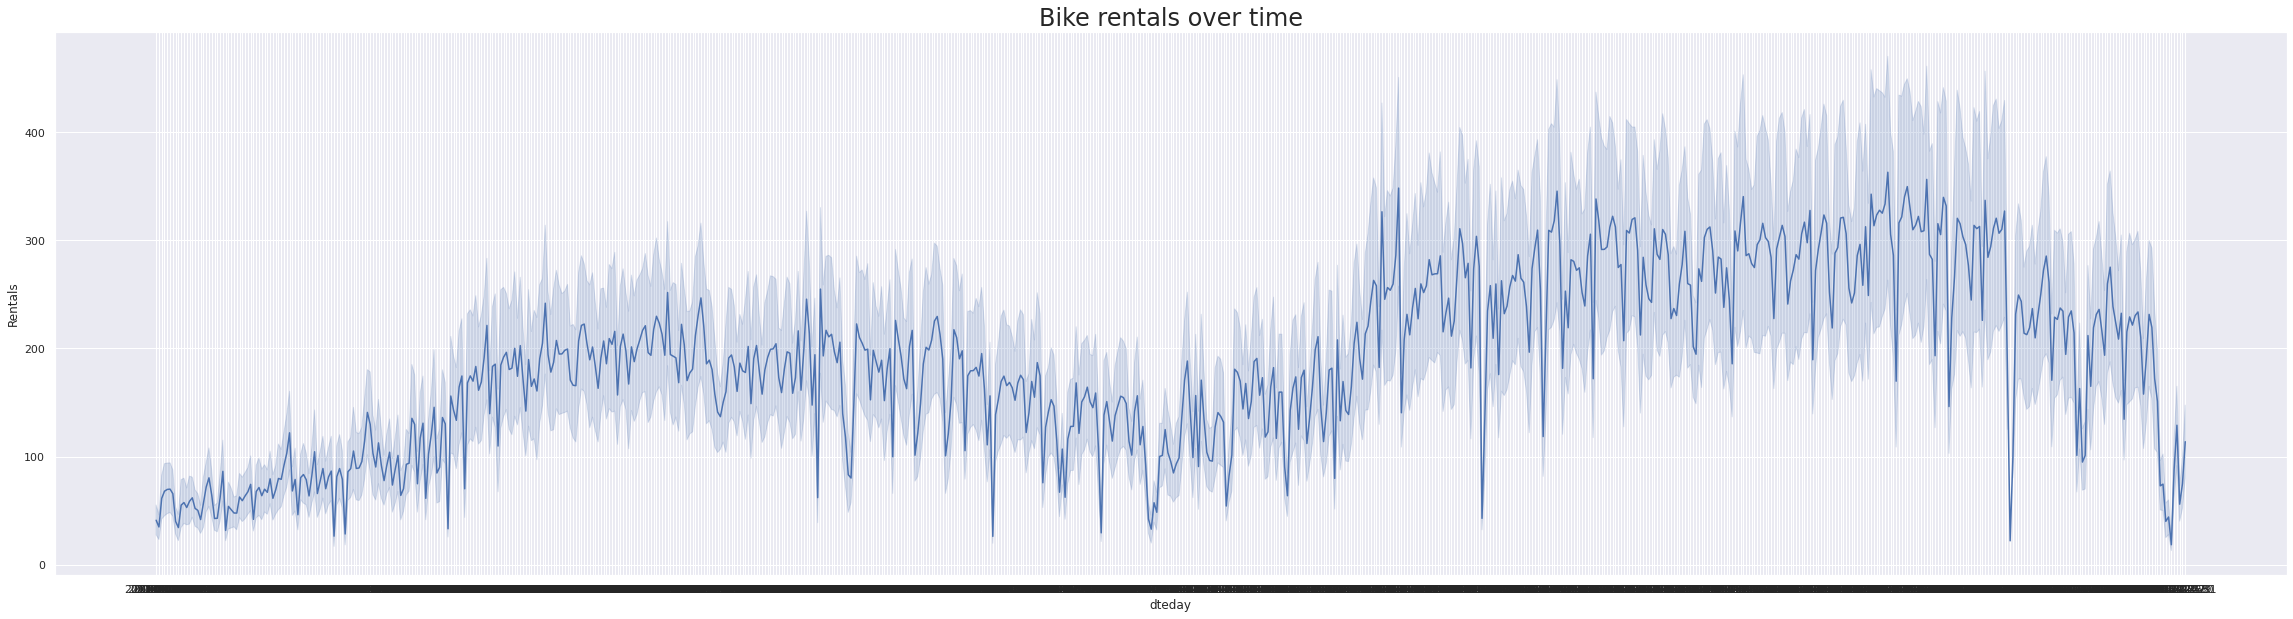

In [ ]:
plt.figure(figsize=(40,10))
sns.lineplot(x='dteday',y='cnt', data=df)
sns.set(font_scale=2)
plt.title('Bike rentals over time')
plt.ylabel('Rentals')

Text(0, 0.5, 'Rentals')

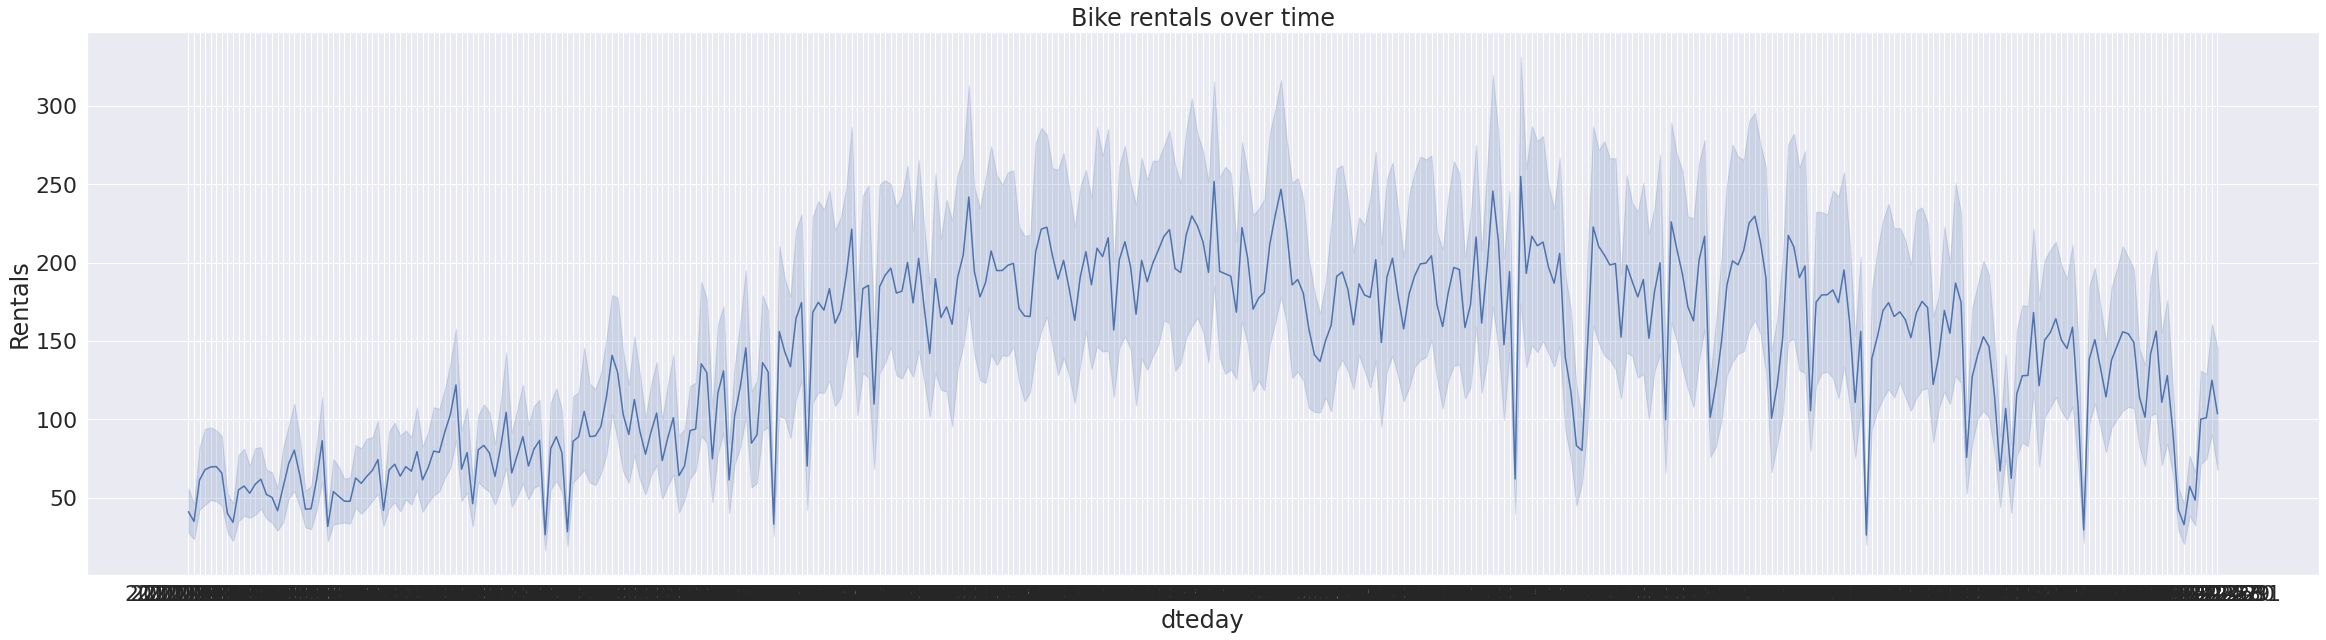

In [ ]:
plt.figure(figsize=(40,10))
sns.lineplot(x='dteday',y='cnt', data=df0)
sns.set(font_scale=2)
plt.title('Bike rentals over time')
plt.ylabel('Rentals')

Text(0, 0.5, 'Rentals')

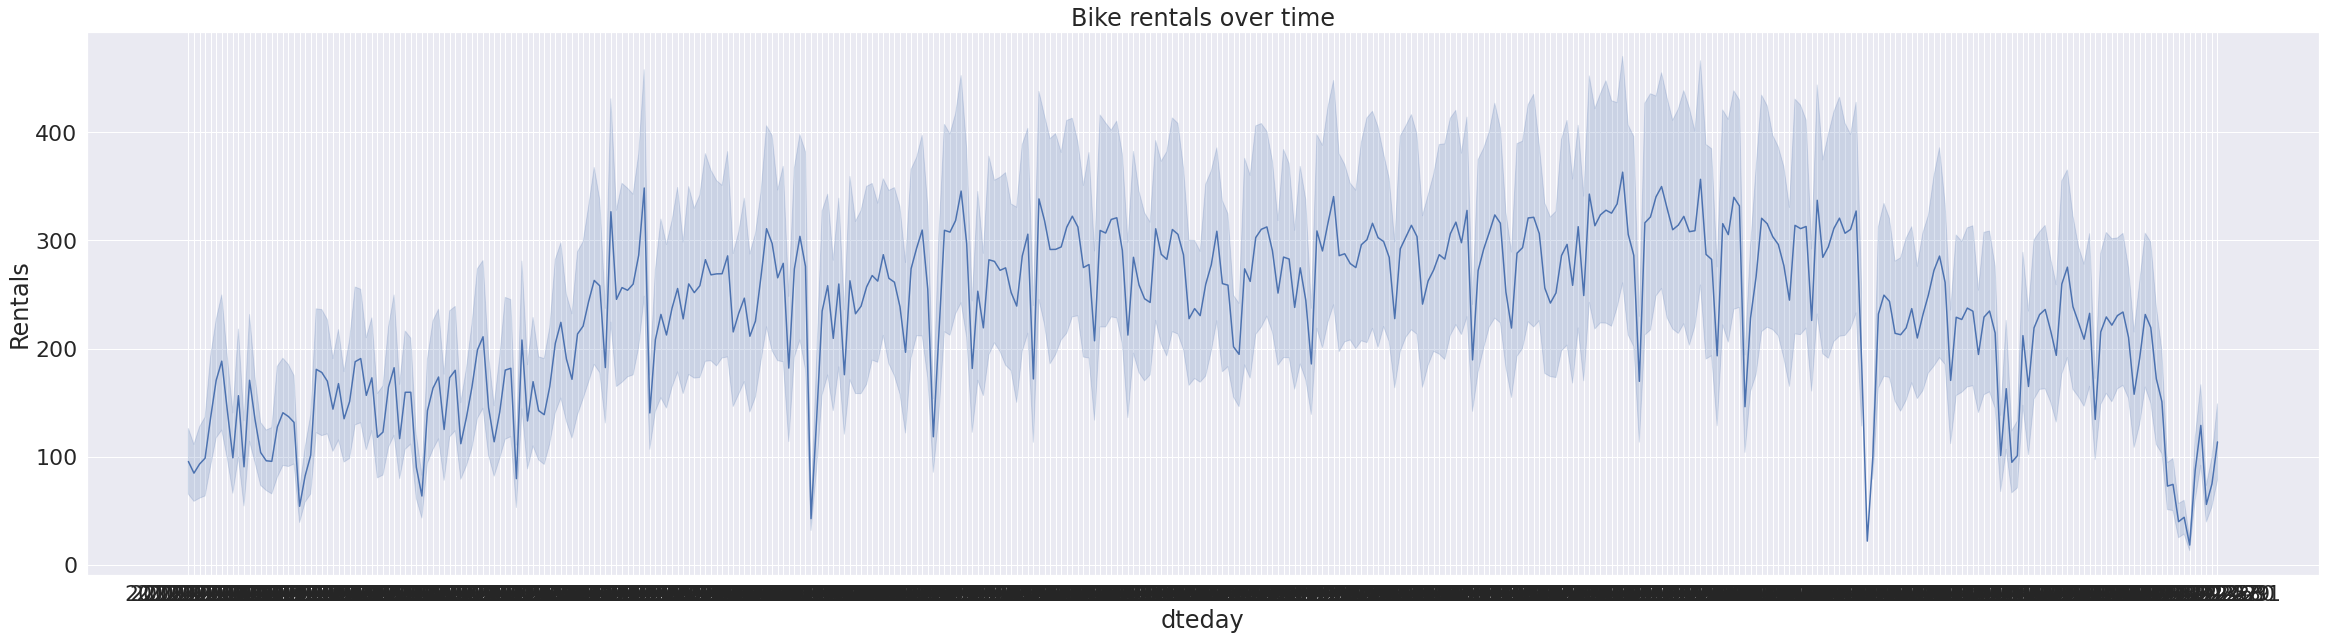

In [ ]:
plt.figure(figsize=(40,10))
sns.lineplot(x='dteday',y='cnt', data=df1)
sns.set(font_scale=2)
plt.title('Bike rentals over time')
plt.ylabel('Rentals')

In [ ]:
df['cnt_bins'] = pd.cut(x=df['cnt'], bins=[0,100,200,300,400,500,600,700,800,900,1000])
df['cnt_bins'] 

0          (0, 100]
1          (0, 100]
2          (0, 100]
3          (0, 100]
4          (0, 100]
            ...    
17374    (100, 200]
17375      (0, 100]
17376      (0, 100]
17377      (0, 100]
17378      (0, 100]
Name: cnt_bins, Length: 17379, dtype: category
Categories (10, interval[int64]): [(0, 100] < (100, 200] < (200, 300] < (300, 400] ... (600, 700] <
                                   (700, 800] < (800, 900] < (900, 1000]]

In [ ]:
df_ = df.copy()

# **OLD**

In [ ]:

df_['holiday'] = df_['holiday'].astype(int)
df_['workingday'] = df_['workingday'].astype(int)
df_['yr'] = df_['yr'].astype(int)

In [ ]:
dummies = pd.get_dummies(df_[['weekday','weathersit','mnth','season', 'hr']], drop_first=False)
df_ = pd.concat([df_, dummies], axis=1)

df_.drop(['instant','dteday','weekday','weathersit','mnth','season','hr'], axis = 1, inplace=True)

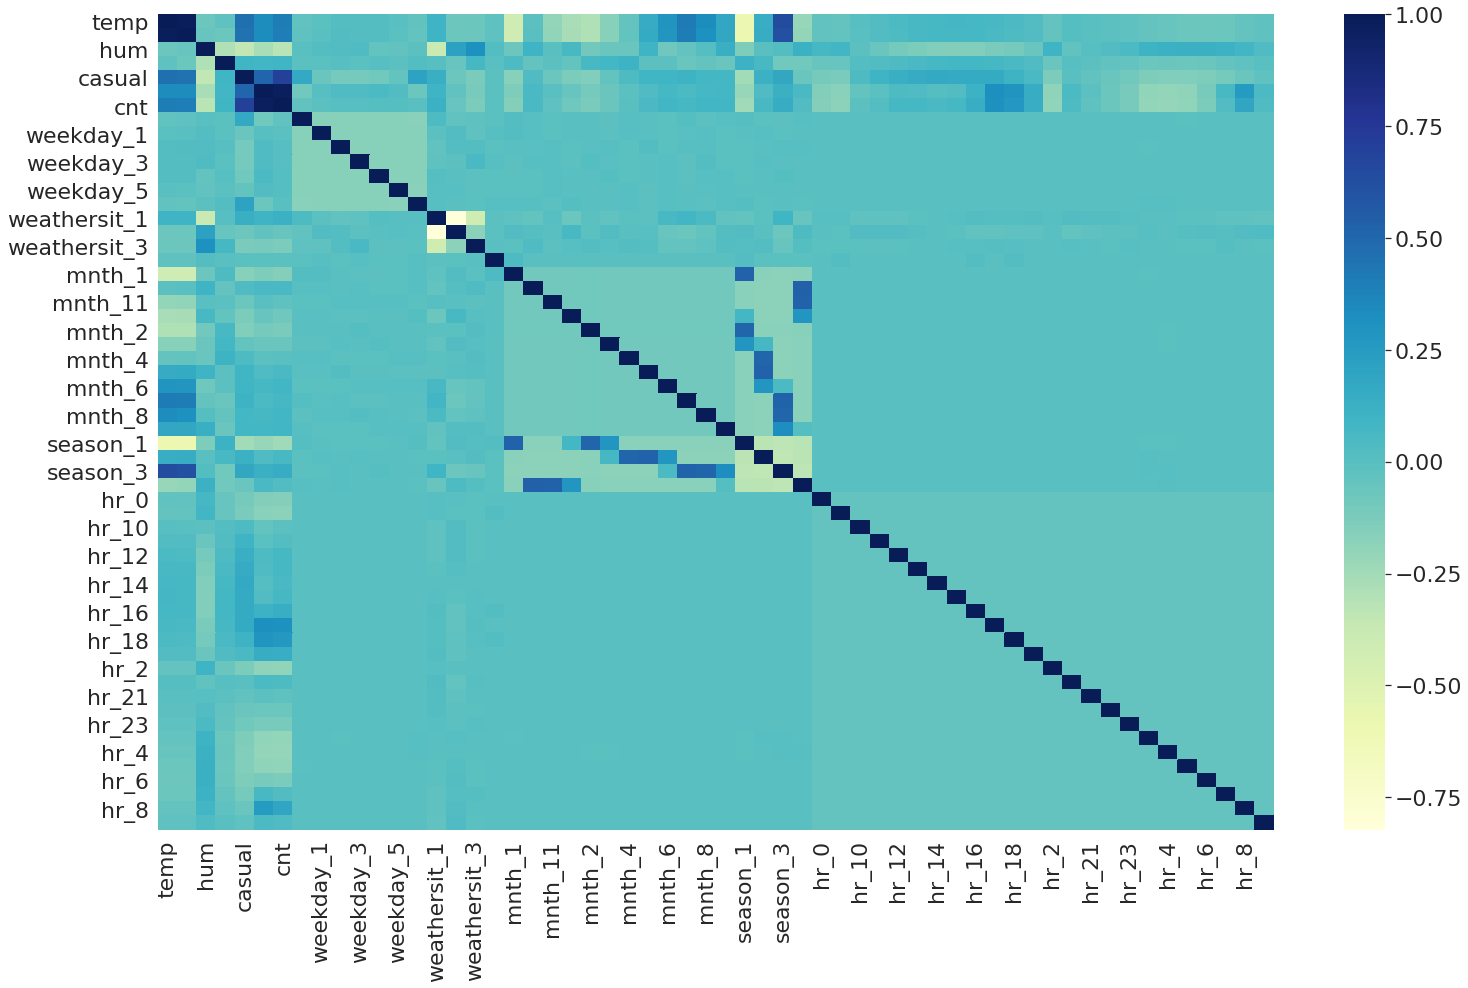

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df_.corr(), annot=False, cmap='YlGnBu')
sns.set(font_scale=2)

In [ ]:
#df_.drop(['dteday'], axis=1,inplace=True)
df_.head()

yr holiday workingday  temp   atemp   hum  ...  hr_4  hr_5  hr_6  hr_7  hr_8  hr_9
0  0       0          0  0.24  0.2879  0.81  ...     0     0     0     0     0     0
1  0       0          0  0.22  0.2727  0.80  ...     0     0     0     0     0     0
2  0       0          0  0.22  0.2727  0.80  ...     0     0     0     0     0     0
3  0       0          0  0.24  0.2879  0.75  ...     0     0     0     0     0     0
4  0       0          0  0.24  0.2879  0.75  ...     1     0     0     0     0     0

[5 rows x 61 columns]

In [ ]:
df_.shape

(17379, 61)

In [ ]:
first_column = df_.pop('cnt')
  
# insert column using insert(position,column_name,first_column) function
df_.insert(0, 'cnt', first_column)
df_.head()

cnt yr holiday workingday  temp   atemp  ...  hr_4  hr_5  hr_6  hr_7  hr_8  hr_9
0   16  0       0          0  0.24  0.2879  ...     0     0     0     0     0     0
1   40  0       0          0  0.22  0.2727  ...     0     0     0     0     0     0
2   32  0       0          0  0.22  0.2727  ...     0     0     0     0     0     0
3   13  0       0          0  0.24  0.2879  ...     0     0     0     0     0     0
4    1  0       0          0  0.24  0.2879  ...     1     0     0     0     0     0

[5 rows x 61 columns]

In [ ]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(df_)
standard_df = pd.DataFrame(standard_df, columns =df_.columns)

In [ ]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(standard_df.iloc[:,1:].values)
pca.explained_variance_ratio_

array([0.07356326, 0.04332564, 0.03897563, 0.03823546, 0.03627639,
       0.03047973, 0.02374052, 0.02209547, 0.02120359, 0.01982898,
       0.01960386, 0.01951954, 0.01941133, 0.01908345, 0.01837801,
       0.01833767, 0.01819398, 0.01815781, 0.01805774, 0.0178859 ,
       0.01770589, 0.01756134, 0.01742291, 0.01740784, 0.01739644,
       0.01739632, 0.01739607, 0.0173955 , 0.01739537, 0.01739531,
       0.01739528, 0.01739488, 0.01739438, 0.01739374, 0.01739327,
       0.01739256, 0.01738853, 0.01738132, 0.01737062, 0.01733756,
       0.01731704, 0.01704586, 0.01642344, 0.01616941, 0.01339826,
       0.01308226, 0.00642868, 0.00466817, 0.00393974, 0.00316666])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9943085776641896

In [ ]:
pca = PCA(n_components=25)
pca_result = pca.fit_transform(standard_df.iloc[:,1:].values)

'''standard_df['pca-one'] = pca_result[:,0]
standard_df['pca-two'] = pca_result[:,1] 
standard_df['pca-three'] = pca_result[:,2]
standard_df['pca-four'] = pca_result[:,3]'''

standard_df['pca1'] = pca_result[:,0]
standard_df['pca2'] = pca_result[:,1] 
standard_df['pca3'] = pca_result[:,2]
standard_df['pca4'] = pca_result[:,3]
standard_df['pca5'] = pca_result[:,4]
standard_df['pca6'] = pca_result[:,5] 
standard_df['pca7']= pca_result[:,6]
standard_df['pca8'] = pca_result[:,7]
standard_df['pca9'] = pca_result[:,8]
standard_df['pca10'] = pca_result[:,9] 
standard_df['pca11'] = pca_result[:,10]
standard_df['pca12'] = pca_result[:,11]
standard_df['pca13'] = pca_result[:,12]
standard_df['pca14'] = pca_result[:,13] 
standard_df['pca15'] = pca_result[:,14]
standard_df['pca16'] = pca_result[:,15]
standard_df['pca17'] = pca_result[:,16]
standard_df['pca18'] = pca_result[:,17] 
standard_df['pca19'] = pca_result[:,18]
standard_df['pca20'] = pca_result[:,19]
standard_df['pca21'] = pca_result[:,20]
standard_df['pca22'] = pca_result[:,21] 
standard_df['pca23'] = pca_result[:,22]
standard_df['pca24'] = pca_result[:,23]
standard_df['pca25'] = pca_result[:,24]

print( 'Explained variance ratio per principal component: {}'.format(pca.explained_variance_ratio_) )

Explained variance ratio per principal component: [0.14009755 0.07894855 0.07038239 0.06787975 0.06331773 0.04292372
 0.04067392 0.03555116 0.03507324 0.03354554 0.03347022 0.03305637
 0.03247425 0.03171529 0.03126978 0.03116746 0.03104324 0.0305829
 0.02984264 0.02638493 0.02315123 0.02264732 0.01075301 0.00645498
 0.00541515]


In [ ]:
'''from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 4).fit_transform(standard_df.iloc[:,1:].values)

standard_df['fa-one'] = FA[:,0]
standard_df['fa-two'] = FA[:,1] 
standard_df['fa-three'] = FA[:,2]
standard_df['fa-four'] = FA[:,3]'''


In [ ]:
standard_pca_df = standard_df[['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22','pca23','pca24','pca25','cnt']]
standard_pca_df.head()

pca1      pca2      pca3  ...     pca24     pca25       cnt
0  3.208378  0.428182  1.862257  ...  0.178776 -0.240029 -1.817953
1  3.424462  0.865442  1.471267  ...  0.332806 -0.334494 -1.912999
2  3.816396  1.808981 -1.793430  ...  0.340178 -0.240760 -1.629925
3  3.545414  1.001224 -1.757235  ...  0.164560 -0.219153 -1.519898
4  3.486311  1.466630 -2.059692  ...  0.387350 -0.228094 -1.500269

[5 rows x 26 columns]

In [ ]:
standard_df.head()

cnt        yr   holiday  ...  season_2  season_3  season_4
0 -1.817953 -1.001369 -0.171981  ... -0.579983 -0.588409 -0.567345
1 -1.912999 -1.001369 -0.171981  ... -0.579983 -0.588409 -0.567345
2 -1.629925 -1.001369 -0.171981  ... -0.579983 -0.588409 -0.567345
3 -1.519898 -1.001369 -0.171981  ... -0.579983 -0.588409 -0.567345
4 -1.500269 -1.001369 -0.171981  ... -0.579983 -0.588409 -0.567345

[5 rows x 36 columns]

In [ ]:
'''X = standard_df.drop('cnt',axis=1)
y = standard_df['cnt']'''

X = standard_pca_df.drop('cnt',axis=1)
y = standard_pca_df['cnt']

In [ ]:
standard_pca_df.shape

(731, 26)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

In [ ]:
print(X_train.shape), print(X_test.shape)

(511, 25)
(220, 25)


(None, None)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [ ]:
K.clear_session()


model = Sequential()
model.add(Dense(200, input_dim=25, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100 , kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(50 , kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               5200      
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 31,601
Trainable params: 31,001
Non-trainable params: 600
__________________________________________________

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [ ]:
#model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stop])
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
16/16 [==============================] - 1s 3ms/step - loss: 0.5188 - mean_squared_error: 0.5188
Epoch 2/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 3/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0498 - mean_squared_error: 0.0498
Epoch 5/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 7/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 8/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 9/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 10/200
16/16 

In [ ]:
y_hat_train = model.predict(X_train)
#print("RMSE:", np.sqrt(mean_squared_error(y_train, y_hat_train)))
print("MAE:",mean_absolute_error(y_train, y_hat_train))
print("MSE:", mean_squared_error(y_train, y_hat_train))

MAE: 0.04416733051150626
MSE: 0.0029658863590501165


In [ ]:
y_hat_test = model.predict(X_test)
#print("RMSE:", np.sqrt(mean_squared_error(y_test, y_hat_test)))
print("RMSE:",mean_absolute_error(y_test, y_hat_test))
print("MSE:", mean_squared_error(y_test, y_hat_test))

RMSE: 0.16767884223337343
MSE: 0.05275314808334289


In [ ]:
print("MAE:",mean_absolute_error(y_train, y_hat_train))
print("MAE:",mean_absolute_error(y_test, y_hat_test))

In [ ]:
model.save('myregre100ep.h5')

In [ ]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(35, input_dim=35, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model


In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
estimator1 = KerasRegressor(build_fn=model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
from sklearn.linear_model import LinearRegression
modelx = LinearRegression()
modelx.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r2 = modelx.score(X_train, y_train)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))

In [ ]:
print("adj_r2:", adj_r2)

adj_r2: 0.9595915643678727


In [ ]:
y_hat_trainx = modelx.predict(X_train)
print("MAE:",mean_absolute_error(y_train, y_hat_trainx))
print("MSE:", mean_squared_error(y_train, y_hat_trainx))

MAE: 0.1455126986126812
MSE: 0.03731252296380029


In [ ]:
y_hat_testx = modelx.predict(X_test)
print("MAE:",mean_absolute_error(y_test, y_hat_testx))
print("MSE:", mean_squared_error(y_test, y_hat_testx))


MAE: 0.15110326072072178
MSE: 0.03879986602320152


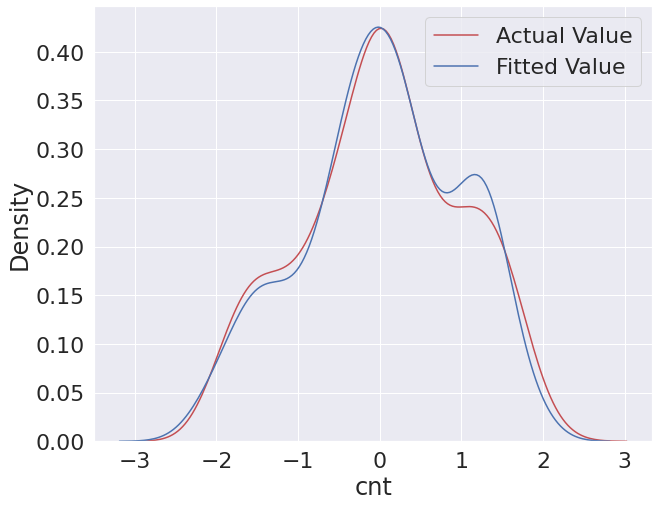

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(y_train,  color='r', label='Actual Value')
sns.kdeplot(y_hat_trainx,   color='b', label='Fitted Value')
#sns.kdeplot(y_hat_train,   color='g', label='deep learning fitted Value')
plt.legend()

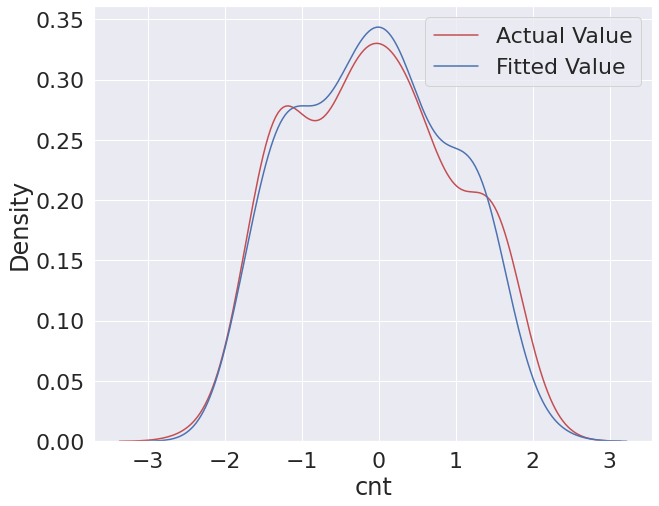

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(y_test,  color='r', label='Actual Value')
sns.kdeplot(y_hat_testx,   color='b', label='Fitted Value')
#sns.kdeplot(y_hat_train,   color='g', label='deep learning fitted Value')
plt.legend()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
  
'''poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
  
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)'''

'poly = PolynomialFeatures(degree = 4)\nX_poly = poly.fit_transform(X_train)\n  \npoly.fit(X_poly, y_train)\nlin2 = LinearRegression()\nlin2.fit(X_poly, y_train)'

In [ ]:
Input=[('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
X_train = X_train.astype(float)
pipe.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
ypipe=pipe.predict(X_train)
print("MAE:",mean_absolute_error(y_train, ypipe))
print("MSE:", mean_squared_error(y_train, ypipe))

MAE: 6.651043531428239e-15
MSE: 7.280667921415394e-29


In [ ]:
ypipe_test=pipe.predict(X_test)
print("MAE:",mean_absolute_error(y_test, ypipe_test))
print("MSE:", mean_squared_error(y_test, ypipe_test))

MAE: 1.6537805097898253e-13
MSE: 1.0552038888826253e-24


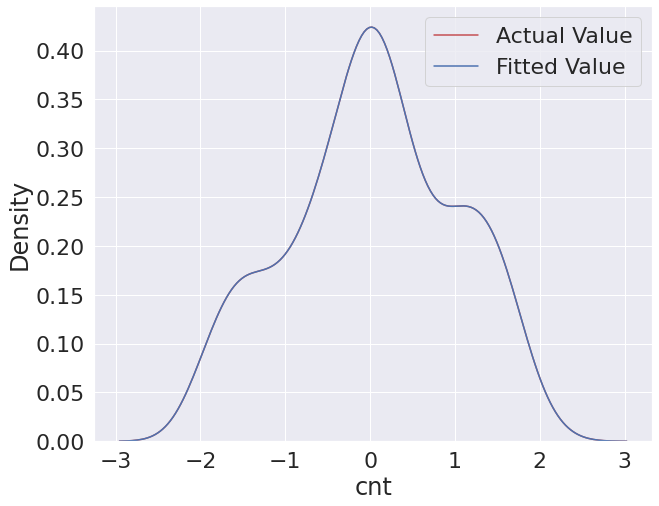

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(y_train,  color='r', label='Actual Value')
sns.kdeplot(ypipe,   color='b', label='Fitted Value')
#sns.kdeplot(y_hat_train,   color='g', label='deep learning fitted Value')
plt.legend()

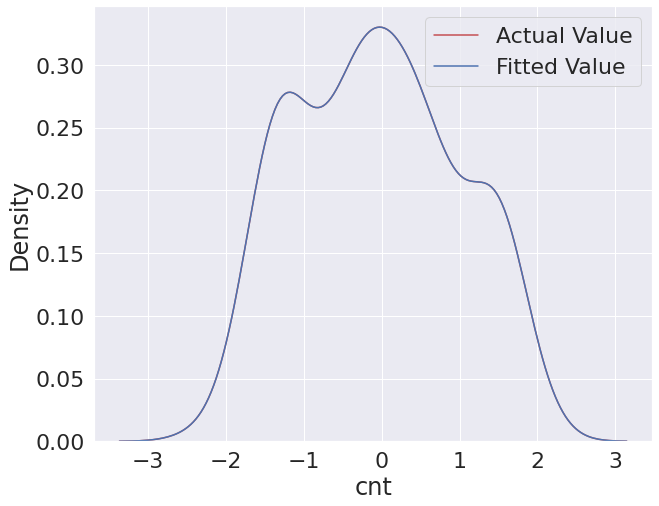

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(y_test,  color='r', label='Actual Value')
sns.kdeplot(ypipe_test,   color='b', label='Fitted Value')
#sns.kdeplot(y_hat_train,   color='g', label='deep learning fitted Value')
plt.legend()

In [ ]:
r2 = pipe.score(X_train, y_train)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))

In [ ]:
adj_r2

1.0

# **New**

In [ ]:
df_.head()

instant      dteday season yr  ... casual registered cnt  cnt_bins
0        1  2011-01-01      1  0  ...      3         13  16  (0, 100]
1        2  2011-01-01      1  0  ...      8         32  40  (0, 100]
2        3  2011-01-01      1  0  ...      5         27  32  (0, 100]
3        4  2011-01-01      1  0  ...      3         10  13  (0, 100]
4        5  2011-01-01      1  0  ...      0          1   1  (0, 100]

[5 rows x 18 columns]

In [ ]:
df_.drop(['instant','dteday'], inplace=True, axis=1)

In [ ]:
cat = ['season','mnth','holiday','workingday','weathersit','weekday','yr','hr', 'cnt_bins']

In [ ]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# Encode labels of multiple columns at once

df_[cat] = df_[cat].apply(LabelEncoder().fit_transform)

df_.head()

instant      dteday  season  yr  ...  casual  registered  cnt  cnt_bins
0        1  2011-01-01       0   0  ...       3          13   16         0
1        2  2011-01-01       0   0  ...       8          32   40         0
2        3  2011-01-01       0   0  ...       5          27   32         0
3        4  2011-01-01       0   0  ...       3          10   13         0
4        5  2011-01-01       0   0  ...       0           1    1         0

[5 rows x 18 columns]

In [ ]:
df_targets=df_[['cnt','cnt_bins']]

In [ ]:
df_.drop(['casual','registered','cnt'], axis=1, inplace=True)

In [ ]:
X = df_.drop('cnt_bins', axis=1)
y = df_['cnt_bins']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

In [ ]:
#numz1 = ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']


# standardized

In [ ]:
'''sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)'''

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
dtree = DecisionTreeRegressor(max_leaf_nodes=250)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=250,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_train_hat = dtree.predict(X_train)

In [ ]:
y_train[0:89]

11229    0
6334     2
11060    0
12346    6
15437    2
        ..
5659     1
11446    0
13710    2
11968    2
2984     0
Name: cnt_bins, Length: 89, dtype: int64

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_train,y_train_hat)

ValueError: ignored

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'max_leaf_nodes': range(60, 220, 40),
    'max_features': range (2, 10, 1),
    'criterion':['gini','entropy']
}

estimator = DecisionTreeClassifier(
)

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    #scoring = 'accuracy',
    n_jobs = 10,
    cv = 10,
    verbose=True
)


In [ ]:
# Fit the grid search model 
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 512 candidates, totalling 5120 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    8.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   11.9s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   17.2s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:   24.6s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:   34.0s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:   45.6s
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:   57.3s
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 5120 out of 5120 | elapsed:  1.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [ ]:
# Estimating the optimized value 
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=9, max_leaf_nodes=60,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
desitree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=9, max_leaf_nodes=60,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
desitree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=9, max_leaf_nodes=60,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_hat_train = desitree.predict(X_train)

In [ ]:
y_hat_train[0:5]

array([0, 2, 0, 6, 2])

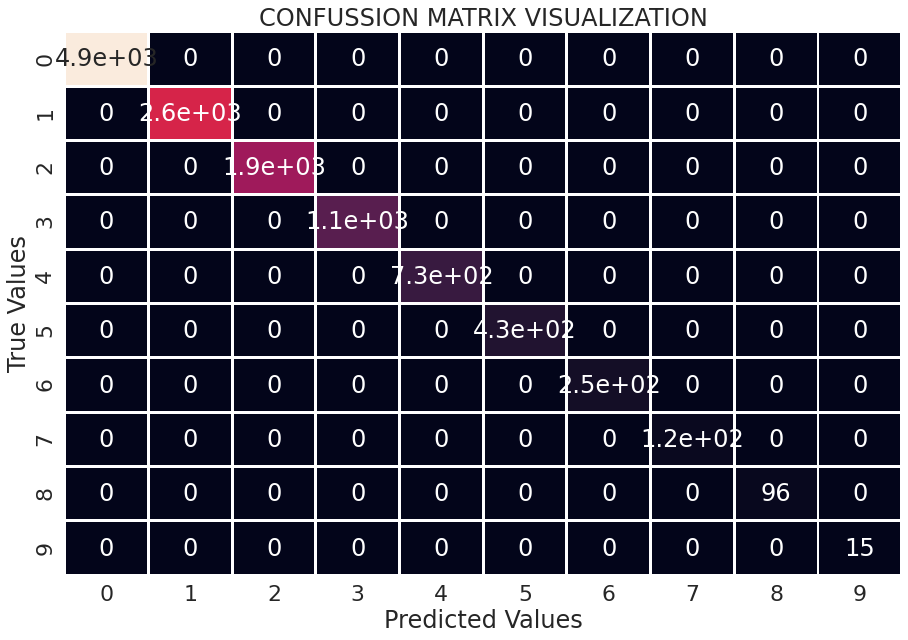

In [ ]:
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,preds,labels=[1,0]))
'''import seaborn as sns
import matplotlib.pyplot as plt'''
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_train,y_hat_train),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_hat_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4883
           1       1.00      1.00      1.00      2600
           2       1.00      1.00      1.00      1930
           3       1.00      1.00      1.00      1111
           4       1.00      1.00      1.00       726
           5       1.00      1.00      1.00       430
           6       1.00      1.00      1.00       252
           7       1.00      1.00      1.00       122
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00        15

    accuracy                           1.00     12165
   macro avg       1.00      1.00      1.00     12165
weighted avg       1.00      1.00      1.00     12165



In [ ]:
y_hat_test = desitree.predict(X_test)

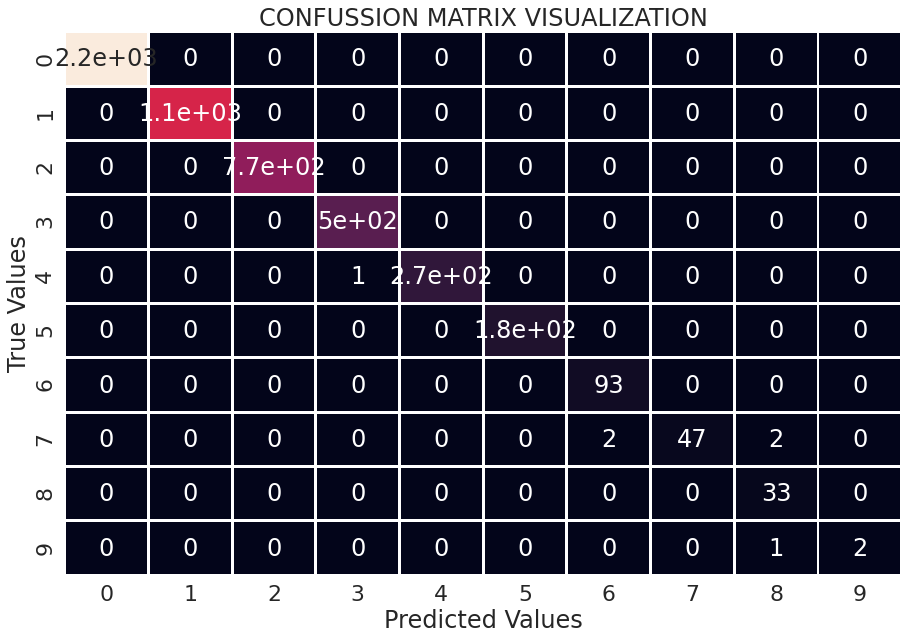

In [ ]:
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,preds,labels=[1,0]))
'''import seaborn as sns
import matplotlib.pyplot as plt'''
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,y_hat_test),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2152
           1       1.00      1.00      1.00      1149
           2       1.00      1.00      1.00       774
           3       1.00      1.00      1.00       500
           4       1.00      1.00      1.00       275
           5       1.00      1.00      1.00       184
           6       0.98      1.00      0.99        93
           7       1.00      0.92      0.96        51
           8       0.92      1.00      0.96        33
           9       1.00      0.67      0.80         3

    accuracy                           1.00      5214
   macro avg       0.99      0.96      0.97      5214
weighted avg       1.00      1.00      1.00      5214



In [ ]:
#Random Forest
rtmodel=RandomForestClassifier()

rtmodel.fit(X_train,y_train)
y_train_predr = rtmodel.predict(X_train)
y_test_predr = rtmodel.predict(X_test)

In [ ]:
y_train.dtype

dtype('int64')

# **Binning**

In [ ]:
df['cnt_bins'] = pd.cut(x=df['cnt'], bins=[0,100,200,300,400,500,600,700,800,900,1000])
df['cnt_bins'] = df['cnt_bins'].astype(str)

In [ ]:
df_ = df.copy()

In [ ]:
dummies = pd.get_dummies(df_[['weekday','weathersit','mnth','season', 'hr']], drop_first=False)
df_ = pd.concat([df_, dummies], axis=1)

df_.drop(['dteday','weekday','weathersit','mnth','season','hr','cnt'], axis = 1, inplace=True)

In [ ]:
lab = ['yr','holiday','workingday','cnt_bins']

from sklearn.preprocessing import LabelEncoder

df_[lab] = df_[lab].apply(LabelEncoder().fit_transform)

In [ ]:
df_.head(2)

yr  holiday  workingday  temp   atemp  ...  hr_5  hr_6  hr_7  hr_8  hr_9
0   0        0           0  0.24  0.2879  ...     0     0     0     0     0
1   0        0           0  0.22  0.2727  ...     0     0     0     0     0

[2 rows x 61 columns]

# **New Deep learning classification**

In [ ]:
X = df_.drop('cnt_bins', axis=1)
y = df_['cnt_bins'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

In [ ]:
classes = np.unique(y_train) 
nClasses = len(classes) 

print('Total number of outputs : ', nClasses) 
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
from keras.utils.np_utils import to_categorical
 
y_train_cat = to_categorical(y_train) 
y_test_cat= to_categorical(y_test) 
 
# Display the change for category label using one-hot encoding 
 
print('Original label:', y_train[0]) 
 
print('After conversion to one-hot:', y_train_cat[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
y_train_cat.dtype

dtype('float32')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import KFold
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(60, input_dim=60, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(Adam(learning_rate=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                3660      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1952      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 5,942
Trainable params: 5,942
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stop])
model.fit(X_train, y_train_cat, epochs=200, batch_size=200,verbose=1)

Epoch 1/200
61/61 [==============================] - 1s 2ms/step - loss: 4.1859 - accuracy: 0.4489
Epoch 2/200
61/61 [==============================] - 0s 2ms/step - loss: 1.0425 - accuracy: 0.6002
Epoch 3/200
61/61 [==============================] - 0s 2ms/step - loss: 1.0177 - accuracy: 0.6125
Epoch 4/200
61/61 [==============================] - 0s 2ms/step - loss: 1.0507 - accuracy: 0.6025
Epoch 5/200
61/61 [==============================] - 0s 2ms/step - loss: 0.9459 - accuracy: 0.6370
Epoch 6/200
61/61 [==============================] - 0s 2ms/step - loss: 0.7968 - accuracy: 0.6888
Epoch 7/200
61/61 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.7430
Epoch 8/200
61/61 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.7642
Epoch 9/200
61/61 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7813
Epoch 10/200
61/61 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7844
Epoch 11/

In [ ]:
y_train_pred = np.argmax(model.predict(X_train), axis=-1)

In [ ]:
y_test_pred = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      4883
           1       0.83      0.81      0.82      2600
           2       0.75      1.00      0.86      1930
           3       0.75      0.87      0.80      1111
           4       0.48      0.55      0.51       726
           5       0.05      0.03      0.04       430
           6       0.00      0.00      0.00       252
           7       0.00      0.00      0.00       122
           8       0.00      0.00      0.00        96
           9       0.00      0.00      0.00        15

    accuracy                           0.81     12165
   macro avg       0.39      0.42      0.40     12165
weighted avg       0.80      0.81      0.80     12165



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2152
           1       0.81      0.81      0.81      1149
           2       0.73      1.00      0.84       774
           3       0.79      0.88      0.83       500
           4       0.47      0.57      0.51       275
           5       0.11      0.07      0.08       184
           6       0.00      0.00      0.00        93
           7       0.00      0.00      0.00        51
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         3

    accuracy                           0.81      5214
   macro avg       0.39      0.42      0.40      5214
weighted avg       0.80      0.81      0.80      5214



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Standard**

In [ ]:
X = df_.drop('cnt_bins', axis=1)
y = df_['cnt_bins'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

In [ ]:
classes = np.unique(y_train) 
nClasses = len(classes) 

print('Total number of outputs : ', nClasses) 
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
from keras.utils.np_utils import to_categorical
 
y_train_cat = to_categorical(y_train) 
y_test_cat= to_categorical(y_test) 
 
# Display the change for category label using one-hot encoding 
 
print('Original label:', y_train[0]) 
 
print('After conversion to one-hot:', y_train_cat[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc= sc.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import KFold
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(64, input_dim=60,kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,kernel_initializer='normal', kernel_regularizer='l2', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,kernel_initializer='normal', kernel_regularizer='l2', activation='relu'))
model.add(Dense(10, activation='softmax'))

'''model.add(Dense(32, input_dim=60, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))'''
#model.add(BatchNormalization())

model.compile(Adam(learning_rate=0.04),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_sc, y_train_cat, epochs=200, batch_size=300,verbose=1, validation_split=0.3)

Epoch 1/200
29/29 [==============================] - 1s 11ms/step - loss: 1.2484 - accuracy: 0.5208 - val_loss: 0.8730 - val_accuracy: 0.6521
Epoch 2/200
29/29 [==============================] - 0s 4ms/step - loss: 0.8220 - accuracy: 0.7024 - val_loss: 0.6580 - val_accuracy: 0.7934
Epoch 3/200
29/29 [==============================] - 0s 4ms/step - loss: 0.7465 - accuracy: 0.7372 - val_loss: 0.6536 - val_accuracy: 0.7890
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 0.6263 - accuracy: 0.7750 - val_loss: 0.5115 - val_accuracy: 0.8170
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.8146 - val_loss: 0.4366 - val_accuracy: 0.8356
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 0.5151 - accuracy: 0.8203 - val_loss: 0.4205 - val_accuracy: 0.8699
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 0.4846 - accuracy: 0.8337 - val_loss: 0.3909 - val_accuracy: 0.8677
Epoch 8/200


In [ ]:
#from keras.models import load_model
model.save('model_200.h5')
#my_model = load_model('my_model.h5')

In [ ]:
y_train_predsc = np.argmax(model.predict(X_train_sc), axis=-1)

In [ ]:
y_test_predsc = np.argmax(model.predict(X_test_sc), axis=-1)

In [ ]:
y_test[0]

4

In [ ]:
print(classification_report(y_train,y_train_predsc))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4883
           1       0.87      0.98      0.92      2600
           2       0.95      0.96      0.96      1930
           3       0.90      0.96      0.93      1111
           4       0.77      0.91      0.84       726
           5       0.59      0.56      0.57       430
           6       0.33      0.35      0.34       252
           7       0.00      0.00      0.00       122
           8       0.00      0.00      0.00        96
           9       0.00      0.00      0.00        15

    accuracy                           0.90     12165
   macro avg       0.54      0.56      0.55     12165
weighted avg       0.89      0.90      0.90     12165



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,y_test_predsc))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2152
           1       0.82      0.96      0.88      1149
           2       0.90      0.91      0.91       774
           3       0.87      0.93      0.90       500
           4       0.75      0.89      0.82       275
           5       0.64      0.59      0.62       184
           6       0.34      0.35      0.35        93
           7       0.00      0.00      0.00        51
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         3

    accuracy                           0.88      5214
   macro avg       0.53      0.55      0.54      5214
weighted avg       0.88      0.88      0.88      5214



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **XGBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgmodel = XGBClassifier(
    objective= 'multi:softprob',
    nthread=4,
    seed=42,
    learning_rate=0.1,
    random_state=42
)

In [ ]:
xgmodel.fit(X_train_sc,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_pred = xgmodel.predict(X_train_sc)

In [ ]:
y_test_pred = xgmodel.predict(X_test_sc)

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4883
           1       1.00      0.99      0.99      2600
           2       0.99      0.99      0.99      1930
           3       0.97      0.98      0.98      1111
           4       0.96      0.97      0.97       726
           5       0.97      0.94      0.96       430
           6       0.98      0.96      0.97       252
           7       0.99      0.96      0.97       122
           8       0.99      1.00      0.99        96
           9       1.00      0.93      0.97        15

    accuracy                           0.99     12165
   macro avg       0.98      0.97      0.98     12165
weighted avg       0.99      0.99      0.99     12165



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2152
           1       0.99      0.98      0.98      1149
           2       0.97      0.98      0.97       774
           3       0.94      0.96      0.95       500
           4       0.92      0.91      0.92       275
           5       0.93      0.91      0.92       184
           6       0.87      0.87      0.87        93
           7       0.89      0.82      0.86        51
           8       0.91      0.88      0.89        33
           9       0.67      0.67      0.67         3

    accuracy                           0.97      5214
   macro avg       0.91      0.90      0.90      5214
weighted avg       0.97      0.97      0.97      5214



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#import the model, the indepent value X, the target variable y, and the number of cross validations, CV and assign to a variable.
scores = cross_val_score(xgmodel,X_train_sc, y_train, cv=10)

In [ ]:
#the variable holds an array of accuracy scores of all  folds
scores
scores.std()
scores.mean()

0.972134617047961

In [ ]:
scores

array([0.96548891, 0.96877568, 0.97288414, 0.96877568, 0.96713229,
       0.97861842, 0.97203947, 0.97697368, 0.97944079, 0.97121711])

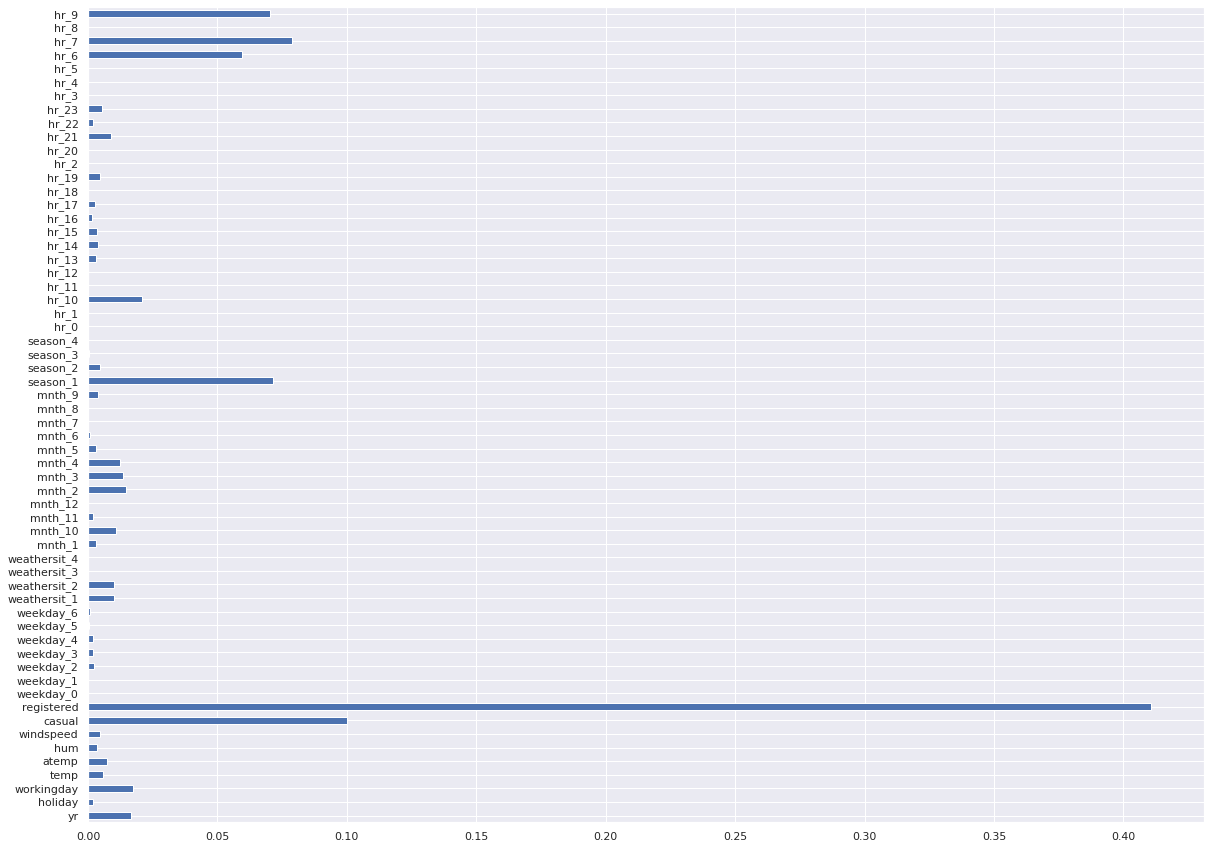

In [ ]:
importances=pd.Series(xgmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(20,15))

ii:
The model will have to be updated frequently to ensure the mode works appropriately because in production, the model gets exposed to different distribution of data

# **XGBoostX**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgmodel = XGBClassifier(
    objective= 'multi:softprob',
    nthread=4,
    seed=42,
    learning_rate=0.1,
    random_state=42
)

In [ ]:
xgmodel.fit(X_train_sc,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_pred = xgmodel.predict(X_train_sc)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#import the model, the indepent value X, the target variable y, and the number of cross validations, CV and assign to a variable.
scores = cross_val_score(xgmodel,X_train_sc, y_train, cv=10)

In [ ]:
#the variable holds an array of accuracy scores of all  folds
scores
scores.std()
scores.mean()

0.972134617047961

In [ ]:
scores

array([0.96548891, 0.96877568, 0.97288414, 0.96877568, 0.96713229,
       0.97861842, 0.97203947, 0.97697368, 0.97944079, 0.97121711])

In [ ]:
y_test_pred = xgmodel.predict(X_test_sc)

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4883
           1       1.00      0.99      0.99      2600
           2       0.99      0.99      0.99      1930
           3       0.97      0.98      0.98      1111
           4       0.96      0.97      0.97       726
           5       0.97      0.94      0.96       430
           6       0.98      0.96      0.97       252
           7       0.99      0.96      0.97       122
           8       0.99      1.00      0.99        96
           9       1.00      0.93      0.97        15

    accuracy                           0.99     12165
   macro avg       0.98      0.97      0.98     12165
weighted avg       0.99      0.99      0.99     12165



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2152
           1       0.99      0.98      0.98      1149
           2       0.97      0.98      0.97       774
           3       0.94      0.96      0.95       500
           4       0.92      0.91      0.92       275
           5       0.93      0.91      0.92       184
           6       0.87      0.87      0.87        93
           7       0.89      0.82      0.86        51
           8       0.91      0.88      0.89        33
           9       0.67      0.67      0.67         3

    accuracy                           0.97      5214
   macro avg       0.91      0.90      0.90      5214
weighted avg       0.97      0.97      0.97      5214



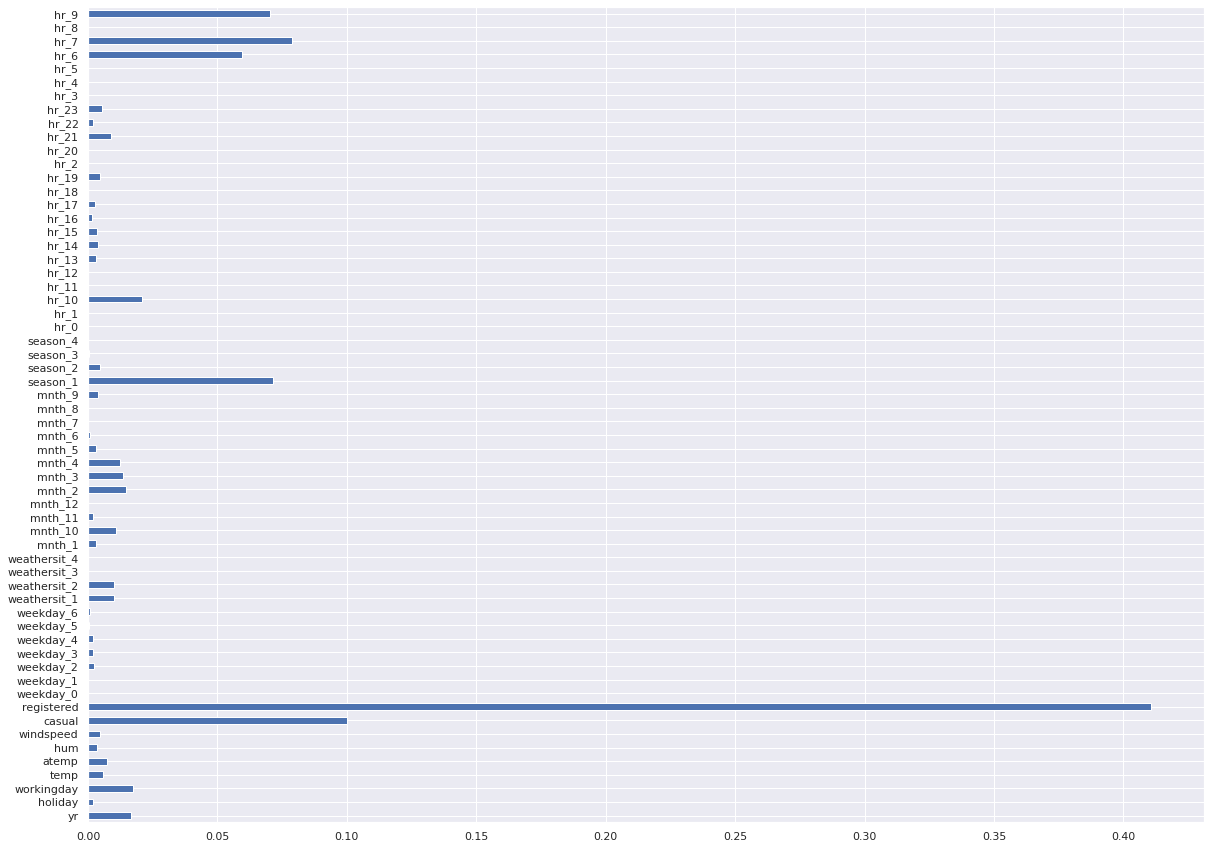

In [ ]:
importances=pd.Series(xgmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(20,15))

ii:
The model will have to be updated frequently to ensure the mode works appropriately because in production, the model gets exposed to different distribution of data

# XGB2

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time

In [ ]:
#X_trainx, X_valid, y_trainx, y_valid = train_test_split(X_train, y_train, test_size= 0.30, random_state=42)

In [ ]:
'''sc = StandardScaler()
X_trainx_sc = sc.fit_transform(X_trainx)
X_valid_sc= sc.transform(X_valid)'''

In [ ]:
estimator = XGBClassifier(
    objective= 'multi:softprob',
    nthread=4,
    seed=42
    #learning_rate=0.1,
    #random_state=42
)

In [ ]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# define search space
param_grid = {
        #'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        #'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': range(60, 220, 40),
        'tree_method':['auto','exact','approx','hist','gpu_hist']
        }


In [ ]:
#search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

rs_xgb = RandomizedSearchCV(estimator, param_grid,
                            n_jobs=1, verbose=2, cv=cv,
                            #early_stopping_rounds= 10,
                            scoring='f1_micro', 
                            refit=True,
                            random_state=42)

In [ ]:
print("Randomized search..")
search_time_start = time.time()
#rs_xgb.fit(X_train_sc, y_train, fit_params=fit_params)
rs_xgb.fit(X_train_sc, y_train)
print("Randomized search time:", time.time() - search_time_start)

Randomized search..
Fitting 30 folds for each of 10 candidates, totalling 300 fits
[CV] tree_method=auto, subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=60, min_child_weight=7.0, max_depth=10, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  tree_method=auto, subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=60, min_child_weight=7.0, max_depth=10, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9, total=  13.6s
[CV] tree_method=auto, subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=60, min_child_weight=7.0, max_depth=10, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s remaining:    0.0s


[CV]  tree_method=auto, subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=60, min_child_weight=7.0, max_depth=10, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9, total=  13.6s
[CV] tree_method=auto, subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=60, min_child_weight=7.0, max_depth=10, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9 
[CV]  tree_method=auto, subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=60, min_child_weight=7.0, max_depth=10, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9, total=  13.5s
[CV] tree_method=auto, subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=60, min_child_weight=7.0, max_depth=10, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9 
[CV]  tree_method=auto, subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=60, min_child_weight=7.0, max_depth=10, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9, total=  13.6s
[CV] tree_method=auto, subsample=0.7, silent=False, reg_lambda=5.0, n_estimators=60, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [08:22:11] /workspace/src/tree/updater_gpu_hist.cu:1407: Exception in gpu_hist: NCCL failure :unhandled cuda error /workspace/src/tree/../common/device_helpers.cuh(896)

Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f52ccad3cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::tree::GPUHistMakerSpecialised<xgboost::detail::GradientPairInternal<double> >::Update(xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*, xgboost::DMatrix*, std::vector<xgboost::RegTree*, std::allocator<xgboost::RegTree*> > const&)+0x1270) [0x7f52ccd0f7f0]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/lib

[CV]  tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=180, min_child_weight=10.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9, total=   0.0s
[CV] tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=180, min_child_weight=10.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9 
[CV]  tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=180, min_child_weight=10.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9, total=   0.0s
[CV] tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=180, min_child_weight=10.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9 
[CV]  tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=180, min_child_weight=10.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.9, total=   0.0s
[CV] tree_method=gpu_hist, subsample=0.9, silent=F

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [09:00:35] /workspace/src/tree/updater_gpu_hist.cu:1407: Exception in gpu_hist: NCCL failure :unhandled cuda error /workspace/src/tree/../common/device_helpers.cuh(896)

Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f52ccad3cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::tree::GPUHistMakerSpecialised<xgboost::detail::GradientPairInternal<double> >::Update(xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*, xgboost::DMatrix*, std::vector<xgboost::RegTree*, std::allocator<xgboost::RegTree*> > const&)+0x1270) [0x7f52ccd0f7f0]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/lib

[CV]  tree_method=gpu_hist, subsample=1.0, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.2, gamma=0.25, colsample_bytree=0.9, total=   0.0s
[CV] tree_method=gpu_hist, subsample=1.0, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.2, gamma=0.25, colsample_bytree=0.9 
[CV]  tree_method=gpu_hist, subsample=1.0, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.2, gamma=0.25, colsample_bytree=0.9, total=   0.0s
[CV] tree_method=gpu_hist, subsample=1.0, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.2, gamma=0.25, colsample_bytree=0.9 
[CV]  tree_method=gpu_hist, subsample=1.0, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.2, gamma=0.25, colsample_bytree=0.9, total=   0.0s
[CV] tree_method=gpu_hist, subsample=1.0, silent=False,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [09:19:31] /workspace/src/tree/updater_gpu_hist.cu:1407: Exception in gpu_hist: NCCL failure :unhandled cuda error /workspace/src/tree/../common/device_helpers.cuh(896)

Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f52ccad3cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::tree::GPUHistMakerSpecialised<xgboost::detail::GradientPairInternal<double> >::Update(xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*, xgboost::DMatrix*, std::vector<xgboost::RegTree*, std::allocator<xgboost::RegTree*> > const&)+0x1270) [0x7f52ccd0f7f0]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/lib

[CV]  tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, total=   0.0s
[CV] tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8 
[CV]  tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, total=   0.0s
[CV] tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8 
[CV]  tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, total=   0.0s
[CV] tree_method=gpu_hist, subsample=0.9, silent=False, reg_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [09:19:32] /workspace/src/tree/updater_gpu_hist.cu:1407: Exception in gpu_hist: NCCL failure :unhandled cuda error /workspace/src/tree/../common/device_helpers.cuh(896)

Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f52ccad3cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::tree::GPUHistMakerSpecialised<xgboost::detail::GradientPairInternal<double> >::Update(xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*, xgboost::DMatrix*, std::vector<xgboost::RegTree*, std::allocator<xgboost::RegTree*> > const&)+0x1270) [0x7f52ccd0f7f0]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/lib

[CV]  tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, total=   0.0s
[CV] tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8 
[CV]  tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, total=   0.0s
[CV] tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8 
[CV]  tree_method=gpu_hist, subsample=0.9, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, total=   0.0s
[CV] tree_method=gpu_hist, subsample=0.9, silent=False, reg_

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 113.6min finished


Randomized search time: 6830.61785197258


In [ ]:
best_score = rs_xgb.best_score_
best_params = rs_xgb.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.9751470847929189
Best params: 
colsample_bytree: 0.9
gamma: 0.25
learning_rate: 0.1
max_depth: 10
min_child_weight: 7.0
n_estimators: 60
reg_lambda: 5.0
silent: False
subsample: 0.7
tree_method: 'auto'


In [ ]:
rs_xgb.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 7.0,
 'n_estimators': 60,
 'reg_lambda': 5.0,
 'silent': False,
 'subsample': 0.7,
 'tree_method': 'auto'}

In [ ]:
xgmodel = XGBClassifier(
    objective= 'multi:softprob',
    nthread=4,
    seed=42,
    random_state=42,
    #colsample_bylevel= 0.4,
    colsample_bytree= 0.9,
    gamma= 1.0,
    learning_rate= 0.1,
    max_depth= 10,
    min_child_weight= 7.0,
    n_estimators= 60,
    reg_lambda= 50.0,
    silent= False,
    subsample= 0.7,
    tree_method= 'auto'
)

In [ ]:
.fit(X_train_sc,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bynode=1, colsample_bytree=0.9, gamma=1.0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=5.0, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=50.0, scale_pos_weight=1, seed=42,
              silent=False, subsample=0.7, verbosity=1)

In [ ]:
y_train_pred = xgmodel1.predict(X_train_sc)

In [ ]:
y_test_pred = rs_xgb.predict(X_test_sc)

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4883
           1       0.99      0.99      0.99      2600
           2       0.98      0.99      0.99      1930
           3       0.97      0.97      0.97      1111
           4       0.95      0.96      0.95       726
           5       0.93      0.92      0.92       430
           6       0.87      0.89      0.88       252
           7       0.94      0.75      0.84       122
           8       0.82      0.96      0.88        96
           9       0.00      0.00      0.00        15

    accuracy                           0.98     12165
   macro avg       0.84      0.84      0.84     12165
weighted avg       0.98      0.98      0.98     12165



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2152
           1       0.99      0.98      0.99      1149
           2       0.97      0.98      0.98       774
           3       0.96      0.97      0.96       500
           4       0.95      0.95      0.95       275
           5       0.95      0.95      0.95       184
           6       0.87      0.87      0.87        93
           7       0.86      0.73      0.79        51
           8       0.76      0.85      0.80        33
           9       0.00      0.00      0.00         3

    accuracy                           0.98      5214
   macro avg       0.83      0.83      0.83      5214
weighted avg       0.98      0.98      0.98      5214



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print("F1 score on the test dataset:",f1_score(y_test,y_test_pred, average='micro'))

F1 score on the test dataset: 0.977560414269275


For such case, a model with high recall is appreciated, since it is better to predict more than the required number of bikes other than predicting less than necessary number. However this model has equally great precision and recall of 0.98. 
Above that, the F1 score (harmonic mean of precision and recall) is the chosen evaluation metric. The high F1 score of this model on the test dataset, 0.98 is equivalent to the 0.975 recorded on the training dataset

# **Part 2**

Developement of resilient I/O pipeline to retrieve and deliver data from the frontend(or a webservice) for storage(if the need be) and analysis.
The pipe. The pipeline will read the data from source. Transformation: This data will then go through some transformations, label and one hot encoding, sorting, missing files and duplicate checks, standardizing, amongst others in quest to make analysis possible.With an hourly data prediction model, it will be convient to implement the batch processing data ingestion method where data is collected periodically and distributed likewise. 
It will be advisable to leverage on horizontal scaling with servers rich in resources, thus (good number of GPUs, a large RAM and storage)to improve time, cost, and performance. Subsets of the training data will be distributed to the various machines in the cluster. With in an iteration, each machine performs an optimization problem on the subset of data on hand, returning the result of the optimization to the central node. There, that information is combined to derived the best overall solution. After a small number of iterations of this procedure, the final model is guaranteed to be close to the overall optimal model (if a single model were fit to all the data at once thus vertical clusting). With predictions, the number of predictions per time can be controlled.  A queue of prediction jobs from the servers receive prediction requests, load the models if necessary and then return the results to the frontend through the output node.

What are the scaling properties of your model, if you assume that the amount of data you need to handle go up to several terabytes? Do you see any problems?

*  Distribution problems
*  Memory problems
*  Storage problems



*  With distribution problem: only the new data available for scoring should be loaded each time. 
It safe to assume that distribution of the total accumulated data does not vary greatly with the addition of new data so standardization can be limited to the times when the model itself is updated and retrained.

*  With storage & memory issue: Amazon webservices(AWS), Apache Spark and Kubernites can be of great help as they take provide infrustructure as a service. However, general housekeeping practices should be obeyed in order to be proactive. Large RAM and storage should be acquired

Where I consider the posibility of limit is the issue with storage and memory, where frequent influx of data can put pressure on finances

Even though I have some knowledge with AWS, I have not extensively used them as most of my works have been in researching from already collected data.

You're just to write a code that takes a string input. The input would be the key of the dictionary. You then use the key to return the value of the dictionary.

In [ ]:
mydict = {'kofi':1,
          'kwame':2,
          'kwaku':3}
mydict['kwame']

2

In [ ]:
listo = []
maxItem = 6
while len(listo) < maxItem:
  keyinput = input("Enter your key:")
  listo.append(keyinput)
print(listo)

Enter your key:d
Enter your key:d
Enter your key:d
Enter your key:d
Enter your key:d
Enter your key:d
['d', 'd', 'd', 'd', 'd', 'd']


In [ ]:
listo = []
maxItem = 6
while len(listo) < maxItem:
  keyinput = input("Enter your key:")
  listo.append(keyinput)
print(listo)

Enter your key:kofi


In [ ]:
mydicts={}
maxItem = 6

while len(mydicts) < maxItem:
  keyinput = input("Enter your key:")
  mydicts[keyinput]=len(mydicts)+1
print(mydicts)

Enter your key:hu
Enter your key:gg
Enter your key:kl
Enter your key:uy
Enter your key:cc
Enter your key:mk
{'hu': 1, 'gg': 2, 'kl': 3, 'uy': 4, 'cc': 5, 'mk': 6}


In [ ]:
def returner(key):
  if key in mydicts:
      print(mydicts[key])
  else:
    print('entered key cannot be found')

In [ ]:
returner('cc')

5


In [ ]:
mydicts={}
mydicts['k']=4
mydicts['j']= len(mydicts)+1
mydicts


{'j': 2, 'k': 4}

In [ ]:


count = 0
count += 1
print(count)

1


In [ ]:
def incrementor():
    info = {"count": 999}
    def number():
        info["count"] += 1
        return info["count"]
    return number

number = incrementor()

In [ ]:
listb = [1,3,6,7]
listc = []
for i,j in zip(listb[:-1],listb[1:]):
  diff= j-i
  listc.append(diff)

SyntaxError: ignored

In [ ]:
listc

[2, 3, 1]